In [1]:
# 데이터 프레임
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 회귀 예측 모델
from statsmodels.api import Logit

# 사이킷런
## 데이터 정제
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

## 분류 모델
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
### 분류-TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## 그리드 서치
from sklearn.model_selection import GridSearchCV

## 평가
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 
from subprocess import call

# 경고메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 폰트 설정
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus=False)

# import & read_csv

In [57]:
df_weather = pd.read_csv("../cvs_data/data_result/weather_v3.csv")
df_weather.isna().sum()
df_weather = df_weather[(df_weather['dateObs_y']==2021 )| (df_weather['dateObs_y']==2022)]

# 날씨 데이터: 평균 온도 및 평균 습도, 강수량

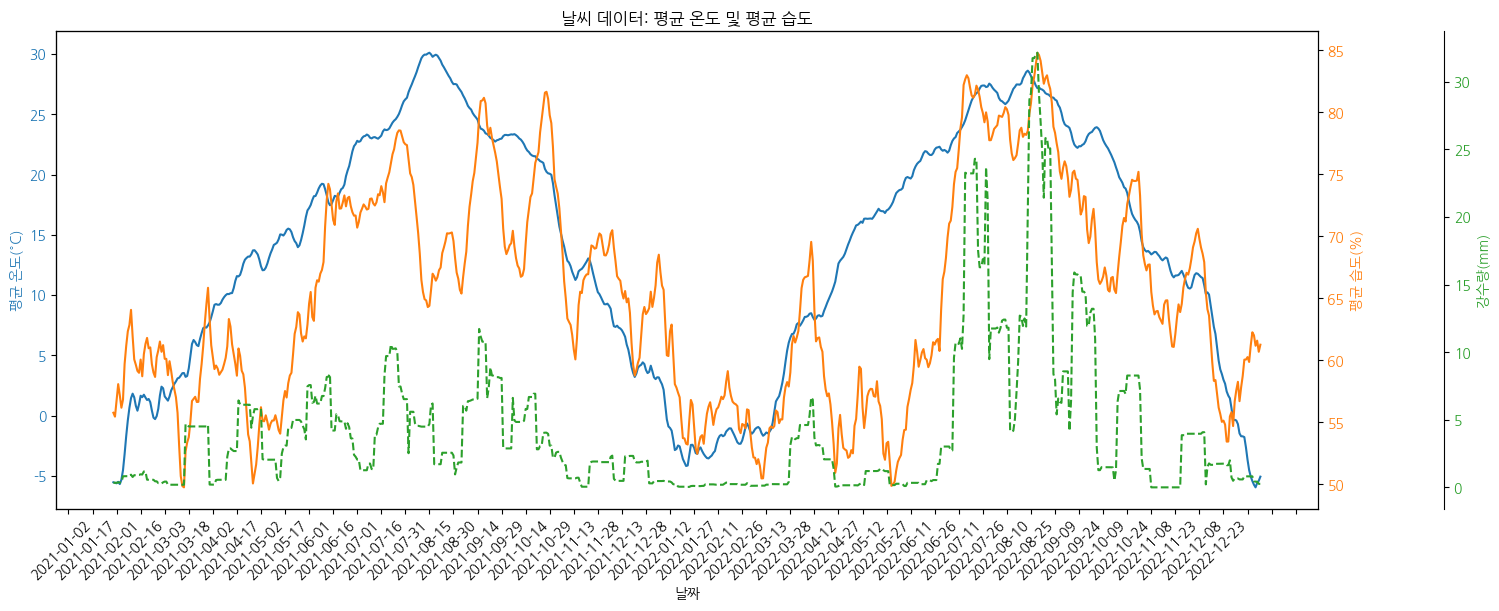

In [53]:
import matplotlib.dates as mdates

weather_data = pd.DataFrame(df_weather)

fig, ax1 = plt.subplots(figsize=(15, 6))

temp_date = df_weather['TempAvg']
rainfall_date = df_weather['HumidAvg']
humid_date = df_weather['RainfallAmount']

# 이동평균 계산
window = 15
rolling_average_temp = temp_date.rolling(window=window).mean()
rolling_average_rainfall = rainfall_date.rolling(window=window).mean()
rolling_average_humid = humid_date.rolling(window=window).mean()


# 온도 데이터 (왼쪽 Y 축)
ax1.plot(weather_data['dateObs'],
         # weather_data['TempAvg'],
         rolling_average_temp.values, color='tab:blue', label='평균 온도')
ax1.set_xlabel('날짜')
ax1.set_ylabel('평균 온도(°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 습도 데이터 (오른쪽 Y 축)
ax2 = ax1.twinx()
ax2.plot(weather_data['dateObs'],
         # weather_data['HumidAvg'],
         rolling_average_rainfall.values, color='tab:orange', label='평균 습도')
ax2.set_ylabel('평균 습도(%)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 강수량 데이터 (오른쪽 Y 축)
ax3 = ax1.twinx()
ax3.plot(weather_data['dateObs'],
         # weather_data['RainfallAmount'],
         rolling_average_humid.values, color='tab:green', label='강수량', linestyle='dashed')
ax3.set_ylabel('강수량(mm)', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가


# X축 날짜 표시 간격 조정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 간격을 조절해주세요
fig.autofmt_xdate(rotation=45)

# 값 표시
# for i, (temp, humid) in enumerate(zip(weather_data['TempAvg'], weather_data['HumidAvg'])):
#     ax1.text(weather_data['dateObs'][i], temp, f'{temp:.1f}°C', ha='center', va='bottom', color='tab:blue')
#     ax2.text(weather_data['dateObs'][i], humid, f'{humid:.1f}%', ha='center', va='bottom', color='tab:orange')

fig.tight_layout()
plt.title('날씨 데이터: 평균 온도 및 평균 습도, 강수량')
plt.show()

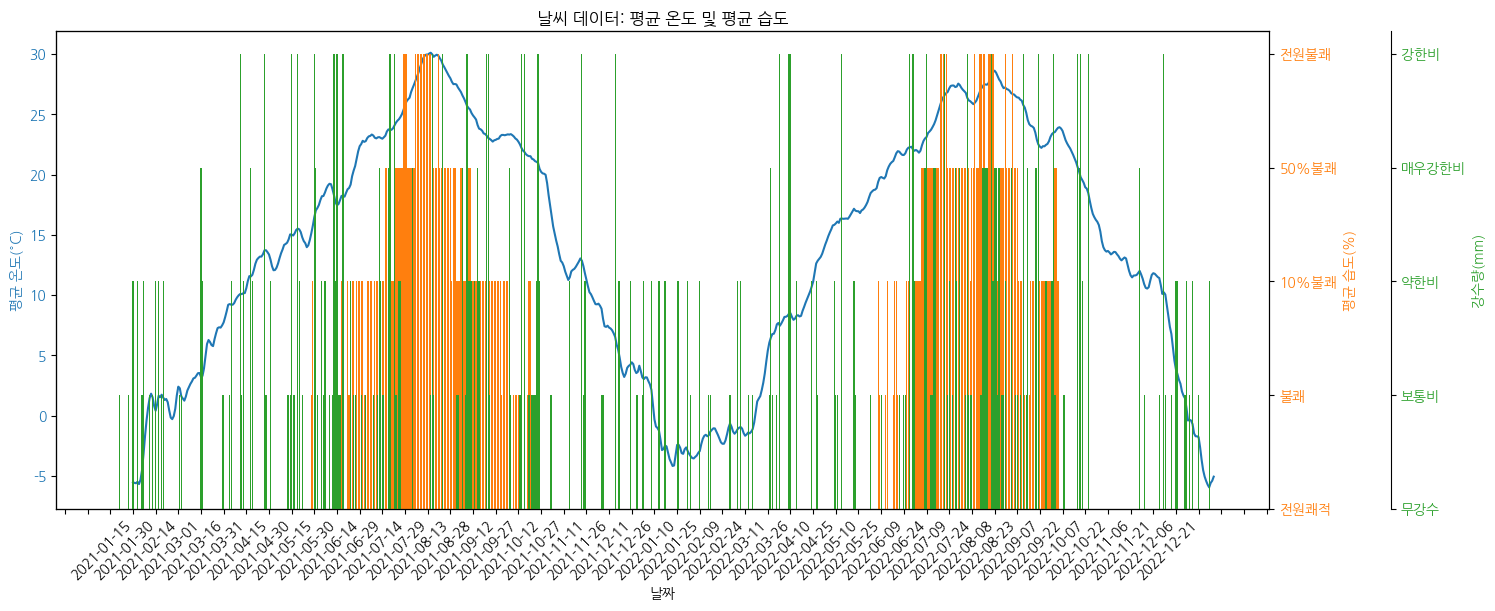

In [54]:
import matplotlib.dates as mdates

weather_data = pd.DataFrame(df_weather)

fig, ax1 = plt.subplots(figsize=(15, 6))

temp_date = df_weather['TempAvg']
# rainfall_date = df_weather['discomfortIndex']
# humid_date = df_weather['classRainfall']

# 이동평균 계산
window = 15
rolling_average_temp = temp_date.rolling(window=window).mean()
# rolling_average_rainfall = rainfall_date.rolling(window=window).apply(lambda x: x.mode()[0])
# rolling_average_humid = humid_date.rolling(window=window).apply(lambda x: x.mode()[0])

# # 범주형 변수의 중심값 사용
# rolling_center_discomfort = rainfall_date.rolling(window=window, center=True).apply(lambda x: x.value_counts().idxmax())
# rolling_center_rainfall = humid_date.rolling(window=window, center=True).apply(lambda x: x.value_counts().idxmax())


# 온도 데이터 (왼쪽 Y 축)
ax1.plot(weather_data['dateObs'],
         # weather_data['TempAvg'],
         rolling_average_temp.values, color='tab:blue', label='평균 온도')
ax1.set_xlabel('날짜')
ax1.set_ylabel('평균 온도(°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 습도 데이터 (오른쪽 Y 축)
ax2 = ax1.twinx()
ax2.bar(weather_data['dateObs'],df_weather['discomfortIndex'], color='tab:orange', label='평균 습도')
ax2.set_ylabel('평균 습도(%)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 강수량 데이터 (오른쪽 Y 축)
ax3 = ax1.twinx()
ax3.bar(weather_data['dateObs'],df_weather['classRainfall'], color='tab:green', label='강수량', linestyle='dashed')
ax3.set_ylabel('강수량(mm)', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가


# X축 날짜 표시 간격 조정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 간격을 조절해주세요
fig.autofmt_xdate(rotation=45)

# 값 표시
# for i, (temp, humid) in enumerate(zip(weather_data['TempAvg'], weather_data['HumidAvg'])):
#     ax1.text(weather_data['dateObs'][i], temp, f'{temp:.1f}°C', ha='center', va='bottom', color='tab:blue')
#     ax2.text(weather_data['dateObs'][i], humid, f'{humid:.1f}%', ha='center', va='bottom', color='tab:orange')

fig.tight_layout()
plt.title('날씨 데이터: 평균 온도 및 평균 습도, 강수량')
plt.show()

# 날씨 데이터: 평균 온도 및 불쾌지수, 강수척도

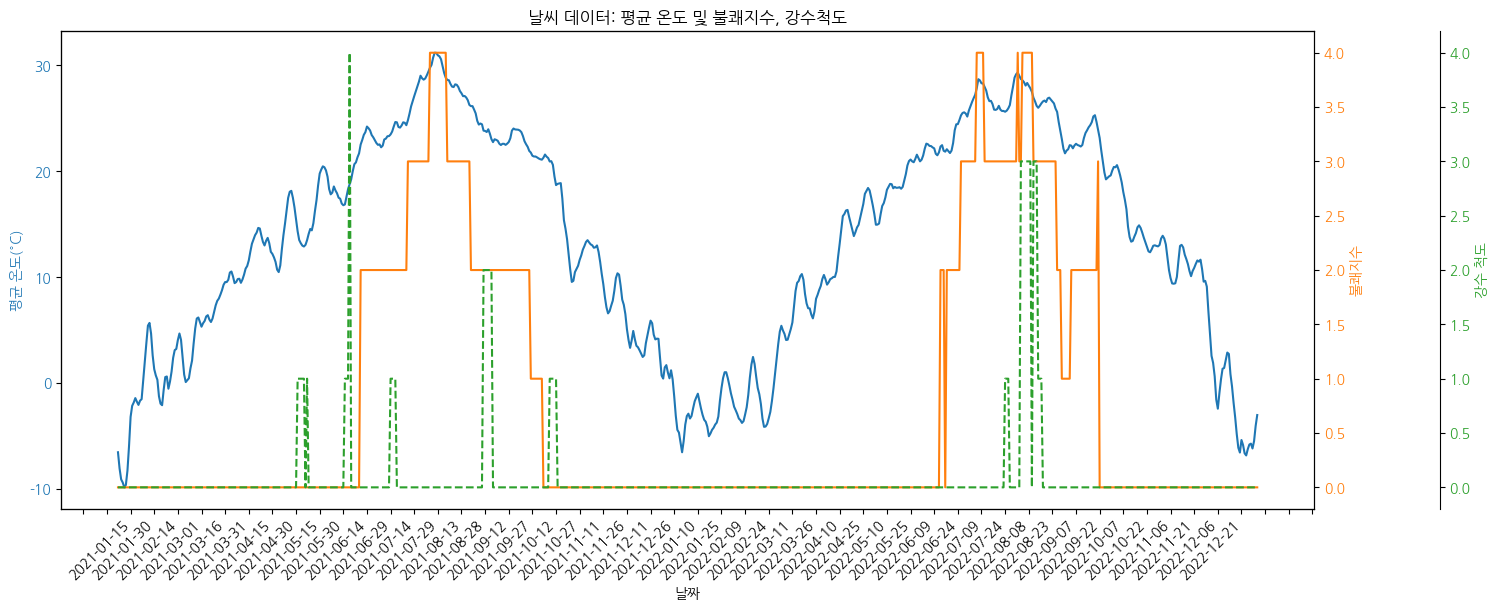

In [56]:
import matplotlib.dates as mdates
from sklearn.preprocessing import OrdinalEncoder

weather_data = pd.DataFrame(df_weather)

weather_data.replace({'discomfortIndex' : { '전원쾌적' : 0 , '불쾌' : 1 ,  '10%불쾌' : 2 ,  '50%불쾌' : 3  ,  '전원불쾌' :4  },
                        'classRainfall' : {  '무강수':0 , '보통비':1 , '약한비': 2, '매우강한비': 3, '강한비':  4 }},  inplace=True)
    
fig, ax1 = plt.subplots(figsize=(15, 6))

temp_date = df_weather['TempAvg']
rainfall_date = weather_data['discomfortIndex']
humid_date = weather_data['classRainfall']

# 이동평균 계산
window = 7
rolling_average_temp = temp_date.rolling(window=window).mean()
rolling_average_rainfall = rainfall_date.rolling(window=window).apply(lambda x: x.mode()[0])
rolling_average_humid = humid_date.rolling(window=window).apply(lambda x: x.mode()[0])
# # 범주형 변수의 중심값 사용

# 온도 데이터 (왼쪽 Y 축)
ax1.plot(weather_data['dateObs'],
         # weather_data['TempAvg'],
         rolling_average_temp.values, color='tab:blue', label='평균 온도')
ax1.set_xlabel('날짜')
ax1.set_ylabel('평균 온도(°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 습도 데이터 (오른쪽 Y 축)
ax2 = ax1.twinx()
ax2.plot(weather_data['dateObs'],
         # weather_data['HumidAvg'],
         rolling_average_rainfall.values, color='tab:orange', label='불쾌지수')
ax2.set_ylabel('불쾌지수', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# ax2.yaxis.set_major_formatter(mticker.FuncFormatter(format_percent))

# 강수량 데이터 (오른쪽 Y 축)
ax3 = ax1.twinx()
ax3.plot(weather_data['dateObs'],
         # weather_data['RainfallAmount'],
         rolling_average_humid.values, color='tab:green', label='강수 척도', linestyle='dashed')
ax3.set_ylabel('강수 척도', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가


# X축 날짜 표시 간격 조정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 간격을 조절해주세요
fig.autofmt_xdate(rotation=45)

fig.tight_layout()
plt.title('날씨 데이터: 평균 온도 및 불쾌지수, 강수척도')
plt.show()

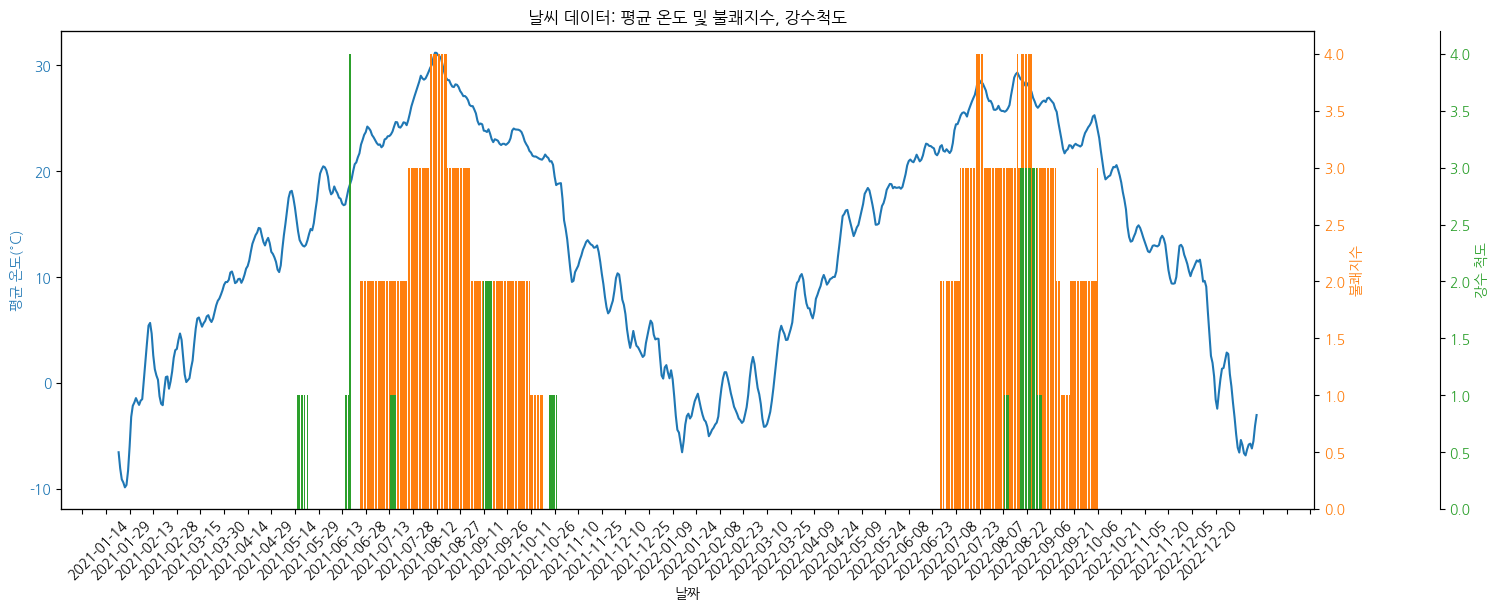

In [58]:
import matplotlib.dates as mdates
from sklearn.preprocessing import OrdinalEncoder

weather_data = pd.DataFrame(df_weather)

weather_data.replace({'discomfortIndex' : { '전원쾌적' : 0 , '불쾌' : 1 ,  '10%불쾌' : 2 ,  '50%불쾌' : 3  ,  '전원불쾌' :4  },
                        'classRainfall' : {  '무강수':0 , '보통비':1 , '약한비': 2, '매우강한비': 3, '강한비':  4 }},  inplace=True)
    
fig, ax1 = plt.subplots(figsize=(15, 6))

temp_date = df_weather['TempAvg']
rainfall_date = weather_data['discomfortIndex']
humid_date = weather_data['classRainfall']

# 이동평균 계산
window = 7
rolling_average_temp = temp_date.rolling(window=window).mean()
rolling_average_rainfall = rainfall_date.rolling(window=window).apply(lambda x: x.mode()[0])
rolling_average_humid = humid_date.rolling(window=window).apply(lambda x: x.mode()[0])
# # 범주형 변수의 중심값 사용

# 온도 데이터 (왼쪽 Y 축)
ax1.plot(weather_data['dateObs'],
         # weather_data['TempAvg'],
         rolling_average_temp.values, color='tab:blue', label='평균 온도')
ax1.set_xlabel('날짜')
ax1.set_ylabel('평균 온도(°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 습도 데이터 (오른쪽 Y 축)
ax2 = ax1.twinx()
ax2.bar(weather_data['dateObs'],rolling_average_rainfall.values, color='tab:orange', label='평균 습도')

# ax2.plot(weather_data['dateObs'],
#          # weather_data['HumidAvg'],
#          rolling_average_rainfall.values, color='tab:orange', label='불쾌지수')
ax2.set_ylabel('불쾌지수', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# ax2.yaxis.set_major_formatter(mticker.FuncFormatter(format_percent))

# 강수량 데이터 (오른쪽 Y 축)
ax3 = ax1.twinx()
ax3.bar(weather_data['dateObs'],
         # weather_data['RainfallAmount'],
         rolling_average_humid.values, color='tab:green', label='강수 척도', linestyle='dashed')
ax3.set_ylabel('강수 척도', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가


# X축 날짜 표시 간격 조정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 간격을 조절해주세요
fig.autofmt_xdate(rotation=45)

fig.tight_layout()
plt.title('날씨 데이터: 평균 온도 및 불쾌지수, 강수척도')
plt.show()

# 날씨 데이터: 불쾌지수, 강수척도별 매출 비교

In [58]:
df_sales_2021 = pd.read_csv("../cvs_data/data_result/2021_df_sales_v3.csv", index_col='Unnamed: 0')
df_sales_2022 = pd.read_csv("../cvs_data/data_result/2022_df_sales_v3.csv", index_col='Unnamed: 0')
df_sales = pd.concat([df_sales_2021, df_sales_2022]).reset_index(drop=True)
df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'] )

df_weather = pd.read_csv("../cvs_data/data_result/weather_v3.csv")
df_weather = df_weather[(df_weather['dateObs_y']==2021 )| (df_weather['dateObs_y']==2022)]

df_weather['dateObs'] = pd.to_datetime(df_weather['dateObs'] )
df_weather = df_weather[['dateObs','TempAvg','classRainfall','discomfortIndex']]
df_weather.columns = ['SalesDate','TempAvg','classRainfall','discomfortIndex']
df_sales_weather = pd.merge(df_sales,df_weather, how='inner',on='SalesDate')

In [102]:
df_sales_weather

,idUser,idPOS,SalesDate,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup,...,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Price,Cost,Grade,TempAvg,classRainfall,discomfortIndex
0,U101066,10337,2021-05-31,2021,5,31,0,05:19:59,남성,10대,...,간편식사,M1,도시락,샐)허닭케이준닭가슴살,3800,3436000,실버,19.9,보통비,전원쾌적
1,U101094,10248,2021-05-31,2021,5,31,0,18:19:36,남성,10대,...,간편식사,M2,샌드위치,햄)허니크림치즈상하이,3300,2875310,실버,19.9,보통비,전원쾌적
2,U101077,10244,2021-05-31,2021,5,31,0,03:47:12,남성,30대,...,간편식사,M2,샌드위치,햄)중화풍유린기버거,3100,3573800,실버,19.9,보통비,전원쾌적
3,U101084,10233,2021-05-31,2021,5,31,0,08:05:19,남성,30대,...,간편식사,M3,주먹밥,김)두껍다떡갈비김밥,2700,3004400,실버,19.9,보통비,전원쾌적
4,U101054,10131,2021-05-31,2021,5,31,0,02:06:37,여성,40대,...,간편식사,M2,샌드위치,샌)더블에그파니니,4000,2289900,실버,19.9,보통비,전원쾌적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509295,U100982,10035,2022-02-27,2022,2,27,6,07:06:40,남성,40대,...,음료,M3,유제품,서울)딸기꿀딴지180ml,1100,2037570,실버,3.7,무강수,전원쾌적
509296,U100989,10039,2022-02-27,2022,2,27,6,21:03:30,남성,60대이상,...,음료,M2,아이스,22del)스윗아메리카노230,900,2173690,실버,3.7,무강수,전원쾌적
509297,U100977,10115,2022-02-27,2022,2,27,6,22:08:15,남성,20대,...,음료,M1,음료,코카)크래프트아메P470ml,2500,2248060,실버,3.7,무강수,전원쾌적
509298,U101098,10023,2022-02-27,2022,2,27,6,04:55:10,남성,30대,...,음료,M1,음료,코카)조지아맥스캔,1200,2035190,실버,3.7,무강수,전원쾌적


In [115]:
grouped_sales

classRainfall  discomfortIndex
강한비            10%불쾌               14838950
               50%불쾌                7936880
               불쾌                  11493600
               전원불쾌                 4751200
               전원쾌적                46150060
매우강한비          10%불쾌               20893160
               50%불쾌               27200760
               불쾌                   2707650
               전원불쾌                 2884840
               전원쾌적                14073170
무강수            10%불쾌              143142520
               50%불쾌              103462790
               불쾌                  35045460
               전원불쾌                58584480
               전원쾌적               748367470
보통비            10%불쾌               34043500
               50%불쾌               36542640
               불쾌                  19335600
               전원불쾌                 4046860
               전원쾌적               128938950
약한비            10%불쾌               13640580
               50%불쾌               14035470
 

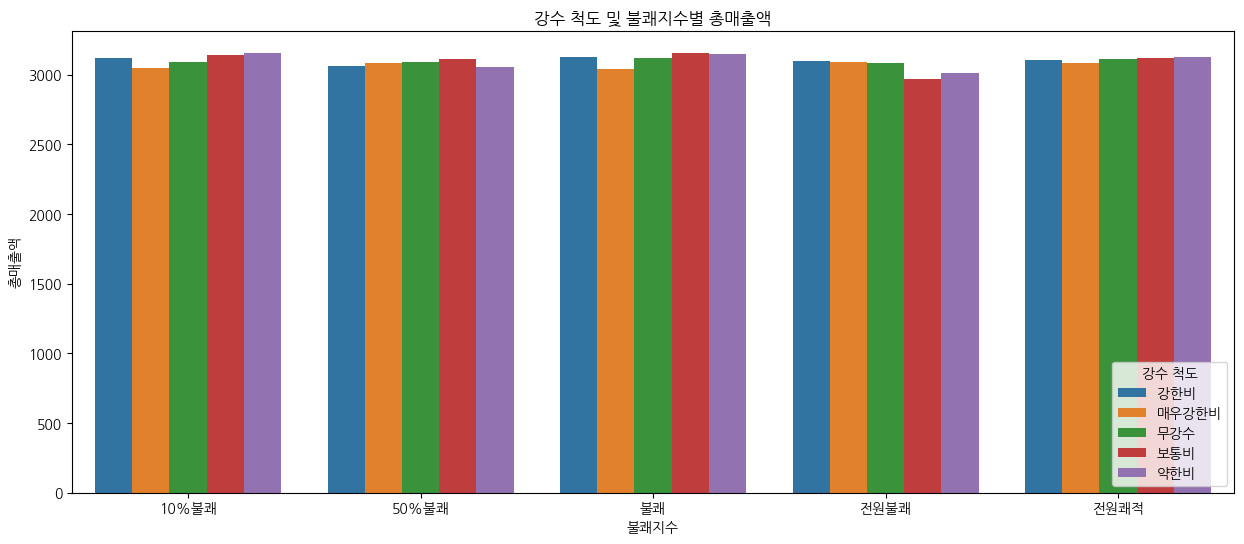

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['classRainfall', 'discomfortIndex'])['Price'].mean()
# .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=grouped_sales.reset_index(), x='discomfortIndex', y='Price', hue='classRainfall')

# plt.yscale('log')
plt.title('강수 척도 및 불쾌지수별 총매출액')
plt.xlabel('불쾌지수')
plt.ylabel('총매출액')
plt.legend(title='강수 척도', loc='lower right')

plt.show()

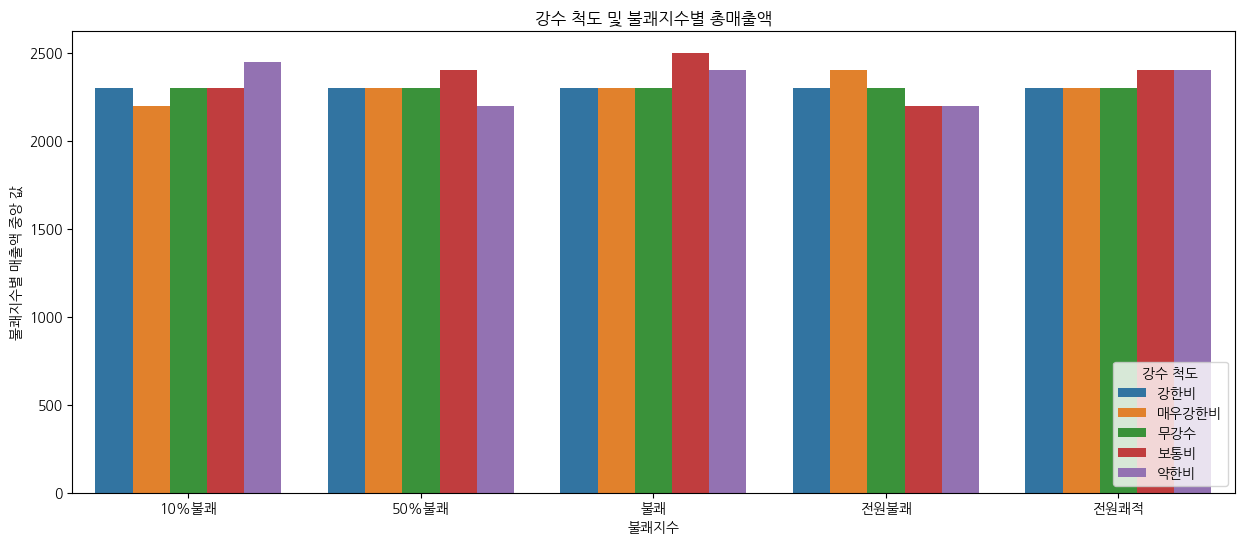

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['classRainfall', 'discomfortIndex'])['Price'].median()
# .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=grouped_sales.reset_index(), x='discomfortIndex', y='Price', hue='classRainfall')

# plt.yscale('log')
plt.title('강수 척도 및 불쾌지수별 총매출액')
plt.xlabel('불쾌지수')
plt.ylabel('불쾌지수별 매출액 중앙 값')
plt.legend(title='강수 척도', loc='lower right')

plt.show()

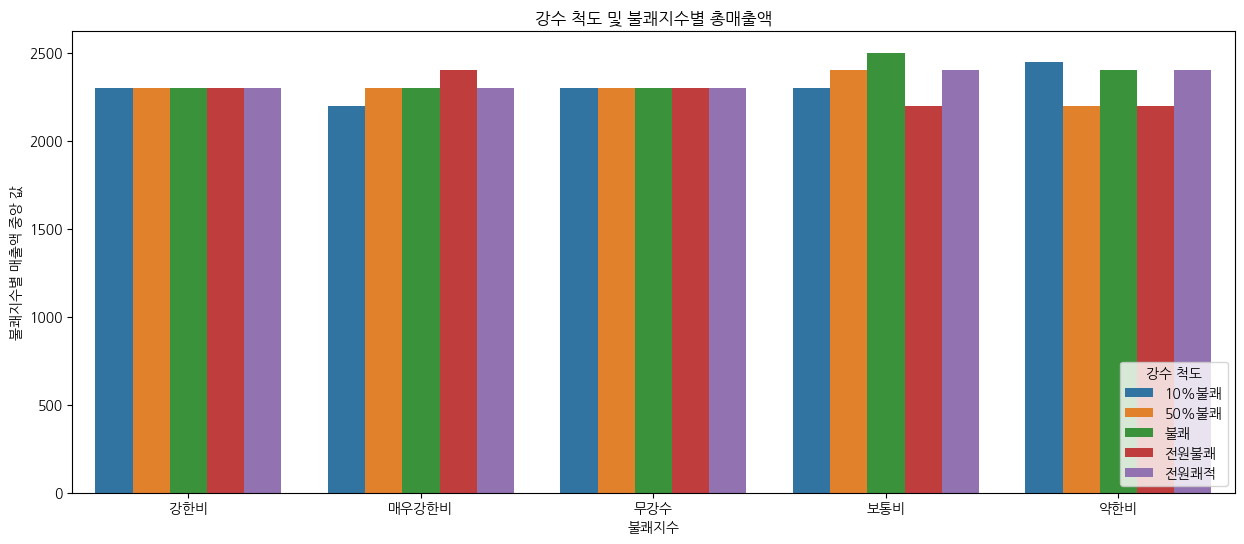

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['classRainfall', 'discomfortIndex'])['Price'].median()
# .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=grouped_sales.reset_index(), x='classRainfall', y='Price', hue='discomfortIndex')

# plt.yscale('log')
plt.title('강수 척도 및 불쾌지수별 총매출액')
plt.xlabel('불쾌지수')
plt.ylabel('불쾌지수별 매출액 중앙 값')
plt.legend(title='강수 척도', loc='lower right')

plt.show()

## log 씌운것

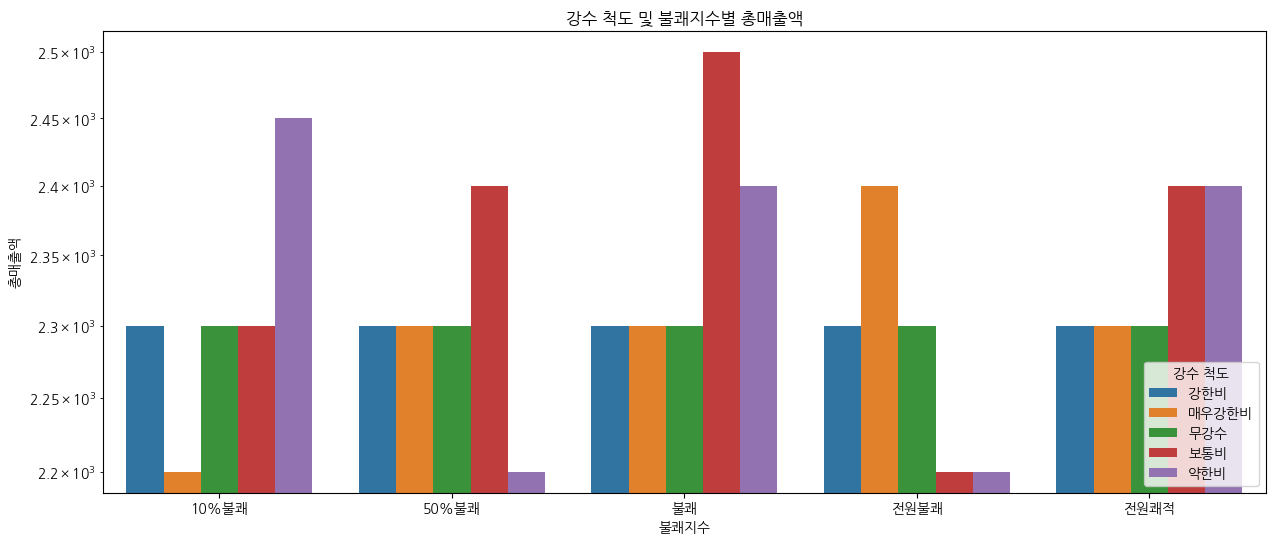

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['classRainfall', 'discomfortIndex'])['Price'].median()
# .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=grouped_sales.reset_index(), x='discomfortIndex', y='Price', hue='classRainfall')

plt.yscale('log')# plt.yscale('log')
plt.title('강수 척도 및 불쾌지수별 총매출액')
plt.xlabel('불쾌지수')
plt.ylabel('총매출액')
plt.legend(title='강수 척도', loc='lower right')

plt.show()

## 상관관계

In [87]:
df_sales_2021 = pd.read_csv("../cvs_data/data_result/2021_df_sales_v3.csv", index_col='Unnamed: 0')
df_sales_2022 = pd.read_csv("../cvs_data/data_result/2022_df_sales_v3.csv", index_col='Unnamed: 0')
df_sales = pd.concat([df_sales_2021, df_sales_2022]).reset_index(drop=True)
df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'] )

df_weather = pd.read_csv("../cvs_data/data_result/weather_v3.csv")
df_weather = df_weather[(df_weather['dateObs_y']==2021 )| (df_weather['dateObs_y']==2022)]

df_weather['SalesDate'] = pd.to_datetime(df_weather['dateObs'] )
# df_weather = df_weather[['dateObs','TempAvg','classRainfall','discomfortIndex']]
# df_weather.columns = ['SalesDate','TempAvg','classRainfall','discomfortIndex']
df_sales_weather = pd.merge(df_sales,df_weather, how='inner',on='SalesDate')

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales_rainfall = df_sales_weather.groupby(['SalesDate','RainfallAmount'])['Price'].agg(['sum']).reset_index(level=0).iloc[:,-1].to_frame()
grouped_sales_rainfall.columns=['Price']
display(grouped_sales_rainfall.reset_index().corr())

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales_humid = df_sales_weather.groupby(['SalesDate','HumidAvg'])['Price'].agg(['sum']).reset_index(level=0).iloc[:,-1].to_frame()
grouped_sales_humid.columns=['Price']
display(grouped_sales_humid.reset_index().corr())

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales_temp = df_sales_weather.groupby(['SalesDate','TempAvg'])['Price'].agg(['sum']).reset_index(level=0).iloc[:,-1].to_frame()
grouped_sales_temp.columns=['Price']
display(grouped_sales_temp.reset_index().corr())

,RainfallAmount,Price
RainfallAmount,1.0000,0.1256
Price,0.1256,1.0000


,HumidAvg,Price
HumidAvg,1.000000,0.289259
Price,0.289259,1.000000


,TempAvg,Price
TempAvg,1.000000,0.472066
Price,0.472066,1.000000


,TempAvg,RainfallAmount,HumidAvg
TempAvg,1.000000,0.167329,0.441145
RainfallAmount,0.167329,1.000000,0.416235
HumidAvg,0.441145,0.416235,1.000000


<Axes: >

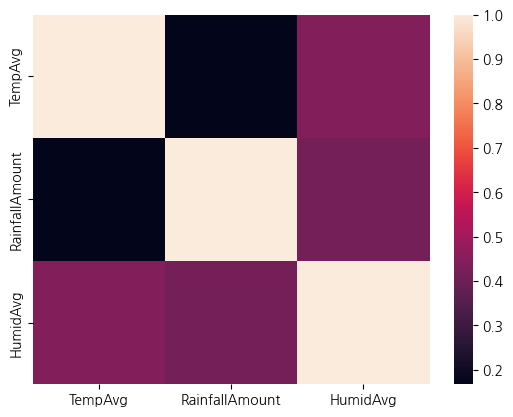

In [109]:
df_corr = pd.merge( pd.merge(grouped_sales_rainfall.reset_index(), grouped_sales_humid.reset_index() ,on='Price', how='inner') , grouped_sales_temp.reset_index(), \
on='Price', how='inner')
df_corr = df_corr[['TempAvg', 'RainfallAmount', 'HumidAvg']]
display(df_corr.corr())
sns.heatmap(df_corr.corr())

In [86]:
grouped_sales.reset_index()

,TempAvg,Price
0,-4.2,1904650
1,-5.0,1214820
2,-5.6,775400
3,-3.5,1738250
4,-5.5,1766380
...,...,...
724,-3.9,2552290
725,-2.6,2164380
726,-3.3,1972620
727,-2.9,2412670


In [76]:
df_sales_weather.groupby(['SalesDate','HumidAvg'])['Price'].agg(['mean','sum'])

,,mean,sum
SalesDate,HumidAvg,,
2021-01-01,64.0,3239.200680,1904650
2021-01-02,38.5,3060.000000,1214820
2021-01-03,45.0,2829.927007,775400
2021-01-04,51.4,3071.113074,1738250
2021-01-05,52.8,2958.760469,1766380
...,...,...,...
2022-12-26,68.4,3327.627119,2552290
2022-12-27,69.8,3136.782609,2164380
2022-12-28,58.1,3082.218750,1972620


In [64]:

df_sales_weather.columns

Index(['idUser', 'idPOS', 'SalesDate', 'SalesYear', 'SalesMonth', 'SalesDay',
       'SalesWeekday', 'SalesTime', 'Gender', 'AgeGroup', 'ItemId',
       'ItemIdLarge', 'ItemNameLarge', 'ItemIdMiddle', 'ItemNameMiddle',
       'ItemName', 'Price', 'Cost', 'Grade', 'dateObs', 'dateObs_y',
       'dateObs_m', 'dateObs_d', 'TempAvg', 'TempMin', 'hhmiTempMin',
       'TempMax', 'hhmiTempMax', 'hhmiTempMin_h', 'hhmiTempMin_m',
       'hhmiTempMax_h', 'hhmiTempMax_m', 'classRainfall', 'hourRainfall',
       'RainfallAmount', 'discomfortIndex', 'HumidAvg', 'SnowloadMax',
       'hhmiSnowloadMax', 'hhmiSnowloadMax_h', 'hhmiSnowloadMax_m'],
      dtype='object')

# 온도와 매출

In [45]:
M_t = df_sales_weather['TempAvg'].max()
m_t = df_sales_weather['TempAvg'].min()
m_t+(M_t-m_t)//4

-3.9000000000000004

In [41]:
df_sales_weather

,idUser,idPOS,SalesDate,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Price,TempAvg,classRainfall,discomfortIndex
0,U101066,U101066-Y2021M5D31-P10337,2021-05-31,2021,5,31,0,17:19:59,남성,10대,I-8809558848506,L1,간편식사,M1,도시락,샐)허닭케이준닭가슴살,3800,19.9,보통비,전원쾌적
1,U101094,U101094-Y2021M5D31-P10248,2021-05-31,2021,5,31,0,06:19:36,남성,10대,I-8809692952725,L1,간편식사,M2,샌드위치,햄)허니크림치즈상하이,3300,19.9,보통비,전원쾌적
2,U101077,U101077-Y2021M5D31-P10244,2021-05-31,2021,5,31,0,15:47:12,남성,30대,I-8809453265514,L1,간편식사,M2,샌드위치,햄)중화풍유린기버거,3100,19.9,보통비,전원쾌적
3,U101084,U101084-Y2021M5D31-P10233,2021-05-31,2021,5,31,0,20:05:19,남성,30대,I-8809383954557,L1,간편식사,M3,주먹밥,김)두껍다떡갈비김밥,2700,19.9,보통비,전원쾌적
4,U101054,U101054-Y2021M5D31-P10131,2021-05-31,2021,5,31,0,14:06:37,여성,40대,I-8801068403084,L1,간편식사,M2,샌드위치,샌)더블에그파니니,4000,19.9,보통비,전원쾌적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509295,U100982,U100982-Y2022M2D27-P10035,2022-02-27,2022,2,27,6,19:06:40,남성,40대,I-8801115384014,L6,음료,M3,유제품,서울)딸기꿀딴지180ml,1100,3.7,무강수,전원쾌적
509296,U100989,U100989-Y2022M2D27-P10039,2022-02-27,2022,2,27,6,09:03:30,남성,60대이상,I-8808024031015,L6,음료,M2,아이스,22del)스윗아메리카노230,900,3.7,무강수,전원쾌적
509297,U100977,U100977-Y2022M2D27-P10115,2022-02-27,2022,2,27,6,10:08:15,남성,20대,I-8801094502669,L6,음료,M1,음료,코카)크래프트아메P470ml,2500,3.7,무강수,전원쾌적
509298,U101098,U101098-Y2022M2D27-P10023,2022-02-27,2022,2,27,6,16:55:10,남성,30대,I-8801094523206,L6,음료,M1,음료,코카)조지아맥스캔,1200,3.7,무강수,전원쾌적


In [49]:
grouped_sales.rolling(window=window_size, center=True).mean()*100

,Price
TempAvg,
-14.9,NaN
-14.5,NaN
-12.2,NaN
-12.1,NaN
-11.8,NaN
...,...
31.2,NaN
31.2,NaN
31.2,NaN


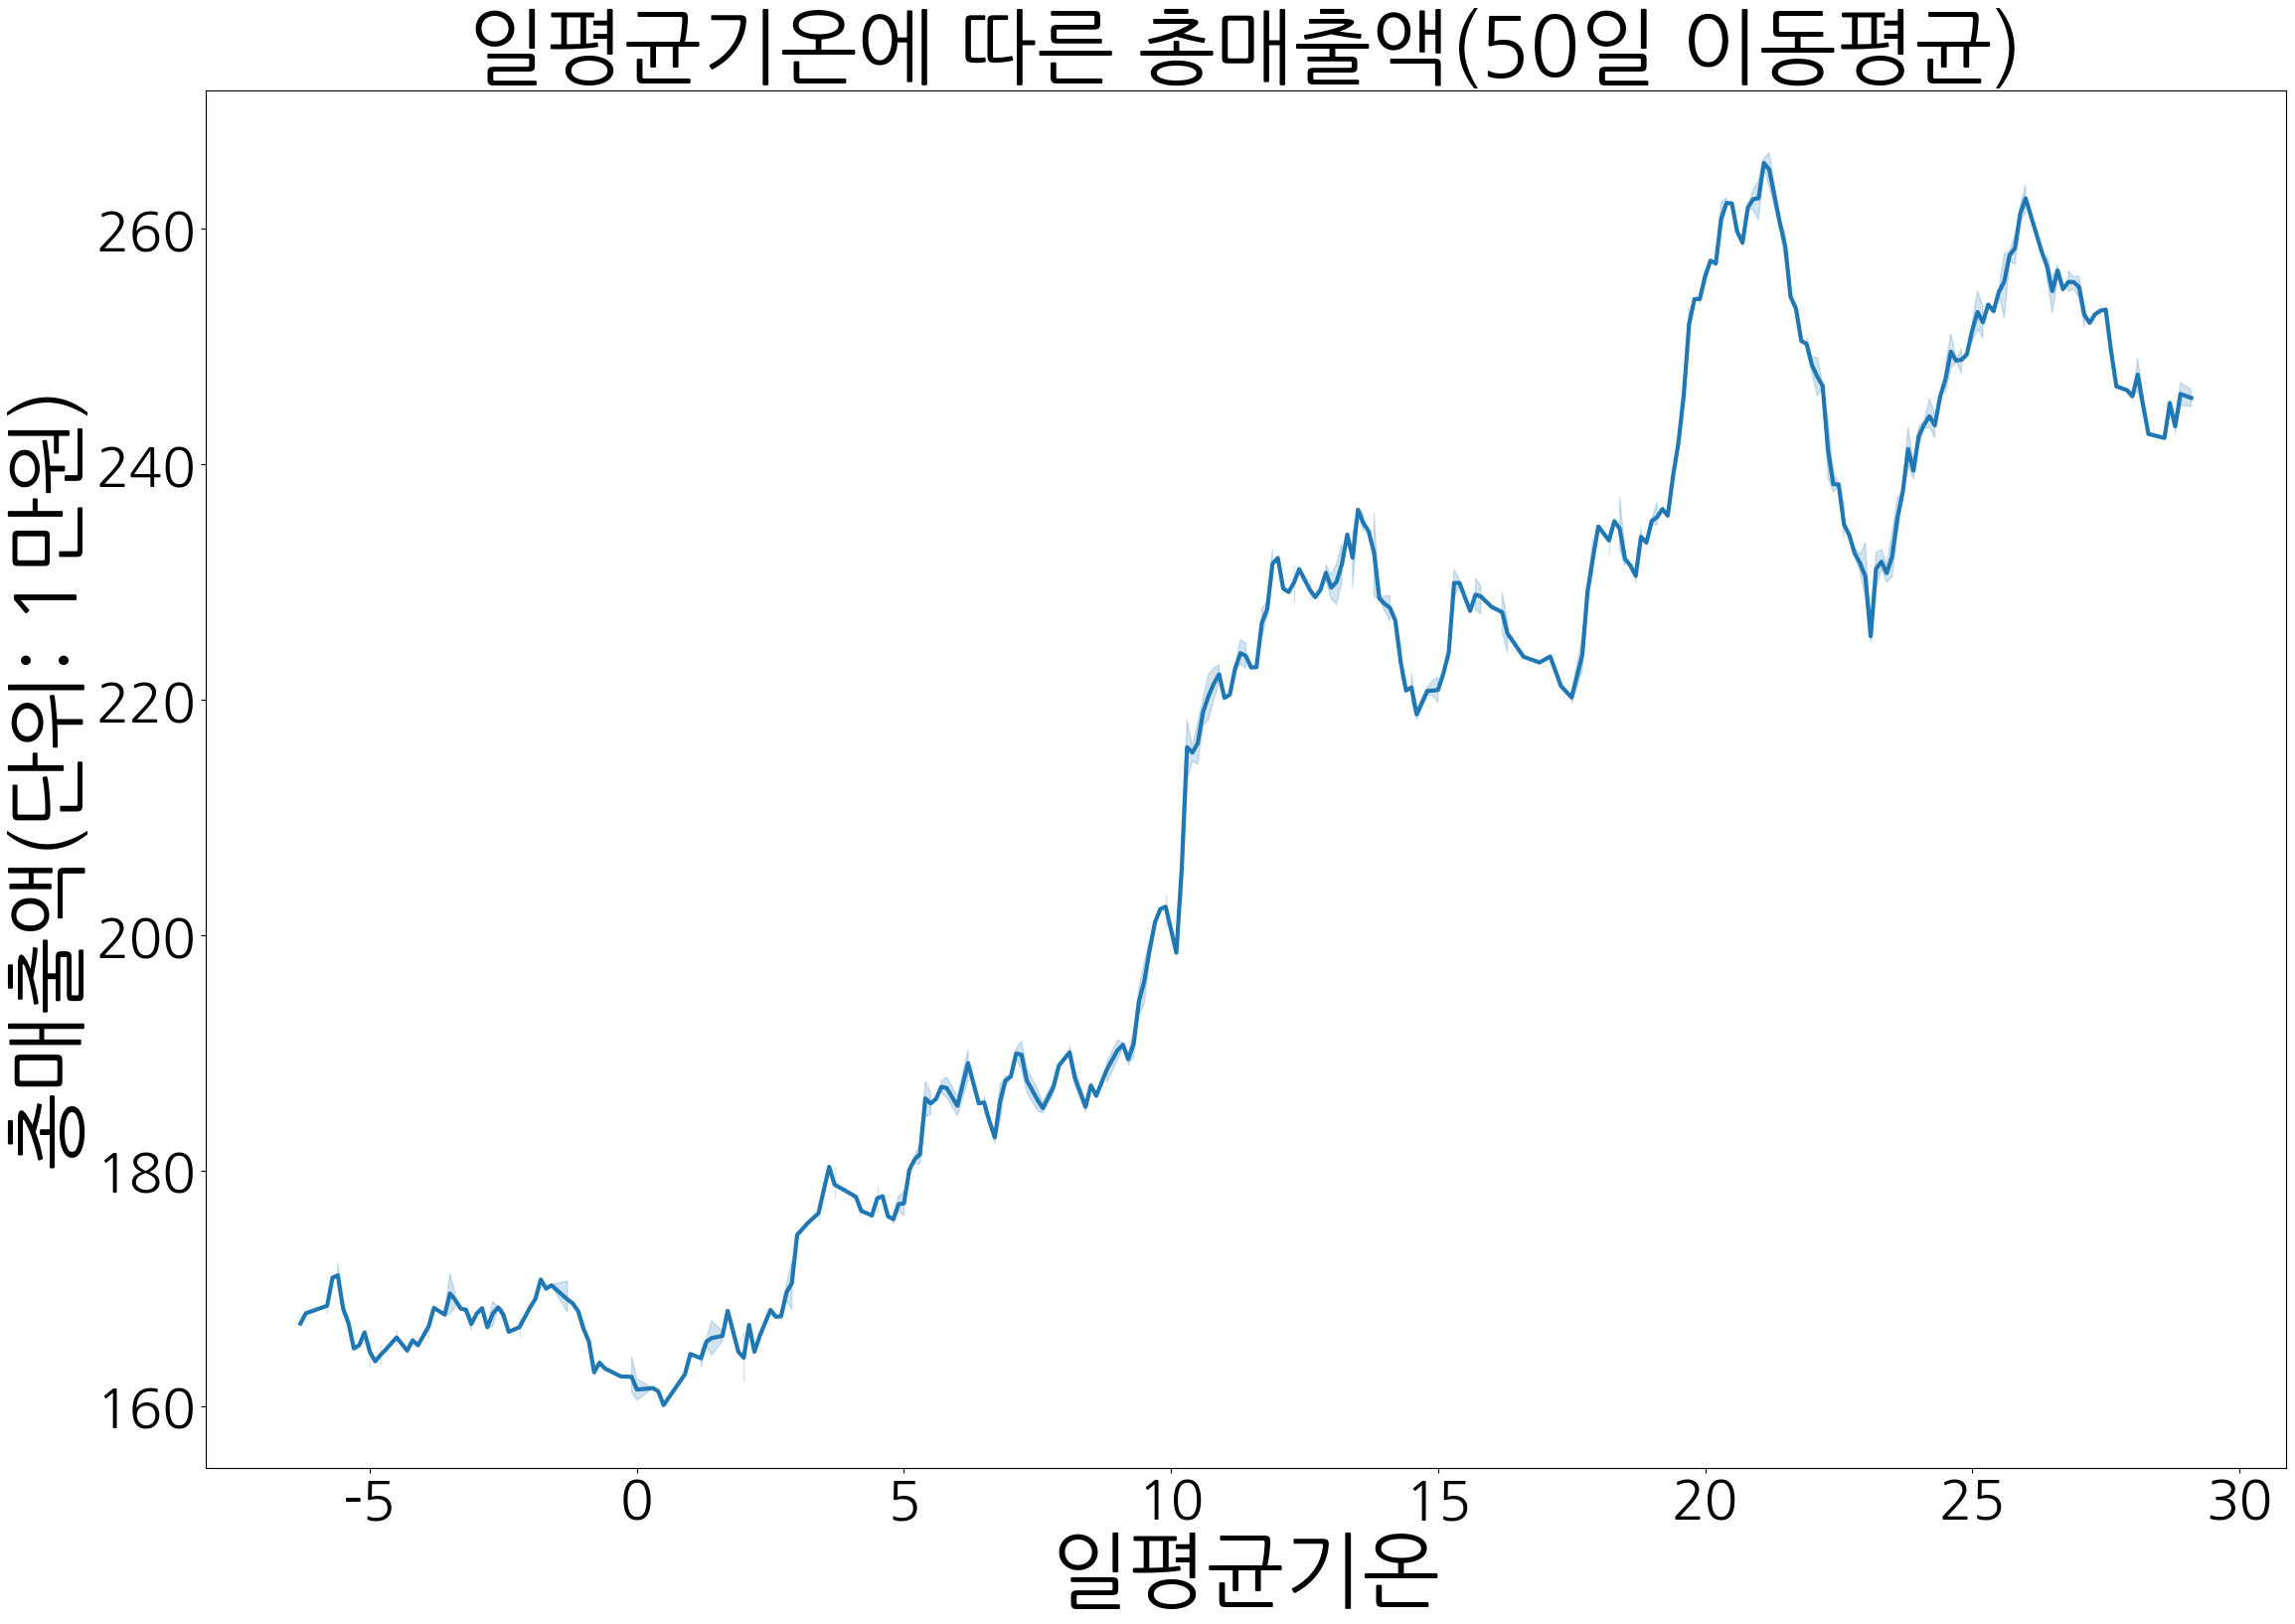

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
grouped_sales = df_sales_weather.groupby(['SalesDate','TempAvg'])['Price'].agg(['sum']).reset_index(level=0).sort_index().iloc[:,-1].to_frame()
grouped_sales.columns=['Price']
# df_sales_weather.groupby(['TempAvg'])['Price'].sum()
# grouped_sales_date = df_sales_weather.groupby(['TempAvg'])['SalesDate'].size()


# 이동평균 계산 (window size를 조절하여 원하는 기간으로 설정 가능)
window_size = 50
moving_average = grouped_sales.rolling(window=window_size, center=True).mean()

fig, ax = plt.subplots(figsize=(27, 18))
# sns.lineplot(data=grouped_sales.reset_index(), x='TempAvg', y='Price', estimator='mean', ci=None, label='Daily Sales')
sns.lineplot(data=moving_average.reset_index(), x='TempAvg', y='Price', linewidth=3)
ax.tick_params(axis='y', labelsize=40 ) 
ax.tick_params(axis='x', labelsize=40 ) 

plt.title('일평균기온에 따른 총매출액({}일 이동평균)'.format(window_size), fontsize=60)
plt.xlabel('일평균기온', fontsize=60)
plt.ylabel('총매출액(단위: 1만원)', fontsize=60)
# plt.legend()
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x/10000) for x in current_values])

plt.show()

In [102]:
grouped_sales.reset_index().corr()

,TempAvg,Price
TempAvg,1.000000,0.472066
Price,0.472066,1.000000


In [99]:
df_sales_weather.groupby(['SalesDate','TempAvg'])['Price'].agg(['sum']).reset_index(level=1).to_csv("평균온도-총매출액.csv")

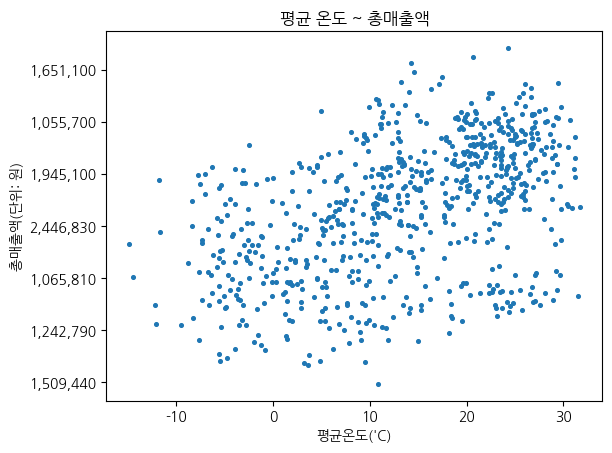

In [103]:
plt.scatter(grouped_sales.reset_index()['TempAvg'], grouped_sales.reset_index()['Price'], s=7)

plt.gca().set_yticklabels(['{:,}'.format(x) for x in grouped_sales.reset_index()['Price']])
 
plt.title('평균 온도 ~ 총매출액')
plt.xlabel('평균온도(\'C)')
plt.ylabel('총매출액(단위: 원)')

# 직선을 그린 예시, (0, 0)과 (0, 100)을 잇는 선 그래프

plt.show()

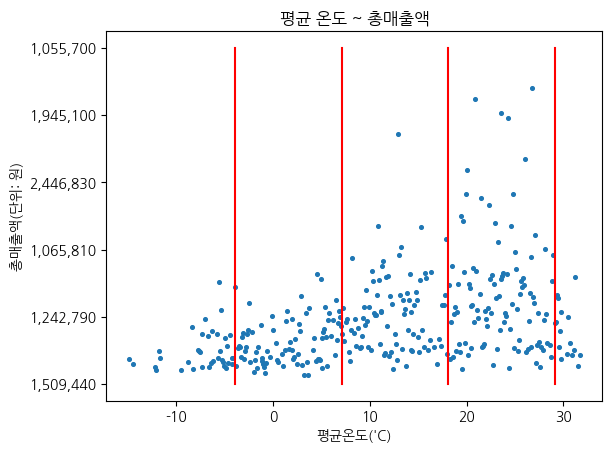

In [203]:
M_t = df_sales_weather['TempAvg'].max()
m_t = df_sales_weather['TempAvg'].min()
m_t+(M_t-m_t)//4


x_m = [m_t+(M_t-m_t)//4, m_t+(M_t-m_t)//4]
x_9 = [m_t+(M_t-m_t)//4*2, m_t+(M_t-m_t)//4*2]
x_20 = [m_t+(M_t-m_t)//4*3, m_t+(M_t-m_t)//4*3]
x_22 = [m_t+(M_t-m_t)//4*4, m_t+(M_t-m_t)//4*4]

# x = [0, ]

y = [0, 25000000]

plt.scatter(grouped_sales.reset_index()['TempAvg'], grouped_sales.reset_index()['Price'], s=7)
plt.plot(x_m, y,c='r')
plt.plot(x_9, y,c='r')
plt.plot(x_20, y,c='r')
plt.plot(x_22, y,c='r')



plt.gca().set_yticklabels(['{:,}'.format(x) for x in grouped_sales.reset_index()['Price']])
 
plt.title('평균 온도 ~ 총매출액')
plt.xlabel('평균온도(\'C)')
plt.ylabel('총매출액(단위: 원)')




# 직선을 그린 예시, (0, 0)과 (0, 100)을 잇는 선 그래프

plt.show()

# 불쾌지수 ~ 매출

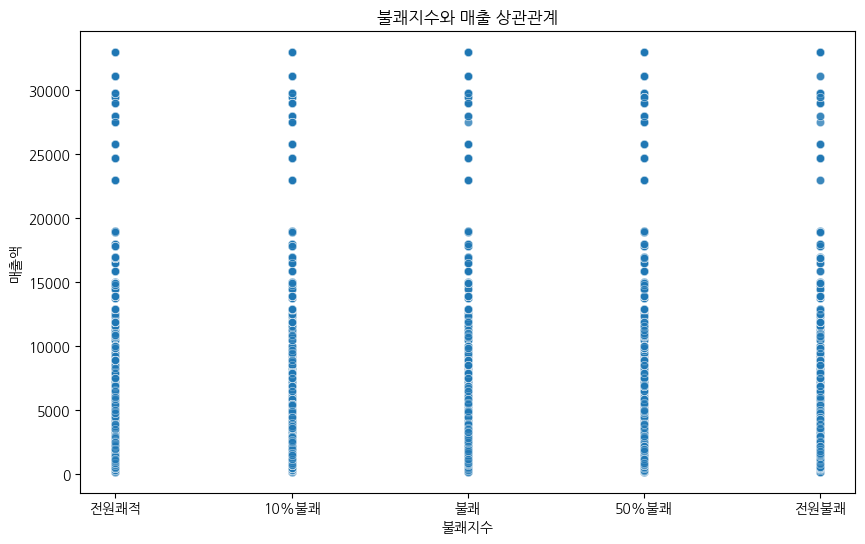

In [5]:
df_sales_2021 = pd.read_csv("../cvs_data/data_result/2021_df_sales_v3.csv", index_col='Unnamed: 0')
df_sales_2022 = pd.read_csv("../cvs_data/data_result/2022_df_sales_v3.csv", index_col='Unnamed: 0')
df_sales = pd.concat([df_sales_2021, df_sales_2022]).reset_index(drop=True)
df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'] )

df_weather = pd.read_csv("../cvs_data/data_result/weather_v3.csv")
df_weather = df_weather[(df_weather['dateObs_y']==2021 )| (df_weather['dateObs_y']==2022)]

df_weather['dateObs'] = pd.to_datetime(df_weather['dateObs'] )
df_weather = df_weather[['dateObs','TempAvg','classRainfall','discomfortIndex']]
df_weather.columns = ['SalesDate','TempAvg','classRainfall','discomfortIndex']
df_sales_weather = pd.merge(df_sales,df_weather, how='inner',on='SalesDate')





discomfort_index = df_sales_weather['discomfortIndex']
sales = df_sales_weather['Price']

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=discomfort_index, y=sales, alpha=0.5)

plt.title('불쾌지수와 매출 상관관계')
plt.xlabel('불쾌지수')
plt.ylabel('매출액')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 불쾌지수와 매출 데이터 추출
discomfort_index = df_sales_weather['discomfortIndex']
sales = df_sales_weather['Price']

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=discomfort_index, y=sales, alpha=0.5)

# 선형 회귀선 추가
sns.regplot(x=discomfort_index, y=sales, scatter=False, color='red')

plt.title('불쾌지수와 매출 상관관계')
plt.xlabel('불쾌지수')
plt.ylabel('매출액')

plt.show()


# 날씨별 판매상품

In [10]:
df_sales_2021 = pd.read_csv("../cvs_data/data_result/2021_sales_v3_POS_DATE.csv")
df_sales_2022 = pd.read_csv("../cvs_data/data_result/2022_sales_v3_POS_DATE.csv")
df_sales_itemsNprice_POS = pd.read_csv("../cvs_data/data_result/users_itemsCategory_POS_v2.csv")
df_sales = pd.concat([df_sales_2021, df_sales_2022]).reset_index(drop=True)
df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'] )

df_weather = pd.read_csv("../cvs_data/data_result/weather_v3.csv")
df_weather = df_weather[(df_weather['dateObs_y']==2021 )| (df_weather['dateObs_y']==2022)]

df_weather['dateObs'] = pd.to_datetime(df_weather['dateObs'] )
df_weather = df_weather[['dateObs','TempAvg','classRainfall','discomfortIndex']]
df_weather.columns = ['SalesDate','TempAvg','classRainfall','discomfortIndex']
df_sales_weather = pd.merge(df_sales,df_weather, how='inner',on='SalesDate')

In [11]:
display(df_sales_weather)
display(df_sales_itemsNprice_POS)

,idUser,idPOS,SalesDate,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Price,TempAvg,classRainfall,discomfortIndex
0,U101066,U101066-Y2021M5D31-P10337,2021-05-31,2021,5,31,0,17:19:59,남성,10대,I-8809558848506,L1,간편식사,M1,도시락,샐)허닭케이준닭가슴살,3800,19.9,보통비,전원쾌적
1,U101094,U101094-Y2021M5D31-P10248,2021-05-31,2021,5,31,0,06:19:36,남성,10대,I-8809692952725,L1,간편식사,M2,샌드위치,햄)허니크림치즈상하이,3300,19.9,보통비,전원쾌적
2,U101077,U101077-Y2021M5D31-P10244,2021-05-31,2021,5,31,0,15:47:12,남성,30대,I-8809453265514,L1,간편식사,M2,샌드위치,햄)중화풍유린기버거,3100,19.9,보통비,전원쾌적
3,U101084,U101084-Y2021M5D31-P10233,2021-05-31,2021,5,31,0,20:05:19,남성,30대,I-8809383954557,L1,간편식사,M3,주먹밥,김)두껍다떡갈비김밥,2700,19.9,보통비,전원쾌적
4,U101054,U101054-Y2021M5D31-P10131,2021-05-31,2021,5,31,0,14:06:37,여성,40대,I-8801068403084,L1,간편식사,M2,샌드위치,샌)더블에그파니니,4000,19.9,보통비,전원쾌적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509295,U100982,U100982-Y2022M2D27-P10035,2022-02-27,2022,2,27,6,19:06:40,남성,40대,I-8801115384014,L6,음료,M3,유제품,서울)딸기꿀딴지180ml,1100,3.7,무강수,전원쾌적
509296,U100989,U100989-Y2022M2D27-P10039,2022-02-27,2022,2,27,6,09:03:30,남성,60대이상,I-8808024031015,L6,음료,M2,아이스,22del)스윗아메리카노230,900,3.7,무강수,전원쾌적
509297,U100977,U100977-Y2022M2D27-P10115,2022-02-27,2022,2,27,6,10:08:15,남성,20대,I-8801094502669,L6,음료,M1,음료,코카)크래프트아메P470ml,2500,3.7,무강수,전원쾌적
509298,U101098,U101098-Y2022M2D27-P10023,2022-02-27,2022,2,27,6,16:55:10,남성,30대,I-8801094523206,L6,음료,M1,음료,코카)조지아맥스캔,1200,3.7,무강수,전원쾌적


,idUser,idPOS,SalesDate,Price,간편식사_도시락,간편식사_샌드위치,간편식사_주먹밥,과자류_껌/초,과자류_빵/디,과자류_스낵,...,즉석조리_베이커,즉석조리_즉석커,즉석조리_튀김류,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup
0,U100001,U100001-Y2021M1D10-P10008,2021-01-10,1000,0,0,0,0,0,0,...,0,0,0,2021,1,10,6,06:16:24,남성,40대
1,U100001,U100001-Y2021M1D3-P10004,2021-01-03,6500,0,0,0,0,0,0,...,0,0,0,2021,1,3,6,19:08:12,남성,40대
2,U100001,U100001-Y2021M1D7-P10006,2021-01-07,750,0,0,0,0,0,0,...,0,0,0,2021,1,7,3,00:42:18,남성,40대
3,U100277,U100277-Y2022M10D11-P10324,2022-10-11,5300,0,0,0,0,0,0,...,0,0,0,2022,10,11,1,00:09:52,여성,30대
4,U100277,U100277-Y2022M10D11-P10325,2022-10-11,1500,0,0,0,1,0,0,...,0,0,0,2022,10,11,1,13:45:07,여성,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215613,U101098,U101098-Y2022M9D19-P10151,2022-09-19,5200,0,0,0,0,0,1,...,0,0,0,2022,9,19,0,19:03:10,남성,30대
215614,U101098,U101098-Y2022M9D23-P10154,2022-09-23,3700,0,0,0,0,0,1,...,0,0,0,2022,9,23,4,14:13:40,남성,30대
215615,U101098,U101098-Y2022M9D29-P10157,2022-09-29,2900,0,0,1,0,0,1,...,0,0,0,2022,9,29,3,09:24:10,남성,30대
215616,U101098,U101098-Y2022M9D30-P10158,2022-09-30,10300,0,0,0,0,0,0,...,0,0,0,2022,9,30,4,15:47:40,남성,30대


In [7]:
df_sales_2022['ItemId'].value_counts()

I-3415581153019    101
I-8809350885686     98
I-8809453265019     97
I-8801448160286     95
I-8801039207680     94
                  ... 
I-8801068398540     11
I-2201148674124     10
I-2201148669465     10
I-8801068398700      8
I-2201148669816      7
Name: ItemId, Length: 4305, dtype: int64

In [8]:
df_sales['ItemId'].value_counts()

I-8801448160286    172
I-8804751550119    170
I-8801045925790    168
I-8801024945474    168
I-8809350885686    167
                  ... 
I-8801068398540     23
I-2201148670485     21
I-8801068398717     20
I-8801068398700     16
I-2201148669816     15
Name: ItemId, Length: 4305, dtype: int64

## 강수 정도별 가장 많이팔린 물품 확인

In [18]:
import pandas as pd

for rain_class in ['무강수','약한비','보통비','강한비','매우강한비']:
    # 강수량(classRainfall)이 많은 데이터 추출
    high_rainfall_data = df_sales_weather[(df_sales_weather['classRainfall'] == rain_class) ]
                                            # & (df_sales_weather['ItemNameLarge'] == '음료') ]
    
    # 강수량이 많은 상황에서 가장 많이 팔린 (ItemId, ItemName) 상위 20개 확인
    most_sold_items_rainfall = high_rainfall_data.groupby(['ItemId', 'ItemName'])['ItemId'].count().sort_values(ascending=False).head(20)
    
    print("강수량이 {}일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:".format(rain_class))
    display(most_sold_items_rainfall)
    print()


강수량이 무강수일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:


ItemId           ItemName       
I-2200000015167  즉석빵)피넛버터쿠키         122
I-8809802263789  김)창녕마늘햄유부          121
I-8801121033463  매일)어메징오트언스위트       121
I-8801007069883  CJ)모닝두부오리엔탈150g    119
I-8809826440074  해성)대추방토500g        119
I-8809142023876  뉴푸드)혼합채소오리엔탈       118
I-8801037057867  티오피)더블랙캔380ml      118
I-8809296889526  팔도)비빔장버터간장         118
I-8801448160286  만인산)매운고추200g       118
I-8801056103569  롯데)트레비금귤P500ml     117
I-8801104671002  빙그레)복숭아아이스티30      117
I-8809638770116  헬로)또요플레요거트150m     117
I-8809456810476  푸드)간편샤인사과컵         117
I-8809505141568  엠즈)폴바셋돌체라떼330m     116
I-8801104304573  빙그레)쥬시쿨청포도450m     116
I-8801121770757  매일)바이오드링킹블루        116
I-8801771024033  주)쿠시마사돈까스마요        116
I-8804751550119  씨즈)한컵우유맛           116
I-2201148663258  도너츠)스트로베리필드        115
I-8801073210363  삼양)불닭볶음면컵          115
Name: ItemId, dtype: int64


강수량이 약한비일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:


ItemId           ItemName      
I-8801005961561  샘표)크림파스타소스        25
I-8801448160286  만인산)매운고추200g      24
I-8801005931557  샘표)불닭크림떡볶이양념      22
I-8802456400111  영찬)먹기좋은육포채16g     20
I-8809731109516  신세계)치아바타피자불고      20
I-8801104670944  빙그레)따옴애플망고235m    20
I-8801047858959  동원)리챔200g*3+1입    20
I-8801492380357  하림)미식장인라면담백컵      19
I-8801007441351  CJ)진한참기름110ml     19
I-8801121027141  매일)썬업과일야채그린컵      19
I-8805684004793  MDS)사천왕마라샹궈컵      19
I-8801155734763  동원)시나몬초코우유300m    19
I-8809296884477  팔도)만능비빔장시그니처      19
I-8801068371864  샐)퀴노아바질샐러드        19
I-8801121752296  매일)썬업과일야채레드       18
I-8801448108424  만인산)양파망1kg        18
I-8809802264359  꿉당)고추장수란파스타       18
I-8801121029541  매일)셀렉스프로틴초코       18
I-8801007814759  CJ)고메치즈볼135g      18
I-8801771024156  NCT)HOT돈까스김밥      18
Name: ItemId, dtype: int64


강수량이 보통비일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:


ItemId           ItemName      
I-8809562170020  설운)시원얼음1kg        33
I-8801073114937  삼양)삼양비빔면          33
I-8801055702893  네슬레)스윗아메리카원컵      33
I-8804751550119  씨즈)한컵우유맛          31
I-8809487130161  샐)아임닭단백질샐러드       31
I-8809802264342  편스)완전매콤고추면        31
I-8809196614532  도)통새우유산슬덮밥        31
I-8801133007285  머거본)모둠견과플래터       30
I-8809802264021  피)오리지널마르게리피자      30
I-8801155208011  동원)네스퀵초코드링크       30
I-2201148662299  피자)비프스테이크피자       30
I-8801019505225  해태)샤오롱고향만두180g    30
I-8809674970242  해표)들기름볶음김치120g    30
I-8801068087130  삼립)저온숙식빵          30
I-8809140575674  샌)이건가요참치마요        29
I-8807218411725  신라)스위트갈릭파이14입     29
I-8809453264029  김)확실한참치김밥         29
I-8801094132705  코카)환타파인P600ml     29
I-8801056075385  HEYROO미네랄워터P1L    29
I-8801056018979  롯데)레쓰비캔           29
Name: ItemId, dtype: int64


강수량이 강한비일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:


ItemId           ItemName       
I-8809383955837  주)모두잘돼지            17
I-8801073310933  삼양)까르보불닭떡볶이        17
I-8809342368616  은하)문어슬라이스120g      17
I-8809061671486  태경)핑크퐁토마토떡볶이       17
I-8809713220338  해태)부라보바닐라콘         16
I-8801223100179  일화)초정탄산수P500ml     16
I-8809713910659  OKF)골드키위500ml      16
I-8801115139836  서울)강릉커피라떼250ml     16
I-8801007101309  CJ)백설중백당1kg        16
I-8801115139584  서울)스페셜티컵카페모카       16
I-8801121772881  매일)저지방우유900ml      15
I-8801094203009  코카)스프라이트캔250ml     15
I-8801382702726  웅진)아침햇살바           15
I-8801056094065  롯데)펩시스트롱P400ml     15
I-8801155740061  동원)얼라이브망고P500ml    15
I-8809451526570  푸드)칼칼한어묵리카노        15
I-8801073210967  삼양)치즈불닭볶음면컵        15
I-8801492380333  하림)미식장인라면얼큰컵       15
I-8809451526693  HEYROO콘스프          14
I-8801019514692  해태)버터링콘            14
Name: ItemId, dtype: int64


강수량이 매우강한비일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:


ItemId           ItemName        
I-8809813420041  에이치비)버터롤6입          15
I-8801128503174  팔도)도시락              15
I-8809350885686  서울F&B)하이프로틴초코       15
I-8801062004720  롯데)거꾸로수박바           15
I-8809572420368  씨엔)블루베리100g         15
I-8801056035570  롯데)트로피애플캔355ml      14
I-8801114146170  풀무원)얇은피고기160g       14
I-8801056051921  롯데)칸타타카라멜275ml      14
I-8809286121544  초코)초코비파인트           14
I-8801728106614  HEYROO작은별딸기스낵N      13
I-8801045751245  오뚜기)우노피자불고기         13
I-8809813750070  더본)백종원곱닭짜글이         13
I-8801083451503  농심)프로틴쉐이크미숫         13
I-8801045925790  오뚜기)옛날쌀떡국용기         13
I-8803173410018  HEYROO카라멜러스크N       13
I-8801104671378  빙그레)스페셜티컵카라멜        13
I-4897036692424  코카)몬스터파이프캔355m      13
I-8809722525462  말표)마력에베레스트          12
I-8801056049881  롯데)아이시스8.0P500ml    12
I-8801104306928  빙그레)떡붕어싸만코          12
Name: ItemId, dtype: int64

In [9]:
# import pandas as pd

# # 평균온도 구간 나누기 (예: 0~10, 10~20, ...)
# temperature_bins = [df_sales_weather['TempAvg'].min(),-5, 5, 15, 25, df_sales_weather['TempAvg'].max()]
# temperature_labels = ['~-5', '-5~5','5~15', '15~25', '25~']

# df_sales_weather['TempAvgRange'] = pd.cut(df_sales_weather['TempAvg'], bins=temperature_bins, labels=temperature_labels)

# # # 각 구간별로 가장 많이 팔린 (ItemId, ItemName) 상위 20개 확인
# # most_sold_items_by_temp_range = df_sales_weather.groupby(['TempAvgRange', 'ItemId', 'ItemName'])['ItemId'].count().reset_index()
# # most_sold_items_by_temp_range = most_sold_items_by_temp_range.sort_values(by=['TempAvgRange', 'ItemId'], ascending=[True, False]).groupby('TempAvgRange').head(20)

# # print("평균온도 구간별로 가장 많이 팔린 (ItemId, ItemName) 상위 20개:")
# # print(most_sold_items_by_temp_range)

# for temp_class in temperature_labels:
#     # 강수량(classRainfall)이 많은 데이터 추출
#     high_rainfall_data = df_sales_weather[(df_sales_weather['TempAvgRange'] == temp_class) ]
#                                             # & (df_sales_weather['ItemNameLarge'] == '음료') ]
    
#     # 강수량이 많은 상황에서 가장 많이 팔린 (ItemId, ItemName) 상위 20개 확인
#     most_sold_items_rainfall = high_rainfall_data.groupby(['ItemId', 'ItemName'])['ItemId'].count().sort_values(ascending=False).head(20)
    
#     print("강수량이 {}일 때 가장 많이 팔린 (ItemId, ItemName) 상위 20개:".format(temp_class))
#     display(most_sold_items_rainfall)
#     print()




## 온도별 많이 팔린 물품 확인

In [20]:
df_temp_cat = pd.DataFrame.from_dict(result, orient='columns', dtype=None, columns=None)
df_temp_cat

,<0°C,0-10°C,10-20°C,20-30°C,30-40°C
가공식,9887,16208,27977,33654,1523
껌/초,4768,7702,13036,15291,719
도시락,1444,2263,3992,4622,212
베이커,563,908,1653,1875,90
빵/디,5853,9211,15390,18270,797
샌드위치,1751,2862,4776,5793,257
스낵,5240,8595,14756,17829,774
식재료,7096,11633,20418,24537,1114
아이스,3407,6406,12986,17158,747
안주류,3727,5950,11629,14691,687


Text(0.5, 1.0, '일평균 기온 구간 별 판매 상품 개수')

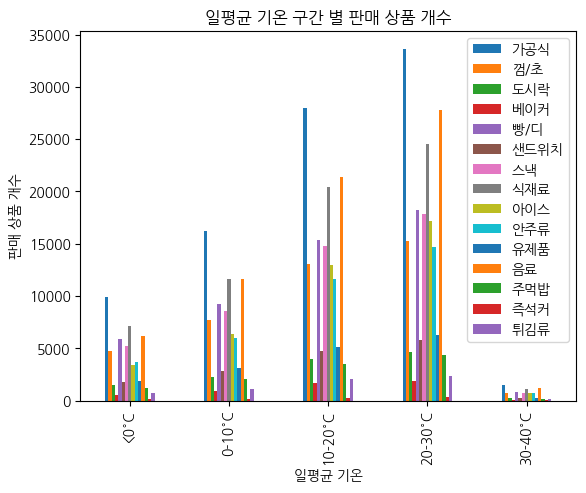

In [25]:
df_temp_cat.T.plot.bar()
plt.xlabel("일평균 기온")
plt.ylabel("판매 상품 개수")
plt.title("일평균 기온 구간 별 판매 상품 개수")

In [15]:
import pandas as pd

# 두 데이터프레임을 병합
merged_df = pd.concat([df_sales_weather, df_sales_itemsNprice_POS], axis=1)


# 온도 구간을 나누기 위한 구간 설정
temp_bins = [-10, 0, 10, 20, 30, 40]  # 임의로 설정한 구간, 필요에 따라 수정 가능
temp_labels = ['<0°C', '0-10°C', '10-20°C', '20-30°C', '30-40°C']

# 온도 구간 추가
merged_df['TempCategory'] = pd.cut(merged_df['TempAvg'], bins=temp_bins, labels=temp_labels)

# 각 온도 구간별로 인기 있는 상위 20개 품목 추출
result = {}
for temp_category in temp_labels:
    temp_df = merged_df[merged_df['TempCategory'] == temp_category]
    popular_items = temp_df['ItemNameMiddle'].value_counts().head(20)
    result[temp_category] = popular_items

# 결과 출력
for temp_category, popular_items in result.items():
    print(f"Temp Category: {temp_category}")
    print(popular_items)
    print('='*50)


Temp Category: <0°C
가공식     9887
식재료     7096
음료      6223
빵/디     5853
스낵      5240
껌/초     4768
안주류     3727
아이스     3407
유제품     1893
샌드위치    1751
도시락     1444
주먹밥     1183
튀김류      700
베이커      563
즉석커      121
Name: ItemNameMiddle, dtype: int64
Temp Category: 0-10°C
가공식     16208
식재료     11633
음료      11606
빵/디      9211
스낵       8595
껌/초      7702
아이스      6406
안주류      5950
유제품      3070
샌드위치     2862
도시락      2263
주먹밥      2093
튀김류      1122
베이커       908
즉석커       169
Name: ItemNameMiddle, dtype: int64
Temp Category: 10-20°C
가공식     27977
음료      21337
식재료     20418
빵/디     15390
스낵      14756
껌/초     13036
아이스     12986
안주류     11629
유제품      5169
샌드위치     4776
도시락      3992
주먹밥      3455
튀김류      2053
베이커      1653
즉석커       286
Name: ItemNameMiddle, dtype: int64
Temp Category: 20-30°C
가공식     33654
음료      27785
식재료     24537
빵/디     18270
스낵      17829
아이스     17158
껌/초     15291
안주류     14691
유제품      6307
샌드위치     5793
도시락      4622
주먹밥      4353
튀김류      2345
베이커      1

## 계절별 잘나가는 음식들

In [2]:
df_sales_2021 = pd.read_csv("../cvs_data/data_result/2021_sales_v3_POS_DATE.csv")
df_sales_2022 = pd.read_csv("../cvs_data/data_result/2022_sales_v3_POS_DATE.csv")
df_sales_itemsNprice_POS = pd.read_csv("../cvs_data/data_result/users_itemsCategory_POS_v2.csv")
df_sales = pd.concat([df_sales_2021, df_sales_2022]).reset_index(drop=True)
df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'] )

df_weather = pd.read_csv("../cvs_data/data_result/weather_v3.csv")
df_weather = df_weather[(df_weather['dateObs_y']==2021 )| (df_weather['dateObs_y']==2022)]

df_weather['dateObs'] = pd.to_datetime(df_weather['dateObs'] )
df_weather = df_weather[['dateObs','TempAvg','classRainfall','discomfortIndex']]
df_weather.columns = ['SalesDate','TempAvg','classRainfall','discomfortIndex']
df_sales_weather = pd.merge(df_sales,df_weather, how='inner',on='SalesDate')

In [20]:
df_sales_2022[(df_sales_2022['ItemNameMiddle']=='즉석커')]['ItemName'].unique()

array(['GET커피블렌딩원두500g', 'GET토피넛라떼파우더', 'GET헤이즐넛향시럽', 'GET허쉬초코카페모카30g',
       'GET즉석바닐라라떼30g', 'GET커피다크블렌드500g', 'GET즉석카페라떼파우더'], dtype=object)

In [3]:
df_sales_weather

,idUser,idPOS,SalesDate,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Price,TempAvg,classRainfall,discomfortIndex
0,U101066,U101066-Y2021M5D31-P10337,2021-05-31,2021,5,31,0,17:19:59,남성,10대,I-8809558848506,L1,간편식사,M1,도시락,샐)허닭케이준닭가슴살,3800,19.9,보통비,전원쾌적
1,U101094,U101094-Y2021M5D31-P10248,2021-05-31,2021,5,31,0,06:19:36,남성,10대,I-8809692952725,L1,간편식사,M2,샌드위치,햄)허니크림치즈상하이,3300,19.9,보통비,전원쾌적
2,U101077,U101077-Y2021M5D31-P10244,2021-05-31,2021,5,31,0,15:47:12,남성,30대,I-8809453265514,L1,간편식사,M2,샌드위치,햄)중화풍유린기버거,3100,19.9,보통비,전원쾌적
3,U101084,U101084-Y2021M5D31-P10233,2021-05-31,2021,5,31,0,20:05:19,남성,30대,I-8809383954557,L1,간편식사,M3,주먹밥,김)두껍다떡갈비김밥,2700,19.9,보통비,전원쾌적
4,U101054,U101054-Y2021M5D31-P10131,2021-05-31,2021,5,31,0,14:06:37,여성,40대,I-8801068403084,L1,간편식사,M2,샌드위치,샌)더블에그파니니,4000,19.9,보통비,전원쾌적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509295,U100982,U100982-Y2022M2D27-P10035,2022-02-27,2022,2,27,6,19:06:40,남성,40대,I-8801115384014,L6,음료,M3,유제품,서울)딸기꿀딴지180ml,1100,3.7,무강수,전원쾌적
509296,U100989,U100989-Y2022M2D27-P10039,2022-02-27,2022,2,27,6,09:03:30,남성,60대이상,I-8808024031015,L6,음료,M2,아이스,22del)스윗아메리카노230,900,3.7,무강수,전원쾌적
509297,U100977,U100977-Y2022M2D27-P10115,2022-02-27,2022,2,27,6,10:08:15,남성,20대,I-8801094502669,L6,음료,M1,음료,코카)크래프트아메P470ml,2500,3.7,무강수,전원쾌적
509298,U101098,U101098-Y2022M2D27-P10023,2022-02-27,2022,2,27,6,16:55:10,남성,30대,I-8801094523206,L6,음료,M1,음료,코카)조지아맥스캔,1200,3.7,무강수,전원쾌적


In [5]:
# 계절 구분을 위한 월 범위 설정
seasons = {
    '봄': [3, 4, 5],
    '여름': [6, 7, 8],
    '가을': [9, 10, 11],
    '겨울': [12, 1, 2]
}

# 계절 정보를 추가하는 함수
def get_season(month):
    for season, months in seasons.items():
        if month in months:
            return season

In [6]:
# 계절 정보 추가
df_sales_weather['Season'] = df_sales_weather['SalesMonth'].apply(get_season)

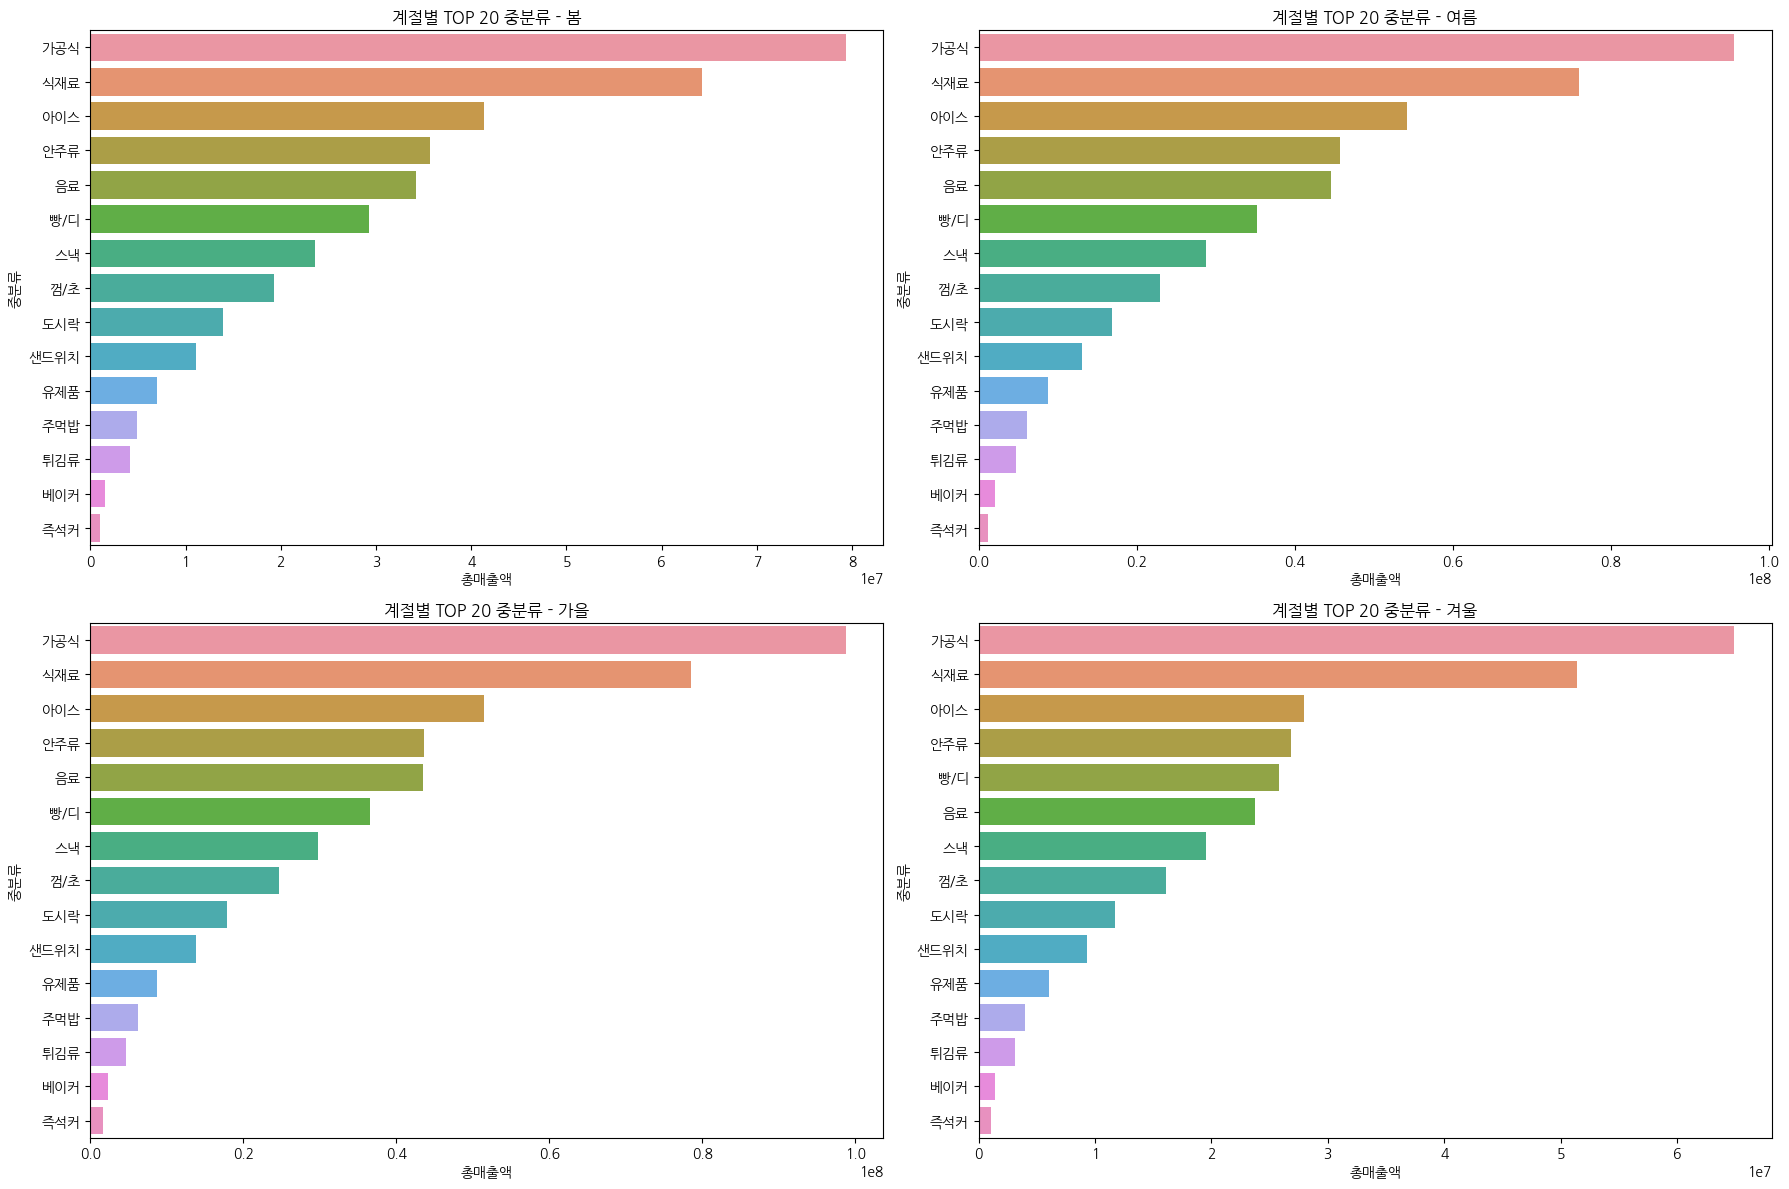

In [7]:
# 중분류(ItemNameMiddle)별 계절별 판매량 계산
seasonal_sales = df_sales_weather.groupby(['Season', 'ItemNameMiddle'])['Price'].sum().reset_index()

# 각 계절에 대한 TOP 20 중분류(ItemNameMiddle) 추출
top_items_by_season = {}
for season in seasons.keys():
    season_df = seasonal_sales[seasonal_sales['Season'] == season]
    top_items = season_df.groupby('ItemNameMiddle')['Price'].sum().nlargest(20)
    top_items_by_season[season] = top_items

# 그래프 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
axes = axes.flatten()

for i, (season, top_items) in enumerate(top_items_by_season.items()):
    ax = axes[i]
    sns.barplot(data=top_items.reset_index(), x='Price', y='ItemNameMiddle', ax=ax)
    ax.set_title(f'계절별 TOP 20 중분류 - {season}')
    ax.set_xlabel('총매출액')
    ax.set_ylabel('중분류')

plt.tight_layout()
plt.show()

In [12]:
seasonal_sales

,Season,ItemNameMiddle,ItemId,Price
0,가을,가공식,I-6933615088641,55000
1,가을,가공식,I-8033638293850,198000
2,가을,가공식,I-8033638293867,214500
3,가을,가공식,I-8801005382854,136800
4,가을,가공식,I-8801005384858,101500
...,...,...,...,...
17183,여름,튀김류,I-8809029031796,45000
17184,여름,튀김류,I-8809219697177,15000
17185,여름,튀김류,I-8809219697184,13500
17186,여름,튀김류,I-8809265024507,26000


In [ ]:
# 중분류(ItemNameMiddle)별 계절별 판매량 계산
df_seasonal_sales = df_sales_weather.groupby(['Season', 'ItemNameMiddle', 'ItemId', 'ItemName'])['Price'].sum().reset_index()
display(df_seasonal_sales)
for nameMid in  df_seasonal_sales['ItemNameMiddle'].unique():
    df_nameMid_season = pd.DataFrame(columns=seasons.keys(), index=['ItemId','ItemName'])
    print("{}의 계절별 BEST items".format(nameMid))
    for i, season in enumerate(seasons.keys()):
        # pass
        # display(
        df_seasonal_items_mid = df_seasonal_sales[(df_seasonal_sales['Season']==season) & (df_seasonal_sales['ItemNameMiddle']==nameMid)].loc[:,'ItemId':'ItemName']
        df_nameMid_season.loc['ItemId', season]=df_seasonal_items_mid.ItemId.values
        df_nameMid_season.loc['ItemName', season]=df_seasonal_items_mid.ItemName.values
        
    display(df_nameMid_season)

In [17]:
df_seasonal_items_mid = df_seasonal_sales[(df_seasonal_sales['Season']=='여름') & (df_seasonal_sales['ItemNameMiddle']=='즉석커')].sort_values(by='Price', ascending=False)
# .loc[:,'ItemName']
df_seasonal_items_mid.ItemName.values[:10]

array(['GET커피다크블렌드500g', 'GET커피블렌딩원두500g', 'GET허쉬초코카페모카30g',
       'GET즉석바닐라라떼30g', 'GET토피넛라떼파우더', 'GET헤이즐넛향시럽', 'GET즉석카페라떼파우더'],
      dtype=object)

In [16]:
df_seasonal_sales['ItemNameMiddle'].unique()

array(['가공식', '껌/초', '도시락', '베이커', '빵/디', '샌드위치', '스낵', '식재료', '아이스',
       '안주류', '유제품', '음료', '주먹밥', '즉석커', '튀김류'], dtype=object)

In [40]:
# 중분류(ItemNameMiddle)별 판매량 계산
df_seasonal_sales = df_sales_weather.groupby([ 'ItemNameMiddle', 'ItemName'])['Price'].count().reset_index()
df_nameMid_season = pd.DataFrame(columns=df_seasonal_sales['ItemNameMiddle'].unique(), index=range(1,top_n+1))
print("중분류별 BEST items")

for nameMid in  df_seasonal_sales['ItemNameMiddle'].unique():
    if df_seasonal_sales[(df_seasonal_sales['ItemNameMiddle']==nameMid)]['ItemName'].nunique()<10:
        top_n = df_seasonal_sales[(df_seasonal_sales['ItemNameMiddle']==nameMid)]['ItemName'].nunique()
        
    else:
        top_n=10
        
    df_seasonal_items_mid = df_seasonal_sales[(df_seasonal_sales['ItemNameMiddle']==nameMid)].sort_values(by='Price', ascending=False).ItemName.values[:top_n]
    df_nameMid_season.loc[:top_n,nameMid] = df_seasonal_items_mid
        
display(df_nameMid_season)


중분류별 BEST items


,가공식,껌/초,도시락,베이커,빵/디,샌드위치,스낵,식재료,아이스,안주류,유제품,음료,주먹밥,즉석커,튀김류
1,CJ)컵반BIG스팸김치덮밥,롯데)목캔디허니민트,샐)아임닭단백질샐러드,즉석빵)피넛버터쿠키,조이)쫀득한마카롱3입,햄)에그불고기치즈버거,롯데)카스타드6입,PSK)씨없는적포도400g,하겐)피넛버터파인트,마니커)핫함에빠진닭다리,서울F&B)하이프로틴초코,티오피)더블랙캔380ml,김)창녕마늘햄유부,GET허쉬초코카페모카30g,튀김)쫄깃매콤닭다리꼬치
2,오뚜기)옛날쌀떡국용기,롯데)가나다크밀크,도)통새우유산슬덮밥,즉석빵)깨찰빵,삼립)콰트로치즈브레드,샌)크랜베리치킨샌드,해태)고향만두칩고기만두,동원)인포켓치즈큐브체다,하겐)프랄린크림파인트,하림)닭가슴블랙페퍼110g,매일)두유99.89팩190ml,가야)알로에농장P340ml,김)백종원반반참치불고기,GET커피다크블렌드500g,튀김)7마리통새우꼬치
3,동원)수라한우쇠고기죽,롯데)가나앙상블휘앙티누,샐)허닭케이준닭가슴살,도너츠)코코넛초코링50g,삼립)구운휘낭시에8입,햄)콰트로타워버거,푸드)라면스낵치킨,PSK)씨없는청포도400g,롯데푸드)떠먹는돼지바,삼립)닭가슴살너비아니바,헬로)또요플레요거트150m,서울F&B)브루빈디카라떼,주)트리플리치참치마요,GET토피넛라떼파우더,튀김)핫찰도그바
4,이가)얼큰굴탕면,오리온)와우블랙레몬,도)THE건강프로틴포크,즉석빵)헤이즐럿파이,삼립)체리초코케익,햄)베이컨토마토에그머핀,씨알)오곡초코땅콩바,H&B)씨없는적포도400g,해태)폴라포스포츠,흥생)반숙계란1입,서울F&B)뽀로로초코우유,HEYROO딸기주스210ml,주)제페토콘참치마요,GET즉석바닐라라떼30g,튀김)오븐구이치킨꼬치
5,HEYROO쫀득한떡볶이짜장,롯데)자일리톨빅팩껌,도)통새우사천짜장덮밥,즉석빵)커브크로와상,프랑)21초월넛깜빠뉴,피자)바게트콤비네이션,HEYROO오리지널버터팝콘N,만인산)매운고추200g,하겐)가나슈파인트,롯데)슬라이스햄사각,남양)딸기에몽드링크,티오피)스윗아메캔275ml,주)참치마요유부밥바,GET즉석카페라떼파우더,튀김)통살지파이
6,HEYROO유산슬비빔면컵,롯데)크런키갈릭브레드,도)고기듬뿍김치제육볶음,즉석빵)쫀득우유찰빵,유라가)연유딸기찰떡꼬치,샌)점보4단햄감자맛살,농심)바나나킥팝콘,씨즈)한컵우유맛,하겐)체리베리파인트,아워홈)매콤바베큐치킨,풀무원)액티비아업복숭아,엠즈)폴바셋돌체라떼330m,주)쿠시마사돈까스마요,GET커피블렌딩원두500g,튀김)그릴바베큐닭다리
7,CJ)숯불향강정매운맛200g,마즈)트윅스탑싱글21g,도)통새우플래터,도너츠)스트로베리도넛80,삼립)빅스위트데니쉬,피)살라미마르게리따피자,동서)오레오화이트크림,대상)요리숙주나물200g,빙그레)끌레도르치즈바,머거본)1일1봉캐슈넛25g,매일)어메징오트언스위트,롯데)트로피애플캔355ml,주)소고기고추장,GET헤이즐넛향시럽,즉석)참숯구이닭꼬치매콤
8,CJ)비비고설렁탕300g,롯데)크런키바돼지바맛,도)자이언트반반닭강정,도너츠)스트로베리필드,푸드)쿠키앤크림크로아상,햄)크림치즈치킨버거,오리온)고소미1200,씨엔)크리스피청포도컵,하겐)크림치즈모찌파인트,썬푸드)슬라이스오징어35,빙그레)바나나우유240ml,광동)유자쌍화병150ml,주)치킨마요삼각김밥,NaN,튀김)닭똥집튀김
9,오뚜기)컵누들매콤소컵,미성)LOL하트캔디,샐)프로틴콩단백볼샐러드,도너츠)딸기마카롱도넛70,쿠키런)상냥한데니쉬,샌)핫비프칠리샌드,롯데)크런키빼빼로1500,뉴푸드)혼합채소오리엔탈,롯데)더블비얀코185ml,머거본)알땅콩캔,매일)셀렉스프로틴초코,빙그레)복숭아아이스티30,김)로제돈까스김밥,NaN,튀김)순살치킨BOX
10,삼양)비빔밀면,마즈)트윅스탑10입,도)동원리챔정식,도너츠)비스마르크도넛80,삼립)래핑카우치즈케익,햄)뉴오리지널치킨버거,오리온)마켓오빵둥이96g,CJ)모닝두부오리엔탈150g,삼우)삼육두유콘,흥생)구운계란2입,푸르밀)설빙인절미라떼25,동원)보성아이스티레몬,주)꿉당코쿠미목살삼각,NaN,튀김)자이언트치킨BOX


In [24]:
# 중분류(ItemNameMiddle)별 계절별 판매량 계산
df_seasonal_sales = df_sales_weather.groupby(['Season', 'ItemNameMiddle', 'ItemName'])['Price'].count().reset_index()
display(df_seasonal_sales)
for nameMid in  df_seasonal_sales['ItemNameMiddle'].unique():
    # df_nameMid_season = pd.DataFrame(columns=seasons.keys(), index=['ItemId','ItemName'])
    if df_seasonal_sales[(df_seasonal_sales['ItemNameMiddle']==nameMid)]['ItemName'].nunique()<10:
        top_n = df_seasonal_sales[(df_seasonal_sales['ItemNameMiddle']==nameMid)]['ItemName'].nunique()
    else:
        top_n=10
        
    df_nameMid_season = pd.DataFrame(columns=seasons.keys(), index=range(1,top_n+1))
    
    
    
        
    print("\n{}의 계절별 BEST items".format(nameMid))
    for i, season in enumerate(seasons.keys()):
        df_seasonal_items_mid = df_seasonal_sales[(df_seasonal_sales['Season']==season) & (df_seasonal_sales['ItemNameMiddle']==nameMid)].sort_values(by='Price', ascending=False)
        # df_nameMid_season.loc['ItemId', season]=df_seasonal_items_mid.ItemId.values
        df_nameMid_season.loc[:,season]=df_seasonal_items_mid.ItemName.values[:top_n]
        
    display(df_nameMid_season)

,Season,ItemNameMiddle,ItemName,Price
0,가을,가공식,CJ)가쓰오우동2인분,39
1,가을,가공식,CJ)가쓰오우동컵,38
2,가을,가공식,CJ)고기수제만두200g,47
3,가을,가공식,CJ)고메고추크런치180g,33
4,가을,가공식,CJ)고메모짜돈카츠450g,38
...,...,...,...,...
17143,여름,튀김류,튀김)후라이드치킨,27
17144,여름,튀김류,튀김)휴게소소시지바,25
17145,여름,튀김류,튀김)휴게소소시지어묵바,22
17146,여름,튀김류,튀김)휴게소치즈어묵바,23



가공식의 계절별 BEST items


,봄,여름,가을,겨울
1,CJ)컵반BIG스팸김치덮밥,CJ)컵반BIG스팸김치덮밥,CJ)컵반BIG스팸김치덮밥,CJ)컵반BIG스팸김치덮밥
2,채선당)매운버섯칼국수컵,푸드)중화식짜장볶음밥,삼립)오븐피자고로케,오뚜기)옛날쌀떡국용기
3,이가)얼큰굴탕면,태경)돼지김치찜용기,오뚜기)컵밥제육덮밥,삼양)불닭볶음면컵
4,해태)샤오롱고향만두180g,오뚜기)옛날쌀떡국용기,뉴트리)비비랩콜라겐3입,우양)점보빅핫도그
5,CJ)햇반발아현미밥210g,CJ)고메치즈함박스테이크,동원)수라한우쇠고기죽,오뚜기)참깨라면
6,CJ)비비고설렁탕300g,롯데)마시는오트밀단백질,오뚜기)진라면매운맛,태경)마늘닭볶음탕용기
7,오뚜기)한우미역국500g,푸드)떡볶이소스볶음밥,롯데)마시는오트밀우리쌀,HEYROO유산슬비빔면컵
8,신)베이컨하와이안피자,HEYROO컵두부된장국,풀무원)홍게살콘샐러드,아워홈)해물짬뽕떡볶이
9,시저)불고기맛통조림,HEYROO크래미아샐러드,프레)식객부대찌개280g,삼양)고기한입찐만두168g
10,한일)서울김치우동컵,푸드)바질앤토마토피자,오뚜기)육개장사발면,푸드)매콤불고기덮밥



껌/초의 계절별 BEST items


,봄,여름,가을,겨울
1,오리온)와우블랙레몬,롯데)핵짱셔요콜라,나무)카스텔크램레몬캔디,마즈)엠앤엠블록밀크
2,롯데)목캔디허니민트,롯데)가나다크밀크,롯데)크런키바돼지바맛,농심)츄파춥스서프라이즈
3,마즈)스니커즈헤이즐넛,롯데)크런키갈릭브레드,서영)홀스블루베리,롯데)자일리톨샤인머스캣
4,삼경)하리보스퀴시80g,롯데)자일리톨빅팩껌,롯데)츄러스쫀득이,롯데)허쉬쿠앤크초콜릿
5,롯데)애니타임민트망고10,롯데)목캔디허니민트,오리온)꼬물탱62g,롯데)후라보노오리지널
6,SCD)수수깡젤리트로피칼,마즈)트윅스탑싱글21g,씨믹)핑크퐁아기상어젤리,서영)오레오에그31g
7,삼경)하리보웜즈,몰티져스밀크37g,푸드)비달유니콘롤19g,SCD)비달메가줌페인터캔
8,크라운)초하스화이트,나무)수박모양젤리,델리팜)로아커스트라치아,롯데)가나앙상블휘앙티누
9,농심)웰치스후르트젤리,삼광)프로틴볼스,오리온)더자일리톨용기껌,나무)연애고사초콜릿
10,크라운)디샤민트스타38g,삼경)하리보피코발라,미성)LOL하트캔디,마즈)트윅스쿠키4바



도시락의 계절별 BEST items


,봄,여름,가을,겨울
1,면)파마산크림치즈파스타,도)자이언트반반닭강정,도)고기듬뿍김치제육볶음,샐)탄단지훈제목살
2,도)통새우유산슬덮밥,도)THE건강프로틴포크,샐)닭가슴살샐러드170,샐)로제치킨미니샐러드
3,도)채식장조림비빔밥,면)나폴리탄파스타,면)채식두유크림파스타,샐)아임닭단백질샐러드
4,도)THE건강프로틴포크,도)통새우플래터,도)자이언트반반닭강정,도)빼어날수반상
5,도)오늘은치킨이닭,샐)허닭훈제닭가슴살,도)통새우유산슬덮밥,도)채식주의샐러드볼
6,도)가정식반찬4종SET,샐)허닭케이준닭가슴살,도)자이언트매콤닭강정,도)THE건강프로틴포크
7,도)통새우사천짜장덮밥,도)비빔밥나물4종SET,도)자이언트달콤닭강정,도)남도조기한상
8,도)스팸치킨모둠도시락,도)THE건강프로틴오리,도)비프칠리프라이,NCT)HOT양념치킨
9,샐)로제치킨미니샐러드,도)빽햄스페셜정식,도)남도떡갈비정식,샐)아임웰푸짐하오리
10,도)해표옥수수비빔밥,샐)허닭오리지널닭가슴살,편스)만두감바스,샐)에그가먼저닭샐러드



베이커의 계절별 BEST items


,봄,여름,가을,겨울
1,즉석빵)깨찰빵,도너츠)블루베리머핀130g,즉석빵)헤이즐럿파이,즉석빵)고구마빵
2,즉석빵)피넛버터쿠키,도너츠)코코넛초코링50g,즉석빵)커브크로와상,도너츠)딸기링도넛70g
3,도너츠)스트로베리필드,도너츠)스트로베리필드,즉석빵)피넛버터쿠키,즉석빵)깨찰빵
4,도너츠)비스마르크,즉석빵)시나몬롤,도너츠)비스마르크,도너츠)초코마카롱도넛70
5,도너츠)스트로베리도넛80,즉석빵)스위트크런치,도너츠)코코넛초코링50g,즉석빵)피넛버터쿠키
6,즉석빵)햄패스트리,즉석빵)마늘바게트볼,즉석빵)크림빵,도너츠)비스마르크도넛80
7,즉석빵)아메리칸치즈쿠키,즉석빵)쫀득호떡찰빵,즉석빵)찹쌀떡패스트리,도너츠)스트로베리도넛80
8,즉석빵)찹쌀떡패스트리,즉석빵)아메리칸초코쿠키,즉석빵)쫀득우유찰빵,즉석빵)듬뿍딸기크림빵
9,즉석빵)고구마슈크림,즉석빵)깨찰빵,피자)비프스테이크피자,즉석빵)헤이즐럿파이
10,도너츠)딸기마카롱도넛70,피자)비프스테이크피자,즉석빵)스위트크런치,즉석빵)아메리칸초코쿠키



빵/디의 계절별 BEST items


,봄,여름,가을,겨울
1,조이)쫀득한마카롱3입,조이)쫀득한마카롱3입,조이)쫀득한마카롱3입,조이)쫀득한마카롱3입
2,롯데)미니딸기샌드,삼립)미니언즈바나나롤,삼립)크림치즈휘낭시에8,삼립)초코블랑
3,참조은)쫀득롤케익복숭아,실속)2000버터크로와상6,오리온)할로윈초코파이,징코)오징어먹물달고나빵
4,푸드)뜯어먹는밤빵,삼립)쑥쓰러운찰떡쿠키,아워홈)쁘띠샌드트리오6,에프비)비타엔젤자몽푸딩
5,쿠키런)상냥한데니쉬,삼립)체리초코케익,CJ)쁘띠첼밀감컵,프랑)몽블랑데니쉬
6,롯데)초코푸딩바나나,대두)양갱상점스위트,삼립)더블미니파운드,삼립)래핑카우치즈케익
7,연세)우유생크림빵,푸드)메론농장크림빵,삼립)흑당소보루,조이)파르페팥빙케익
8,삼립)정통보름달,삼립)든든왕만쥬,푸드)초코반달케이크,삼립)미니약과
9,징코)폭신크림카스테라,피오레)청포도타르트,유라가)앙버터쑥떡,피오레)쿠키티라미수
10,삼립)김토끼초코보름달,삼립)감자인줄,삼립)카카오파운드6입,삼립미각)이즈니버터식빵



샌드위치의 계절별 BEST items


,봄,여름,가을,겨울
1,햄)에그불고기치즈버거,샌)크랜베리치킨샌드,햄)콰트로타워버거,햄)콰트로타워버거
2,샌)크랜베리치킨샌드,햄)에그불고기치즈버거,햄)에그불고기치즈버거,샌)크랜베리치킨샌드
3,햄)콰트로타워버거,햄)콰트로타워버거,샌)크랜베리치킨샌드,햄)에그불고기치즈버거
4,샌)핫비프칠리샌드,햄)뉴오리지널치킨버거,피)살라미마르게리따피자,햄)피자빵빵버거
5,햄)칠리통새우버거,피자)바게트콤비네이션,햄)베이컨토마토에그머핀,햄)내슈빌핫치킨버거
6,햄)럭키치킨버거,샌)어서와김치샌드위치,햄)중화풍유린기버거,햄)크림치즈치킨버거
7,샌)점보4단햄감자맛살,햄)백종원추억의햄버거,샌)동원고추참치샌드,샌)이건가요치즈맛살
8,햄)월도프더블스테이크,햄)롱롱불고기버거,샌)햄크로와상샌드위치,피)오리지널마르게리피자
9,샌)더블치즈파니니,샌)크랜베리치킨샌드(PLA,샌)햄이꽉찬샌드위치,샌)통밀베이컨샌드
10,햄)맥시멈3단버거,햄)마늘간장가마로버거,지지)자이언트피자치킨,샌)이건가요샌드위치



스낵의 계절별 BEST items


,봄,여름,가을,겨울
1,롯데)카스타드6입,롯데)카스타드6입,롯데)카스타드6입,롯데)카스타드6입
2,HEYROO작은별딸기스낵N,동서)오레오민트초코,동서)오레오화이트크림,HEYROO초코칩쿠키N
3,롯데)ABC초코쿠키핑크베,매크로)자케미니브라우니,롯데)칸쵸54g,오리온)포카칩지퍼백
4,켈로그)첵스초코,크라운)참쌀설병,해태)오예스피넛버터,농심)양파링84g
5,켈로그)첵스바오리지날25,크라운)쿠크다스128g,해태)크림웨하스,프링글스)할라피뇨110g
6,푸드)라면스낵치킨,오리온)고래밥초코범벅,오리온)포카칩오리지널13,헬로)반두아코코넛델리
7,해태)딸기웨하스900,로아카)에스프레소110g,롯데)쌀로새진짜새우65g,해태)고향만두칩고기만두
8,동서)오레오웨하스초코,해태)티라미수홈런볼46g,프링글스)오리지널110g,매크)더치와플오리지널
9,프링글스)크리미쉬림프11,크라운)꽃게랑,큐피트)꾀돌이48g,HEYROO콘칩매콤달콤한맛
10,농심)조청유과96g,큐피트)쿠키런초코칩쿠키,켈로그)첵스팥맛350g,미성)미니허쉬쿠키



식재료의 계절별 BEST items


,봄,여름,가을,겨울
1,동원)인포켓치즈큐브체다,PSK)씨없는적포도400g,PSK)씨없는청포도400g,PSK)씨없는적포도400g
2,PSK)씨없는적포도400g,동원)인포켓치즈큐브체다,PSK)씨없는적포도400g,PSK)씨없는청포도400g
3,H&B)씨없는적포도400g,PSK)씨없는청포도400g,동원)인포켓치즈큐브체다,H&B)씨없는적포도400g
4,PSK)씨없는청포도400g,H&B)씨없는적포도400g,H&B)씨없는적포도400g,동원)인포켓치즈큐브체다
5,해표)들기름볶음김치120g,씨즈)한컵우유맛,조인)특란10입,동원)지중해황도410g
6,해성)대추방토500g,동원)양반구운김밥김,만인산)매운고추200g,뉴푸드)혼합채소오리엔탈
7,빙그레)통모짜스트링치즈,CJ)프락토올리고당700g,녹차원)차전자피7T,CJ)스팸340g
8,CJ)해찬들초고추장170g,씨엔)블루베리100g,오뚜기)중면500g,CJ)국산꽃소금200g
9,CJ)비비고배추김치200g,씨엔)크리스피청포도컵,행복)계란말이플레인150g,PSK)아보카도2입
10,제니코)치즈파티모짜렐라,동서)맥심슈프림골드20T,씨즈)한컵우유맛,삼양)불닭소스200g



아이스의 계절별 BEST items


,봄,여름,가을,겨울
1,delaffe깔라만시아이스,삼우)삼육두유콘,벤앤제리)쿠키도우파인트,빙그레)녹차붕어싸만코
2,해태)쌍쌍바,해태)배뱀배,하겐)벨지안헤이즐넛바,하겐)피넛버터파인트
3,IEK)시나몬크런치파인트,나뚜루)녹차미니컵,하겐)마카다미아미니컵,하겐)프랄린크림파인트
4,빙그레)끌레피스타치오바,롯데푸드)빵빠레샌드,빙그레)끌레도르치즈바,롯데)스크류바
5,해태)제주용암수아이스,하겐)체리베리파인트,본젤라또치즈베리콘,하겐)바닐라미니컵
6,HEYROO파르페딸기,롯데)칸타타스윗아메리23,하겐)마카브리틀파인트,하겐)카푸치노미니컵
7,로투스)마끼아또바,롯데푸드)구름꿀컵,나뚜루)화이트샤이닝스타,엠즈)폴바셋밀크미니컵
8,빙그레)투게더미니어처,해태)제주용암수바,해태)폴라포포도,빙그레)끌레도르쿠키초코
9,해태)폴라포스포츠,빙그레)떡붕어싸만코,해태)부라보바닐라콘,롯데)찰떡아이스초코
10,에스카)21%더블리치파인,하겐)프로즌요거트미니컵,빙그레)엑설런트콘,허쉬)스쿱초코아이스크림



안주류의 계절별 BEST items


,봄,여름,가을,겨울
1,바이오)비건육포40g,마니커)핫함에빠진닭다리,머거본)1일1봉캐슈넛25g,마니커)바사삭한마리500g
2,테일러)건자두50g,썬푸드)오잉40g,썬푸드)슬라이스오징어35,정화)리얼바다오징어60g
3,세양)구운란2입,신화)어포튀각80g,정화)노래방구이구이150g,하림)닭가슴살갈릭110g
4,CJ)맥스봉꼬치바청양90g,흥생)구운계란2입,보승)매운불껍데기,하림)매콤한무뼈닭발
5,고래사)야채어묵바65g,정화)대패왕다리오징어33,롯데)의성마늘핫바2입,하림)1등급닭가슴살
6,삼립)닭가슴살너비아니바,CJ)구이한판그릴스모크60,동원)친친오리지널봉70g,하림)닭소시지훈제120g
7,동원)양반김부각오리지널,썬푸드)문어맛오징어17g,샘표)질러직화육포45g,선명)멸치아몬드봉지
8,선명)하루견과옐로우20g,흥생)반숙계란1입,해드림)통고기순대파우치,한양)숏다리20g
9,길림)마늘빵아몬드40g,정화)실속쥐포8마리75g,동원)트러플델리햄260g,풀무원)동물복지촉촉란2
10,선명)멸치아몬드봉지,CJ)맥스봉꼬치바청양90g,하림)닭가슴블랙페퍼110g,삼립)싱가폴BBQ육포45g



유제품의 계절별 BEST items


,봄,여름,가을,겨울
1,빙그레)요플레토핑초코,남양)맛있는우유900ml,매일)셀렉스프로틴복숭아,푸르밀)블랙보리우유300
2,서울F&B)뽀로로초코우유,서울F&B)브라운슈가라떼,헬로)또요플레요거트150m,매일)흰우유900ml
3,풀무원)액티비아업복숭아,서울)흰우유300ml,푸르밀)설빙흑임자라떼25,남양)맛있는우유초코300m
4,다논)그릭요거트95g,서울F&B)하이프로틴초코,남양)딸기에몽드링크,빙그레)바나나우유240ml
5,빙그레)딸기맛우유240ml,비알)배스킨라빈스민트초,빙그레)밀크티맛단지,서울)살롱밀크티300ml
6,푸르밀)설빙인절미라떼25,빙그레)우유얌피스타치오,동원)그린덴마크귀리190m,서울)비요뜨링크
7,동원)로얄밀크티250ml,매일)어메징오트언스위트,서울F&B)어몽어초코우유,동원)덴마크드링샤인머스
8,동원)케어베어허니그레이,서울)커피300ml,서울F&B)뽀로로초코우유,서울)너티초코우유300
9,동원)케어베어레몬바나나,동원)밀크T요구복숭아,매일)두유99.89팩190ml,동원)그린덴마크귀리190m
10,매일)바이오드링킹블루,동원)쿨피스자두930ml,서울)딸기꿀딴지180ml,푸르밀)달고나라떼250ml



음료의 계절별 BEST items


,봄,여름,가을,겨울
1,광동)유자쌍화병150ml,동원)오리진아메리카300m,서울F&B)브루빈디카라떼,매일)두유검은콩팩190ml
2,농심)카프리사파리200ml,티오피)스윗아메캔275ml,엠즈)폴바셋돌체라떼330m,롯데)델몬트오렌지400ml
3,동아)오란씨파인애플캔25,롯데)더하다보리차P500ml,랩노쉬)드링크감자카라멜,롯데)트로피애플캔355ml
4,웅진)자연은납작복숭아34,정관장)테이크5망고키위,웅진)꿀초록매실병180ml,삼립)티트라레몬티P500ml
5,롯데)핫식스자몽캔250ml,티오피)더블랙캔380ml,쟈뎅)디카페인블랙1.1L,롯데)레쓰비캔
6,롯데)게토레이오렌지600m,코카)코카콜라스페셜캔25,광동)비타500피지라임캔,매일)바리스타아메P475ml
7,빙그레)복숭아아이스티30,빙그레)스페셜티컵카라멜,HK)헛개수이엑스P500ml,팔도)뽀로로사과235ml
8,엠즈)폴바셋돌체라떼330m,서울)강릉커피라떼250ml,매일)바리스타에스프레소,롯데)게토레이블루P600ml
9,모구모구)리치젤리320ml,정관장)활기력20ml,코카)코카콜라제로캔355,HEYROO오렌지주스270ml
10,매일)바리스타민트라임32,빙그레)아카페라UP아메35,가야)알로에농장P340ml,HEYROO딸기주스210ml



주먹밥의 계절별 BEST items


,봄,여름,가을,겨울
1,주)2XL닭갈비볶음밥,주)리치전주비빔1,김)창녕마늘햄유부,주)쿠시마사돈까스마요
2,주)소고기고추장,주)폭탄전주비빔Ball,주)간장&매콤직화고기,NCT)HOT돈까스김밥
3,주)파이팅이닭,주)참치마요유부밥바,주)치킨마요삼각김밥,주)2XL베이컨참치마요
4,김)확실한참치김밥,김)포항시금치계란유부,주)스팸참치마요밥바,주)햄참치마요
5,주)토핑2배전주비빔,주)고생많았소,NCT)HOT돈까스김밥,주)고소참치&매콤비빔
6,김)리챔참치마요김밥,주)제페토콘참치마요,김)로제돈까스김밥,김)백종원반반참치불고기
7,주)리치참치비빔,주)트리플리치참치마요,주)빽햄김치볶음,김)채식마요김밥
8,주)2XL참치마요,김)백종원열탄불고기김밥,김)참치불고기반반김밥,주)트리플리치참치마요
9,김)백종원반반참치불고기,주)소고기고추장,주)빽햄데리마요밥바,김)참치가득유부초밥
10,주)참치마요유부밥바,주)참치마요밥바1,주)리치참치비빔,김)확실한불고기김밥



즉석커의 계절별 BEST items


,봄,여름,가을,겨울
1,GET헤이즐넛향시럽,GET허쉬초코카페모카30g,GET커피다크블렌드500g,GET허쉬초코카페모카30g
2,GET즉석바닐라라떼30g,GET즉석바닐라라떼30g,GET토피넛라떼파우더,GET커피다크블렌드500g
3,GET즉석카페라떼파우더,GET헤이즐넛향시럽,GET커피블렌딩원두500g,GET즉석카페라떼파우더
4,GET커피블렌딩원두500g,GET커피다크블렌드500g,GET허쉬초코카페모카30g,GET커피블렌딩원두500g
5,GET토피넛라떼파우더,GET즉석카페라떼파우더,GET즉석바닐라라떼30g,GET토피넛라떼파우더
6,GET커피다크블렌드500g,GET토피넛라떼파우더,GET헤이즐넛향시럽,GET헤이즐넛향시럽
7,GET허쉬초코카페모카30g,GET커피블렌딩원두500g,GET즉석카페라떼파우더,GET즉석바닐라라떼30g



튀김류의 계절별 BEST items


,봄,여름,가을,겨울
1,튀김)후라이드치킨,튀김)핫찰도그바,튀김)7마리통새우꼬치,즉석)참숯구이닭꼬치
2,튀김)쫄깃매콤닭다리꼬치,튀김)닭똥집튀김,오뎅)삼진모듬꼬치어묵,튀김)휴게소치즈어묵바
3,튀김)7마리통새우꼬치,튀김)오븐구이치킨꼬치,튀김)바삭매콤순살꼬치,튀김)통살지파이
4,튀김)18cm통김말이튀김,즉석)참숯구이닭꼬치매콤,튀김)쫄깃매콤닭다리꼬치,튀김)갈릭디핑소스
5,튀김)자이언트치킨BOX,튀김)순살치킨매콤꼬치,오뎅)고래사사각어묵,튀김)순살치킨꼬치
6,튀김)핫찰도그바,튀김)텐더스틱3입,튀김)치킨카츠꼬치,튀김)닭똥집튀김
7,튀김)그릴바베큐닭다리,튀김)치즈순살넓적다리,튀김)휴게소소시지어묵바,튀김)삼복치킨
8,튀김)휴게소소시지어묵바,튀김)양념치킨소스,튀김)통살지파이,튀김)버팔로봉봉스틱
9,오뎅)고래사사각어묵,튀김)휴게소핫도그,튀김)그릴바베큐닭다리,튀김)오븐구이치킨꼬치
10,오뎅)미도사각꼬치어묵,튀김)넓적다리,즉석)참숯구이닭꼬치매콤,튀김)텐더스틱3입


In [55]:
months = {'1' : [1] ,'2' : [2],
'3' : [3],'4' : [4], '5' : [5],'6' : [6],
'7' : [7],'8' : [8], '9' : [9],'10' : [10],
'11' : [11] ,'12' : [12]  }

# 중분류(ItemNameMiddle)별 계절별 판매량 계산
df_seasonal_sales = df_sales_weather.groupby(['SalesMonth', 'ItemNameMiddle', 'ItemName'])['Price'].count().reset_index()
# display(df_seasonal_sales)
for nameMid in  df_seasonal_sales['ItemNameMiddle'].unique():
    # df_nameMid_season = pd.DataFrame(columns=month.keys(), index=['ItemId','ItemName'])
    if df_seasonal_sales[(df_seasonal_sales['ItemNameMiddle']==nameMid)]['ItemName'].nunique()<10:
        top_n = df_seasonal_sales[(df_seasonal_sales['ItemNameMiddle']==nameMid)]['ItemName'].nunique()
    else:
        top_n=10
        
    df_nameMid_season = pd.DataFrame(columns=[month+"월"for month in months.keys()], index=range(1,top_n+1))
    
    print("\n{}의 월별 BEST items".format(nameMid))
    for i, month in enumerate(months.keys()):
        df_seasonal_items_mid = df_seasonal_sales[(df_seasonal_sales['SalesMonth']==int(month)) & (df_seasonal_sales['ItemNameMiddle']==nameMid)].sort_values(by='Price', ascending=False)
        # df_nameMid_season.loc['ItemId', season]=df_seasonal_items_mid.ItemId.values
        df_nameMid_season.loc[:,month+"월"]=df_seasonal_items_mid.ItemName.values[:top_n]
        # display(df_seasonal_items_mid.ItemName.values[:top_n])
        
    display(df_nameMid_season)
# df_nameMid_season


가공식의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,오뚜기)우노피자콤비,CJ)컵반BIG스팸김치덮밥,CJ)컵반BIG스팸김치덮밥,아워홈)해물짬뽕떡볶이,CJ)컵반BIG스팸김치덮밥,CJ)컵반BIG스팸김치덮밥,푸드)떡볶이소스볶음밥,대상)안주야껍데기160g,CJ)컵반BIG스팸김치덮밥,CJ)컵반BIG스팸김치덮밥,삼립)오븐피자고로케,CJ)컵반BIG스팸김치덮밥
2,웰팜)감자합니다,대상)사천깐풍뿌렸닭200g,해태)샤오롱고향만두180g,사세)콰트로치즈치킨칩,한일)서울김치우동컵,CJ)컵반볶은김치덮밥,웰팜)감자합니다,HEYROO유산슬비빔면컵,프레)감바스알아히요,하이)돼지불막창300g,하림)더미식장인라면담백,뉴자이언트)라볶이
3,하이)냉동이베리코목심,동원)양반영양닭죽,이가)마라훠궈홍탕면,샘표)밥도둑메추리장조림,롯데)까르보나라스파게티,농심)카구리컵,편스)알로하쿵팟퐁커리2,삼양)까르보불닭큰컵,CJ)비비고설렁탕300g,롯데)마시는오트밀우리쌀,CJ)컵반BIG스팸김치덮밥,HEYROO유산슬비빔면컵
4,NCT)HOT비빔우동,HEYROO계란국,CJ)비비고배추김치용기50,푸드)떡볶이소스볶음밥,CJ)비비고설렁탕300g,롯데)마시는오트밀단백질,디엔비)모짜치즈고로케,롯데)김치롤만두180g,이가)얼큰굴탕면,삼립)쇠고기버섯죽,하림)모짜렐라치즈볼140G,오뚜기)참깨라면
5,농심)새우깡국물라볶이,태경)마늘닭볶음탕용기,HEYROO제주마늘라면컵,디엔비)매점고로케햄치즈,농심)육개장큰사발컵,오뚜기)옛날쌀떡국용기,농심)칼빔면,우양)강원찰옥수수크림볼,오뚜기)컵밥제육덮밥,푸드)궁물즈짜장볶이,프레)시카고스테이크230g,팔도)팔도비빔면
6,오뚜기)옛날쌀떡국용기,삼양)불닭볶음면컵,MDS)불로제베이컨파스타,삼양)로제불닭납작당면,이가)얼큰굴탕면,태경)돼지김치찜용기,오뚜기)맛있는흑미밥210g,편스)바질라면,롯데)김치롤만두180g,동원)양반전복죽,농심)보노콘컵스프,오뚜기)컵밥참치마요덮밥
7,디엔비)점보피자빵고구마,프레)피에스타스테이크,오뚜기)진라면매운컵,대상)사천깐풍뿌렸닭200g,풀무원)얇은피고기교자42,삼양)삼양라면소컵,오뚜기)짜슐랭,농심)프로틴쉐이크미숫,풀무원)얇은피김치160g,뉴트리)비비랩콜라겐3입,HJF)야채닭갈비150g,오뚜기)열려라참깨라면컵
8,하림)고향삼계탕800g,HEYROO크래미아샐러드,키다리)세이면북엇국수컵,MDS)투움바파스타,프레)박막례치즈떡볶이,롯데)까르보나라스파게티,CJ)컵반BIG스팸김치덮밥,CJ)비비고닭백숙죽용기,우양)강원찰옥수수크림볼,동원)양반영양닭죽,오뚜기)새우볶음밥230g,태경)마늘닭볶음탕용기
9,동원)베이컨감자차우더,CJ)고메함박스테이크200g,한맥)포켓치킨데리야끼맛,CJ)컵반BIG치킨마요덮밥,동원)쌀떡국용기,HEYROO쫀득한떡볶이짜장,푸드)중화식짜장볶음밥,뉴자이언트)라볶이,뉴자이언트)라볶이,오뚜기)오감칠리소시지,동원)수라한우쇠고기죽,오뚜기)컵밥톡톡김치알밥
10,오뚜기)꽃게랑면컵,CJ)비비고육개장300g,우양)점보꼬꼬모짜핫도그,오뚜기)맛있는밥6입,삼양)삼양비빔면,태경)우거지뼈해장국,이가)마라훠궈백탕면,오뚜기)컵밥XO게살덮밥,풀무원)홍게살콘샐러드,팔도)김치왕뚜껑왕컵,편스)복돼지면,푸드)매콤불고기덮밥



껌/초의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,마즈)트윅스쿠키4바,롯데)허쉬밀크초콜릿,오리온)와우블랙레몬,코코)브레드튜브껌25g,매일)페레로로쉐5구,롯데)핵짱셔요콜라,몰티져스밀크37g,롯데)아이스브레이커포도,나무)카스텔크램레몬캔디,오리온)와우블랙레몬,오리온)닥터유구미콜라겐,롯데)ABC밀크초콜릿72g
2,롯데)후라보노오리지널,나무)연애고사초콜릿,삼경)하리보프리마베라80,해태)연양갱,롯데)목캔디허니민트,롯데)자일리톨빅팩껌,롯데)가나다크밀크,롯데)목캔디허니민트,서영)홀스자몽34g,농심)후르트민트그레이프,롯데)애니타임민트망고10,주사위팝33g
3,삼광)아몬드바크씬,해태)티피오리지날,예스)젤리벨리풍선껌향,농심)린도볼밀크3P,마즈)스니커즈헤이즐넛,롯데)허쉬초코튜브,미성)바비카메라캔디,크라운)초하스화이트,매크로)하이츄사워레몬맛,오리온)꼬물탱62g,큐피트)달고나게임60g,오리온)유칼립톨캔디30g
4,마즈)엠앤엠블록밀크,네슬)프루팁스오리지널30,마즈)트윅스미니초콜릿,해태)아카시아껌1000,코코)브레드머랭젤리밀크,크라운)붐붐웨이퍼바32g,롯데)왓따판박이껌,네슬레)킷캣청키프룻,코코)브레드자판기캔디,롯데)목캔디허니민트,나무)톡젤리복숭아맛,삼경)하리보봄에디션80g
5,삼경)하리보다이노스,롯데)가나앙상블휘앙티누,롯데)ID자일리톨화이트껌,마즈)스니커즈헤이즐넛,매일)킨더부에노화이트,삼경)하리보자몽맛,서주)왕수박알젤리40g,삼경)하리보다이노스,네슬레)킷캣청키팝콘,나무)동물캔디건,롯데)크런키바돼지바맛,해태)자유시간아몬드36g
6,서영)오레오에그31g,미성)실카크리스피,롯데)왓따콜라풍선껌,삼경)하리보스퀴시80g,삼경)하리보스윗사워베어,삼경)흔한남매톡젤리,일신)하리보메가룰렛,롯데)크런키바돼지바맛,미성)LOL하트캔디,씨믹)핑크퐁아기상어젤리,일신)하리보사우어룰렛,롯데)허쉬쿠앤크초콜릿
7,코코)브레드머랭젤리밀크,농심)후르트민트그레이프,오리온)톡핑헤이즐넛,일신)베이비팝스윗사우어,롯데)애니타임민트망고10,삼광)프로틴볼스,일신)이메이초코딸기구미,오리온)왕꿈틀이젤리1000,미성)LOL헤어피스캔디8g,롯데)후라보노오리지널,크라운)새콤달콤레모네이,SCD)비달메가줌페인터캔
8,롯데)자일리톨퍼플스타16,농심)츄파춥스서프라이즈,마즈)트윅스탑10입,마즈)스니커즈다크,롯데)밀크카라멜50g,롯데)버블껌위드젤리잼,롯데)크런키갈릭브레드,마즈)이클립스페퍼민트,예스)트롤리베리향구미,오리온)닥터유클린껌,롯데)허쉬오버로드,롯데)말랑이유산균요거트
9,롯데)자일리톨빅팩껌,미성)LOL하트캔디,크라운)새콤달콤블루소다,크라운)땅콩카라멜봉지,미성)슬랩스캔디그린애플,SCD)UFO캔디10g,푸쉬팝캔디,크라운)신년캔디주머니,오리온)꼬물탱62g,일신)하리보메가룰렛,델리팜)로아커스트라치아,푸드)비달유니콘롤19g
10,롯데)왓따콜라풍선껌,삼경)하리보피치스,롯데)허쉬미니쿠키민트13,롯데)츄러스쫀득이,롯데)키세스밀크52g,나무)댕냥이발바닥캔디,네슬레)킷캣미니45g,리얼딸기초코볼,농심)후르트텔라오렌지,해태)자유시간아몬드36g,롯데)키세스밀크52g,예스)트롤리미니버거10g



도시락의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,도)해표옥수수비빔밥,샐)탄단지훈제목살,도)통새우사천짜장덮밥,면)파마산크림치즈파스타,도)해표옥수수비빔밥,도)강력추천8찬정식,샐)프로틴치킨에그볼,샐)허닭케이준닭가슴살,간편)베이컨피자떡볶이,도)자이언트반반닭강정,도)고기듬뿍김치제육볶음,샐)더블닭가슴살샐러드
2,NCT)HOT양념치킨,도)채식주의샐러드볼,도)채식장조림비빔밥,도)동원리챔정식,도)통새우커리덮밥,편스)만두감바스,샐)허닭훈제닭가슴살,샐)스프링리코타샐러드,편스)만두감바스,면)파마산크림치즈파스타,도)가라아게불닭덮밥,샐)탄단지허브치킨
3,샐)아임닭단백질샐러드,샐)로제치킨미니샐러드,도)THE건강프로틴포크,도)모두의급식간장불고기,샐)로제치킨미니샐러드,도)빽햄스페셜정식,도)가라아게불닭덮밥,도)자이언트반반닭강정,도)모두의급식김치삼겹,면)채식두유크림파스타,도)남도떡갈비정식,샐)로제치킨미니샐러드
4,도)백종원청양어묵덮밥,도)고기듬뿍김치제육볶음,도)반반치킨,도)최애7찬,도)통새우유산슬덮밥,도)브레드쏘야도시락,주)롤유부초밥플래터,도)칭따오엔치킨박스,김)떡튀순어묵탕SET,도)백종원열탄불고기,샐)뉴오세득스파이시치킨,샐)탄단지훈제목살
5,도)반반치킨,도)제육고기쌈,샐)허닭오리지널닭가슴살,도)오늘은치킨이닭,도)백종원소시지김치덮밥,샐)아임닭단백질샐러드,도)제육고기쌈,도)뉴치킨정식,샐)탄단지허브치킨,도)칭따오엔치킨박스,도)자이언트달콤닭강정,샐)아임웰푸짐하오리
6,도)자이언트달콤닭강정,샐)프로틴치즈소시지볼,샐)프로틴치킨에그볼,샐)프로틴치킨에그볼,샐)뉴오세득스파이시치킨,도)비빔밥나물4종SET,김)떡튀순어묵탕SET,도)THE건강프로틴오리,샐)갈릭감바스샐러드,도)최애7찬,도)고기듬뿍불고기백반,도)통새우플래터
7,도)빼어날수반상,도)남도조기한상,도)브레드쏘야도시락,도)고기듬뿍불고기백반,도)THE건강프로틴오리,NCT)HOT양념치킨,도)통새우사천짜장덮밥,샐)헬로닭가슴살샐러드,도)자이언트매콤닭강정,도)통새우유산슬덮밥,샐)아임닭올리브닭가슴살,도)백종원소시지김치덮밥
8,샐)헬로리코타치즈,도)자이언트매콤닭강정,도)가라아게불닭덮밥,샐)아임닭단백질샐러드,도)THE건강프로틴포크,도)THE건강프로틴포크,도)통새우플래터,도)THE건강프로틴포크,샐)퀴노아바질샐러드,도)강력추천8찬정식,샐)닭가슴살샐러드170,도)백종원매콤불고기반상
9,샐)치킨찹찹샐러드,도)가라아게불닭덮밥,샐)더블닭가슴살샐러드,김)떡튀순어묵탕SET,도)모두의급식마늘제육,샐)아임닭올리브닭가슴살,도)백종원7찬매콤불고기,도)빽햄스페셜정식,샐)닭가슴살샐러드170,도)백종원매콤불고기반상,도)최애7찬,샐)아임닭단백질샐러드
10,샐)허닭케이준닭가슴살,면)파마산크림치즈파스타,면)파마산크림치즈파스타,주)롤유부초밥플래터,도)통새우플래터,도)백종원청양어묵덮밥,도)남도떡갈비정식,샐)프로틴콩단백볼샐러드,도)벌교꼬막비빔밥,도)한돈직화정식,면)채식두유크림파스타,도)모두의급식간장불고기



베이커의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,즉석빵)헤이즐럿파이,도너츠)스트로베리도넛80,도너츠)딸기마카롱도넛70,즉석빵)피넛버터쿠키,즉석빵)햄패스트리,도너츠)코코넛초코링50g,도너츠)스트로베리필드,도너츠)블루베리머핀130g,즉석빵)피넛버터쿠키,도너츠)딸기마카롱도넛70,즉석빵)스위트크런치,즉석빵)피넛버터쿠키
2,도너츠)딸기링도넛70g,즉석빵)깨찰빵,도너츠)스트로베리도넛80,도너츠)스트로베리필드,즉석빵)헤이즐럿파이,즉석빵)감자빵,즉석빵)커브크로와상,피자)비프스테이크피자,즉석빵)커브크로와상,즉석빵)쫀득우유찰빵,도너츠)비스마르크,즉석빵)고구마빵
3,즉석빵)단팥빵,피자)갈릭쉬림프피자,도너츠)비스마르크,즉석빵)쫀득호떡찰빵,도너츠)스트로베리도넛80,즉석빵)피넛버터쿠키,즉석빵)쫀득호떡찰빵,도너츠)코코넛초코링50g,도너츠)블루베리머핀130g,즉석빵)마늘바게트볼,도너츠)초코마카롱도넛70,도너츠)딸기마카롱도넛70
4,즉석빵)시나몬롤,도너츠)초코마카롱도넛70,즉석빵)찹쌀떡패스트리,즉석빵)깨찰빵,도너츠)비스마르크,즉석빵)마늘바게트볼,도너츠)블루베리머핀130g,즉석빵)시나몬롤,즉석빵)찹쌀떡패스트리,도너츠)바바리안필드70g,도너츠)코코넛초코링50g,즉석빵)쫀득우유찰빵
5,도너츠)글레이즈드도넛50,즉석빵)고구마빵,도너츠)딸기링도넛70g,도너츠)비스마르크도넛80,즉석빵)고구마파이,즉석빵)브라우니쿠키,즉석빵)쫀득우유찰빵,즉석빵)쫀득우유찰빵,즉석빵)크림빵,즉석빵)팥앙금패스트리,즉석빵)헤이즐럿파이,즉석빵)시나몬롤
6,즉석빵)아메리칸초코쿠키,즉석빵)듬뿍딸기크림빵,즉석빵)깨찰빵,즉석빵)아메리칸치즈쿠키,즉석빵)감자빵,즉석빵)아메리칸초코쿠키,즉석빵)마늘바게트볼,즉석빵)스위트크런치,즉석빵)찰호박꽈베기,즉석빵)헤이즐럿파이,피자)비프스테이크피자,즉석빵)듬뿍딸기크림빵
7,즉석빵)마늘바게트볼,즉석빵)크림빵,즉석빵)아메리칸치즈쿠키,즉석빵)고구마슈크림,즉석빵)피넛버터쿠키,즉석빵)고구마슈크림,즉석빵)스위트크런치,도너츠)딸기마카롱도넛70,피자)비프스테이크피자,도너츠)초코마카롱도넛70,도너츠)비스마르크도넛80,도너츠)라즈베리크런키80
8,도너츠)바바리안필드70g,즉석빵)마늘바게트볼,즉석빵)커브크로와상,즉석빵)팥앙금패스트리,즉석빵)찹쌀떡패스트리,도너츠)라즈베리크런키80,피자)갈릭쉬림프피자,즉석빵)팥앙금패스트리,즉석빵)헤이즐럿파이,즉석빵)아메리칸초코쿠키,도너츠)스트로베리필드,도너츠)비스마르크도넛80
9,즉석빵)피넛버터쿠키,도너츠)딸기링도넛70g,도너츠)스트로베리필드,즉석빵)앙금가득단팥빵,즉석빵)브라우니쿠키,즉석빵)듬뿍딸기크림빵,도너츠)딸기마카롱도넛70,도너츠)초코마카롱도넛70,즉석빵)햄패스트리,도너츠)딸기링도넛70g,즉석빵)감자빵,도너츠)글레이즈드도넛50
10,도너츠)비스마르크도넛80,즉석빵)아메리칸초코쿠키,즉석빵)스위트크런치,즉석빵)감자빵,즉석빵)고구마빵,즉석빵)찹쌀떡패스트리,즉석빵)깨찰빵,즉석빵)아메리칸초코쿠키,도너츠)비스마르크,즉석빵)찹쌀떡패스트리,즉석빵)피넛버터쿠키,즉석빵)커브크로와상



빵/디의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,삼립)메이플아몬드파이,피오레)쿠키티라미수,조이)쫀득한마카롱3입,롯데)미니딸기샌드,PLA)쫀득한마카롱과일,대두)양갱상점스위트,조이)쫀득마카롱제주녹차,조이)쫀득한마카롱3입,참조은)쫀득롤케익플레인,조이)쫀득한마카롱3입,조이)쫀득한마카롱3입,삼립)오븐에구운도넛10입
2,조이)쫀득한마카롱3입,삼립)래핑카우치즈케익,엠즈)데르뜨초콜릿케이크,삼립)래핑카우씨앗호떡,조이)쫀득한마카롱3입,조이)쫀득한마카롱3입,삼립)포켓몬피카츄케익,푸드)쿠키앤크림크로아상,롯데)미니딸기크림샌드5,참조은)깔라만시컵케익,삼립)크림치즈쁘띠샌드,프랑)17초블루베리베이글
3,삼립)초코블랑,삼립)그릭요거트한입슈2,삼립)트로피칼톡톡케익,삼립)딸기잼맘모스,에프비)비타엔젤레몬푸딩,푸드)메론농장크림빵,신세계)레드벨벳케이크,신세계)초코프로마쥬케익,피오레)빵빵우유크림빵,피오레)생딸기가나슈케익,유라가)흑임자찰떡꼬치,삼립)촉촉밀크후레쉬팡
4,연세)우유생크림빵,조이)쫀득한마카롱3입,아워홈)쁘띠샌드트리오3,풍림)스위디초콜릿푸딩,삼립)크림치즈케익빵,쿠키런)커피마법호떡,삼립)미니언즈바나나롤,삼립)촉촉밀크후레쉬팡,삼립)흑당소보루,삼립)크림치즈휘낭시에8,유라가)앙버터쑥떡,푸드)쿠키앤크림크로아상
5,삼립)미니약과,에프비)비타엔젤자몽푸딩,푸드)쿠키앤크림크로아상,조이)쫀득한마카롱3입,피오레)쿠앤크오믈렛,대두)우유창고앙빵,삼립)뽀로로미니케익,피오레)두조각심플케이크,삼립)더블미니파운드,피오레)쿠앤크오믈렛,오리온)티라미수초코파이,프랑)미니밤식빵
6,징코)오징어먹물달고나빵,조이)꼬다리초코콘,유라가)앙버터쑥떡,삼립)빅스위트데니쉬,삼립)민트초코롤케익,삼립)쿠키딸기인절미4입,푸드)찰떡크림단팥빵,엠즈)데르뜨초콜릿케이크,피오레)빵빵딸기크림빵,새롬)큐브브레드슈크림,징코)큐브초코시나몬,참조은)쫀득롤케익복숭아
7,피오레)블루베리치즈케익,징코)오징어먹물달고나빵,삼립)구운찰떡초코,삼립)정통보름달,쿠키런)상냥한데니쉬,삼립)골든버터스틱6입,조이)쫀득한마카롱3입,삼립)구운휘낭시에8입,아워홈)쁘띠샌드트리오6,푸드)바나나케이크,삼립)스트로베리데니쉬,징코)쿠키크림케익
8,피오레)빵빵우유크림빵,CJ)쁘띠첼복숭아컵,삼립)더블미니파운드,징코)찐고구마앙금빵,삼립)쿠키런버터마들렌,조이)탕종곡물식빵,에프비)비타엔젤자몽푸딩,삼립)주종흰앙금빵,오리온)레드벨벳초코파이,푸드)메론농장크림빵,끼리냉동)블루베리치즈케,삼립)포켓몬꼬부기빵
9,연세)딸기우유롤케익,대두)유자라불러주오만쥬,푸드)귤농장크림빵,롯데)냉동갈릭소시지빵,삼립)허니카스테라,피오)오후의티라미수베리,삼립미각)이즈니버터스콘,징코)우유카스테라,삼립)쫄깃한찹쌀떡,롯데)사각애플패스트리,CJ)쁘띠첼밀감컵,조이)쫀득한마카롱3입
10,푸드)단팥듬뿍빵,삼립미각)크랜베리머핀,조이)미니붕어빵고구마,삼립)미니약과,삼립)쿵떡쿵떡흑임자,삼립)잼있는감귤쿠키,삼립)쑥쓰러운찰떡쿠키,삼립)든든왕만쥬,삼립)카카오파운드6입,삼립)김토끼쿠앤크케익,피오레)호두파이,롯데)파베초코케이크



샌드위치의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,햄)에그불고기치즈버거,샌)크랜베리치킨샌드,샌)크랜베리치킨샌드,햄)에그불고기치즈버거,샌)크랜베리치킨샌드,샌)크랜베리치킨샌드,햄)에그불고기치즈버거,샌)크랜베리치킨샌드,햄)콰트로타워버거,햄)콰트로타워버거,햄)콰트로타워버거,샌)크랜베리치킨샌드
2,햄)콰트로타워버거,햄)콰트로타워버거,햄)에그불고기치즈버거,햄)콰트로타워버거,햄)에그불고기치즈버거,햄)에그불고기치즈버거,햄)콰트로타워버거,햄)콰트로타워버거,햄)디럭스스크램블버거,샌)크랜베리치킨샌드,샌)크랜베리치킨샌드,햄)콰트로타워버거
3,피)오리지널마르게리피자,샌)하프앤하프샌드위치,샌)핫비프칠리샌드,햄)두툼한통돈까스버거,샌)점보4단햄감자맛살,햄)디럭스스크램블버거,샌)크랜베리치킨샌드,햄)에그불고기치즈버거,피)살라미마르게리따피자,햄)에그불고기치즈버거,햄)에그불고기치즈버거,햄)피자빵빵버거
4,샌)불고기치즈토스트,햄)에그불고기치즈버거,햄)롱롱불고기버거,햄)허니크림치즈상하이,샌)더블치즈파니니,샌)이건가요콘마요,햄)뉴오리지널치킨버거,햄)뉴오리지널치킨버거,햄)빅클래식불고기버거,샌)백종원더블사라다샌드,햄)럭키치킨버거,햄)맥앤치즈점보핫도그
5,햄)시그니처비프버거,샌)이건가요참치마요,햄)콰트로타워버거,햄)뉴오리지널치킨버거,햄)칠리통새우버거,피자)바게트콤비네이션,샌)허니펜타치즈토스트,샌)베이컨치즈토스트,햄)백종원트리플소시지,햄)뉴요크치즈에그버거,햄)허니크림치즈상하이,샌)이건가요샌드위치
6,샌)이건가요치즈맛살,햄)꿉당풀드포크버거,NCT)HOT고구마피자,샌)갈릭품은햄치즈,피자)바게트콤비네이션,샌)A1스테이크치즈샌드,햄)롱롱불고기버거,샌)이건가요콘마요,샌)계란샌드위치,햄)베이컨토마토에그머핀,샌)통밀햄&감자,햄)뉴요크치즈에그버거
7,햄)내슈빌핫치킨버거,햄)뉴오리지널치킨버거,샌)치킨볼파니니,햄)맥시멈3단버거,햄)럭키치킨버거,샌)PLA치킨포테이토샌드,햄)시그니처비프버거,햄)백종원트리플소시지,햄)에그불고기치즈버거,피)살라미마르게리따피자,햄)에그모짜치킨버거,핫)호기로운치즈핫도그
8,피자)바게트콤비네이션,샌)햄이꽉찬샌드위치,햄)디럭스스크램블버거,샌)오븐에구운햄치즈에그,햄)시그니처비프버거,샌)초코바닐라츄러스샌드,샌)어서와김치샌드위치,샌)크랜베리치킨샌드(PLA,햄)베이컨토마토에그머핀,햄)맥시멈3단버거,샌)동원고추참치샌드,햄)4.5빅더블바베큐버거
9,샌)크랜베리치킨샌드,샌)어서와김치샌드위치,햄)새떡새떡버거,NCT)HOT소시지핫도그,햄)호밀치킨스테이크버거,햄)피자빵빵버거,햄)베이컨토마토비프버거,햄)피자빵빵버거,햄)A1트리플스테이크버거,햄)새떡새떡버거,샌)PLA치킨포테이토샌드,햄)크림치즈치킨버거
10,샌)이건가요콘마요,샌)더블에그파니니,샌)어서와김치샌드위치,햄)4.5빅더블바베큐버거,햄)월도프더블스테이크,샌)핫비프칠리샌드,피)살라미마르게리따피자,피자)바게트콤비네이션,햄)중화풍유린기버거,피자)바게트콤비네이션,샌)통밀햄샌드위치,햄)에그불고기치즈버거



스낵의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,큐피트)쿠키런초코칩쿠키,HEYROO카라멜러스크N,HEYROO작은별딸기스낵N,HEYROO카라멜러스크N,롯데)카스타드6입,농심)쫄병매콤한맛,롯데)카스타드6입,팔도)팔도비빔칩시그니처,롯데)칸쵸54g,동서)오레오화이트크림,롯데)카스타드6입,오리온)포카칩지퍼백
2,롯데)쁘띠몽쉘레몬그린티,크라운)콘칩70g,서주)밭두렁웨하스63g,농심)바나나킥75g,오리온)다이제초코,롯데)몽쉘생크림딸기384g,동서)오레오민트초코,HEYROO카라멜러스크N,오리온)콰삭칩사워어니언,롯데)꼬깔콘군옥수수맛,롯데)쌀로새진짜새우65g,HEYROO소프트계란과자N
3,HEYROO소프트인절미스낵,프링글스)핫스파이시53g,켈로그)첵스초코,롯데)베이크드케틀콘칩70,롯데)꼬깔콘매콤달콤,크라운)참쌀설병,롯데)꼬깔콘새우마요,아미카)엘도라다감자칩40,프링글스)오리지널110g,오리온)초코파이딸기12입,동서)오레오화이트크림,오리온)원조고소미1979
4,롯데)카스타드6입,삼양)부셔먹는불닭스낵,크라운)초코렐라132g,크라운)빅파이딸기,롯데)도리토스나쵸치즈,롯데)팝핑캔디스낵초코맛,롯데)누드빼빼로1500,오리온)미니웨하스딸기맛,롯데)빼빼로스트로베리,HEYROO떡볶이스낵N,오리온)포카칩오리지널13,롯데)허쉬카카오파이6입
5,오리온)오징어땅콩202g,HEYROO마늘맛콘스낵N,오리온)미니웨하스딸기맛,큐피트)밭두렁45g,롯데)디저뜨와치즈케이크,롯데)카스타드6입,청우)참깨스틱,푸드)라면스낵치킨,오리온)찰초코파이앙크림,프링글스)양파110g,롯데)인절미빼빼로1500,동서)리츠샌드초코
6,롯데)ABC초코쿠키50g,동서)미스터리오레오,HEYROO메론우유맛스낵,아미카)엘도라다감자칩40,해태)딸기웨하스900,크라운)꽃게랑,매크로)자케미니브라우니,농심)옥수수깡70g,오리온)눈을감자56g,농심)밀크초코바나나킥,농심)감튀레드칠리맛,프링글스)할라피뇨110g
7,해태)고향만두칩고기만두,해태)딸기웨하스900,해태)포키테이스티,오리온)눈을감자56g,크라운)빅파이딸기,씨알)오곡초코땅콩바,큐피트)쿠키런초코칩쿠키,HEYROO마늘맛콘스낵1200,크라운)쿠크다스커피,오리온)꼬북칩콘스프160g,해태)포키테이스티,HEYROO초코칩쿠키N
8,해태)포키1500,HEYROO버터스틱쿠키N,롯데)카스타드스트로베리,삼양)초코짱구100g,해태)포키1500,오리온)초코파이쇼콜라,크라운)빅카초,엠탑)브레드이발소러스크,크라운)뽀로로친구들치즈,크라운)빅파이딸기,해태)오예스피넛버터,미성)미니허쉬쿠키
9,오리온)초코파이민트초코,롯데)크런키빼빼로1500,ABC초코쿠키쿠앤크,오리온)예감치즈그라1200,오리온)태양의맛썬80g,크라운)죠리퐁마시멜로90,농심)바나나킥팝콘,크라운)츄러스84g,롯데)카스타드6입,HEYROO오리지널버터팝콘N,해태)오예스6000,해태)고향만두칩고기만두
10,티디)생미쉘마들렝,롯데)카스타드6입,롯데)쁘띠몽쉘커스카라멜,해태)생생감자칩W,동서)미스터리오레오,오리온)꼬북칩스윗바닐라,큐피트)쿠키런코코아쿠키,농심)에스키모밥60g,롯데)꼬깔콘빼빼로1500,푸드)히말라야사워어니언,삼양)달고나짱구100g,롯데)쌀로새진짜새우65g



식재료의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,H&B)씨없는적포도400g,PSK)씨없는적포도400g,H&B)씨없는적포도400g,동원)인포켓치즈큐브체다,빙그레)통모짜스트링치즈,PSK)씨없는청포도400g,PSK)씨없는적포도400g,동원)인포켓치즈큐브체다,PSK)씨없는적포도400g,PSK)씨없는청포도400g,PSK)씨없는청포도400g,PSK)씨없는청포도400g
2,에이치앤비)체리200g,제니코)치즈파티모짜렐라,동원)인포켓치즈큐브체다,PSK)씨없는적포도400g,동원)인포켓치즈큐브체다,씨엔)크리스피청포도컵,푸드)치즈소불고기195g,PSK)씨없는청포도400g,H&B)씨없는적포도400g,동원)인포켓치즈큐브체다,PSK)씨없는적포도400g,PSK)씨없는적포도400g
3,제이)반반한닭갈비300g,PSK)씨없는청포도400g,PSK)씨없는적포도400g,PSK)씨없는청포도400g,PSK)씨없는적포도400g,꽃샘)리얼민트핫초코원컵,동원)인포켓치즈큐브체다,H&B)씨없는적포도400g,오뚜기)중면500g,씨엔)무지개방토컵200g,동원)인포켓치즈큐브체다,사조)닭가슴살블랙페퍼80
4,김천)영양란10입,풀무원)녹차무쌈300g,샘표)밥도둑불닭볶음,H&B)씨없는적포도400g,오뚜기)허니머스타드265g,한성)미니윈너280g,CJ)프락토올리고당700g,PSK)씨없는적포도400g,풀무원)다진마늘150g,남양)프렌치카페믹스20T,만인산)매운고추200g,오뚜기)미니갈릭마요디핑
5,푸드)크림찹소테이크190g,동원)지중해황도410g,대상)요리숙주나물200g,해표)들기름볶음김치120g,씨엔)세척꼬마참외1입,PSK)씨없는적포도400g,한성)몬스터크랩레그120g,동원)양반구운김밥김,동원)양반들기름김,이디야)아메리카노10T,씨21)마다마올리브30g,농)친환경청량&풋고추
6,동원)인포켓치즈큐브체다,성경)서울시스김치바삭김,헬로)체리자두600g,오뚜기)옛날미역100g,H&B)씨없는적포도400g,팔도)비빔장버터간장,씨엔)블루베리100g,씨즈)한컵우유맛,팔도)비빔장버터간장,헬로)프리미엄체리200g,H&B)씨없는적포도400g,뉴푸드)혼합채소오리엔탈
7,CJ)태양초고추장500g,남양)씻어나온잡곡2kg,CJ)백설남해굴소스350g,씨엔)딸기250g,제니코)치즈파티모짜렐라,CJ)스팸라이트200g,뉴푸드)찌개용채소,담터)벚꽃라떼원컵,KKMC)골드키위900g,올리)순얼음2.5kg,대상)돌산갓김치90g,삼양)불닭소스200g
8,제니코)몽블랑체다치즈,CJ)부침두부300g,PSK)씨없는청포도400g,유성)유동번데기130g,만인산)매운고추200g,씨엔)방울토마토컵200g,대상)종가집마늘듬뿍김치,카누)바닐라라떼8T,사조)압착올리브유250ml,머거본)꿀땅콩캔,매크로)본마망오렌지잼30,풀무원)새콤무쌈300g
9,뉴푸드)혼합채소오리엔탈,CJ)비비고배추김치100g,만인산)대파500g,헬로)체리400g,대상)종가집맛김치용기75,동서)맥심화이트골드원컵,H&B)씨없는적포도400g,만인산)오이맛고추250g,조인)특란10입,진진)강릉커피라떼8T,샘표)신당동떡볶이양념,동원)인포켓치즈큐브체다
10,오뚜기)돈까스소스290g,남양)씻어나온백미2kg,천호)비타민D칼슘스틱,팔도)비빔장매운맛,해성)대추방토500g,H&B)씨없는적포도400g,CJ)키위샐러드소스115g,씨엔)블루베리100g,CJ)진한참기름110ml,행복)계란말이플레인150g,뉴푸드)혼합채소오리엔탈,일미)슬림단무지130g



아이스의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,빙그레)끌레도르쿠키초코,빙그레)끌레제주녹차바,delaffe깔라만시아이스,빙그레)끌레도르치즈바,해태)쌍쌍바,나뚜루)녹차미니컵,롯데)칸타타스윗아메리23,서주)식혜아이스,하겐)마카브리틀파인트,벤앤제리)쿠키도우파인트,본젤라또치즈베리콘,제스)킷캣아이스바
2,롯데)찰떡아이스초코,하겐)피넛버터파인트,하겐)마카다미아파인트,라라스윗)치즈케익파인,롯데푸드)구구콘딸기,빙그레)따옴바납작복숭아,삼우)삼육두유콘,22del)진짜꿀배에이드230,롯데)찰떡아이스초코,빙그레)끌레도르치즈바,라벨리)리얼플레이크바,빙그레)녹차붕어싸만코
3,빙그레)떡붕어싸만코,하겐)칸달로프멜론바,엠즈)폴바셋말차미니컵,에스카)21%더블리치파인,빙그레)슈퍼콘쿠앤크,해태)버터링콘,웅진)아침햇살바,빙그레)그라시아미니어처,하겐)벨지안초코딸기바,하겐)마카다미아미니컵,HEYROO파르페딸기,롯데)더블비얀코185ml
4,롯데)스크류바,하겐)프랄린크림파인트,동학)빅구슬멜론앤소다향,HEYROO파르페딸기,하겐)피넛버터파인트,하겐)바닐라카라멜콘,롯데푸드)라베스트커피콘,빙그레)메로나피나콜라다,하겐)크림치즈모찌파인트,하겐)바닐라카라멜바,롯데푸드)빽초코바나나콘,라라스윗)초콜릿파인트
5,하겐)바닐라미니컵,나뚜루)제주녹차콘,롯데)찰떡아이스초코,롯데)모구모구파인아이스,빙그레)투게더미니어처,롯데푸드)빵빠레샌드,해태)배뱀배,해태)누가바,롯데푸드)떠먹는돼지바,하겐)딸기미니컵,롯데푸드)빵빠레흑임자,하겐)피넛버터파인트
6,하겐)카푸치노미니컵,벤앤제리)도우워리미니컵,롯데)인투더망고바,하겐)가나슈파인트,로투스)마끼아또바,22del)핑크캐모마일230ml,하겐)프로즌요거트미니컵,롯데푸드)떠먹는돼지바,하겐)벨지안헤이즐넛바,하겐)스트로베리크림바,해태)폴라포스포츠,허쉬)스쿱초코아이스크림
7,빙그레)끌레도르소프트콘,롯데푸드)구구크러스터,빙그레)부드러운빵또아,빙그레)끌레피스타치오바,롯데푸드)거북알초코,하겐)쿠키앤크림바,빙그레)슈퍼콘초코,엠즈)폴바셋커피미니컵,엠즈)폴바셋커피미니컵,나뚜루)체리베리크런치바,하겐)화이트블레스케이크,해태)누가바
8,롯데푸드)구름꿀컵,롯데푸드)CVS구구콘,하겐)크림치즈모찌파인트,빙그레)끌레도르쿠키초코,롯데)월드콘까마로사딸기,롯데푸드)구름꿀컵,롯데)찰떡아이스,롯데)더블비얀코185ml,벤앤제리)쿠키도우파인트,하겐)프랄린크림파인트,하겐)쿠키앤크림바,빙그레)비비빅쑥
9,해태)부라보민트초코콘,초코)초코비파인트,벤앤제리)도우워리미니컵,해태)쌍쌍바,해태)제주용암수아이스,서주푸드)브라우니빙수,동그린)무무팜스트로베리,제스)킷캣아이스바,빙그레)메로나피나콜라다,롯데푸드)돼지바핑크,롯데푸드)돼지바,빙그레)그라시아쿠앤크
10,롯데)일품팥빙수,서주)식혜아이스,서주)식혜아이스,IEK)엠앤엠즈초코파인트,롯데)메가톤말랑카우바,하겐)프랄린크림파인트,해태)제주용암수바,하겐)체리베리파인트,빙그레)슈퍼콘쿠앤크,허쉬)스쿱초코아이스크림,해태)부라보콘검은콩,빙그레)떡또아흑임자



안주류의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,정화)실속핫오징어40g,동원)트러플델리햄260g,삼립)닭가슴살너비아니바,보승)매운불껍데기,고래사)야채어묵바65g,정화)실속맥반석구이40g,마니커)핫함에빠진닭다리,CJ)맥스봉숯불맛핫바90g,하림)닭소시지일반120g,동원)트러플델리햄260g,샘표)질러직화육포45g,하림)닭가슴살갈릭110g
2,장충동)불족발반반SET,썬푸드)문어맛오징어17g,세양)구운란2입,아라움)오징어튀김땡초30,하림)지파이180g,썬푸드)오잉40g,흥생)반숙계란1입,동원)직화후랑크바일반70,CJ)구이한판그릴스모크60,삼립)닭가슴살너비아니바,롯데)의성마늘핫바2입,선명)멸치아몬드봉지
3,고래사)잡채어묵바65g,한만두)구운김치왕교자,선명)하루견과옐로우20g,길림)마늘빵아몬드40g,사조)치즈쏙크라비아60g,길림)흑당밀크티아몬드,CJ)맥스봉치즈50g,바이오)비건육포스파이시,동원)친친오리지널봉70g,동우)시나몬츄러스아몬드,마니커)핫함에빠진닭다리,에쓰)존쿡킬바사270g
4,신화)25개한입쥐포80g,롯데)의성마늘핫바70g,진주햄)포차불막창,진주햄)직화후랑크바120g,바이오)비건육포40g,CJ)맥스봉꼬치바청양90g,마니커)통다리더블랙140g,신화)어포튀각80g,아워홈)매콤바베큐치킨,머거본)1일1봉캐슈넛25g,마니커)통다리더골드140g,사조)한입에꼬치바100g
5,마니커)바사삭한마리500g,롯데)의성마늘김밥햄100g,테일러)건자두50g,사조)휠터치소시지3입,동원)블랙퍼스트280*2입,CJ)맛고구마60g,흥생)구운계란2입,CJ)구이한판그릴스모크60,삼립)로스트치킨버터갈릭,하림)닭가슴블랙페퍼110g,진주햄)천하장사매콤바90,하림)1등급닭가슴살
6,진주햄)천하장사빅70g,오뗄)속이꽉찬후랑크180g,머거본)1일1봉아몬드25g,대상)안주야청양데리먹태,롯데)마늘앤에센뽀득바2,사조)비엔나에꼬치바90g,진주햄)홈소시지500g,정화)실속쥐포8마리75g,정화)노래방구이구이150g,보승)매운불껍데기,하림)닭가슴블랙페퍼110g,정화)리얼바다오징어60g
7,샘표)질러직화육포45g,아워홈)매콤바베큐치킨,장충동)쫄깃한편육,썬푸드)착한가격오징어60,해드림)부추찰순대세트,장충동)큐브순살매운족발,정화)대패왕다리오징어33,바이)찡오랑땅콩버터맛,신화)어포튀각80g,세양)1등급구운란4입,한양)숏다리매운맛20g,동원)그릴닭가슴살105g
8,팜덕)흑마늘훈제삼겹400g,세양)1등급구운란4입,신화)노가리더바삭,세양)구운란2입,흥생)반숙계란1입,하림)닭가슴꼬치허브80,진주햄)천하장사50g,HJF)절단닭가슴살페퍼110,썬푸드)슬라이스오징어35,해드림)통고기순대파우치,하림)닭가슴살갈릭80g,영찬)먹기좋은육포채16g
9,경진)꾸이맨30g,삼립)싱가폴BBQ육포45g,길림)마늘빵아몬드40g,오뗄)롱치즈소시지160g,행복)빅츄리2입,삼립)부어스트육즙바2입,진주햄)천하장사일반바90,사조)휠터치소시지3입,하림)닭가슴꼬치페퍼80,사조)구운육포30g,흥생)반숙계란1입,동원)친친콘치즈봉70g
10,하림)매콤한무뼈닭발,동원)그릴닭가슴살105g,에쓰)이탈리살라미30g,선명)멸치아몬드봉지,마니커)핫함에빠진닭다리,흥생)구운계란2입,삼립)동파육슬라이스,롯데)빅팜60g,바이)찡오랑땅콩버터맛,테일러)건자두50g,썬푸드)바베큐오징어30g,한양)숏다리20g



유제품의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,다논)그릭요거트95g4입,서울)살롱밀크티300ml,동원)케어베어레몬바나나,빙그레)딸기맛우유240ml,서울F&B)뽀로로초코우유,남양)맛있는우유900ml,20)HEYROO빅딸기우유500m,매일)셀렉스프로틴초코,헬로)또요플레요거트150m,푸르밀)설빙흑임자라떼25,서울)비요뜨링크,동원)그린덴마크귀리190m
2,남양)맛있는우유900ml,푸르밀)블랙보리우유300,동원)케어베어허니그레이,빙그레)밀크티맛단지,풀무원)액티비아업복숭아,서울)커피300ml,매일)바이오첵스초코122g,빙그레)딸기맛우유240ml,남양)맛있는우유200ml,매일)셀렉스프로틴복숭아,빙그레)밀크티맛단지,연세)쿠키앤크림우유500m
3,서울F&B)뽀로로초코우유,남양)맛있는우유초코300m,야쿠)연남방앗간딸기라떼,푸르밀)설빙인절미라떼25,어른우유검은콩미숫가루,푸르밀)브레드비타민딸기,푸르밀)초코츄러스라떼,서울F&B)하이프로틴초코,매일)멸균흰우유200ml,헬로)또요플레요거트150m,빙그레)더단백커피드링크,서울)너티초코우유300
4,빙그레)더단백카라멜드링,매일)어메징오트오리지널,빙그레)요플레토핑초코,풀무원)액티비아업복숭아,매일)두유99.89팩190ml,서울)흰우유300ml,서울)비요뜨초코링143g,매일)바이오드링킹블루,서울)검은콩우유블랙300m,동원)네스퀵초코드링크,빙그레)바나나우유240ml,동원)덴마크드링샤인머스
5,서울F&B)하이프로틴초코,매일)저지방우유900ml,빙그레)쥬시쿨청포도450m,동원)그린덴마크아몬190m,빙그레)요플레토핑초코,남양)맛있는우유900ml*2,풀무원)액티비아스무키위,서강)홍루이젠밀크티퀸,빙그레)밀크티맛단지,서울)딸기꿀딴지180ml,푸르밀)설빙흑임자라떼25,푸르밀)블랙보리우유300
6,매일)흰우유900ml,빙그레)바나나우유240ml,서강)홍루이젠밀크티휴,위드고)민트드링크230ml,빙그레)더단백초코드링크,푸르밀)설빙인절미라떼25,HEYROO우유득템1.8L,매일)어메징오트언스위트,서울F&B)하이프로틴초코,빙그레)더단백카라멜드링,매일)바이오알로에120g,빙그레)우유얌피스타치오
7,20)HEYROO빅바나나우유50,매일)멸균흰우유200ml,20)HEYROO빅바나나우유50,매일)바이오드링킹블루,매일)어메징오트언스위트,서울)딸기우유300ml,서울F&B)브라운슈가라떼,빙그레)우유얌토피넛300m,남양)딸기에몽드링크,빙)바나나우유4입,빙그레)더단백초코드링크,서울)비요뜨링크
8,빙그레)쥬시쿨청포도450m,남양)이오20s135ml,서울)비요뜨쿠키앤크림,푸르밀)블랙보리우유300,서울F&B)하이프로틴초코,동원)덴마크드링샤인머스,비알)배스킨라빈스쿠앤크,부산)위너흰우유900ml2입,매일)셀렉스프로틴초코,매일)두유99.89팩190ml,서울F&B)뽀로로초코우유,푸르밀)초코츄러스라떼
9,다논)그릭요거트95g,푸르밀)브레드비타민딸기,매일)흰우유900ml,서울)비요뜨초코링143g,남양)이오20s135ml,동원)드링킹복숭아310ml,푸르밀)브레드초코아연,비알)배스킨라빈스민트초,매일)셀렉스프로틴복숭아,서울F&B)브라운슈가라떼,빙그레)쥬시쿨청포도450m,푸르밀)달고나라떼250ml
10,매일)바이오알로에120g,빙그레)요플레토핑초코,빙그레)우유얌초코300ml,동원)로얄밀크티250ml,매일)어메징오트오리지널,빙그레)우유얌피스타치오,삼경)밀크시크릿우유1L,서울)딸기꿀딴지180ml,삼경)밀크시크릿우유1L,남양)딸기에몽드링크,빙그레)우유얌초코300ml,남양)맛있는우유900ml*2



음료의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,HEYROO오렌지주스270ml,롯데)델몬트오렌지400ml,동아)오란씨파인애플캔25,코카)토레타P900ml,코카)씨그램레몬P350ml,코카)환타파인P600ml,티오피)스윗아메캔275ml,동원)오리진아메리카300m,롯데)초가을우엉차P500ml,서울F&B)브루빈디카라떼,모구모구)요거트젤리320m,풀무원)액티비아업플레인
2,동서)심플리라떼240ml,모구모구)복숭아젤리1L,동아)포카리스웨트P1.5L,웅진)자연은납작복숭아34,동원)얼라이브청포도250m,푸르밀)베네바닐라300ml,정관장)테이크5망고키위,서울)강릉커피라떼250ml,동원)양반오미자차500ml,콜롬)라떼캔240ml,광동)비타500피지라임캔,삼립)티트라레몬티P500ml
3,매일)두유검은콩팩190ml,비타민워터에너지,고려은단)비타민C1000병,광동)유자쌍화병150ml,와일드베리)링곤베리350m,정관장)활기력20ml,코카)크래프트블랙P800ml,해태)썬키스트유자280ml,엠즈)폴바셋돌체라떼330m,HK)헛개수이엑스P500ml,코카)몬스터파이프캔355m,롯데)트로피애플캔355ml
4,동원)얼라이브청포도250m,해태)갈아만든배P1.5L,롯데)펩시콜라캔330ml,롯데)트레비라임P500ml,코카)조지아스윗아메캔,코카)스프라이트제로캔35,롯데)탐스제로오렌지P600,코카)갈배사이다P500ml,매일)바리스타에스프레소,가야)토마토농장P340mL,롯데)레쓰비그란데P500ml,HEYROO아카시아꿀물
5,웅진)초록매실P340ml,롯데)제주감귤P500ml,쟈뎅)제주청보리차P500ml,락토조이)제로P350ml,매일)썬업과일야채레드,롯데)더하다보리차P500ml,코카)조지아맥스캔,웅진)자연은알로에P1.5L,쟈뎅)디카페인블랙1.1L,가야)알로에농장P340ml,남양)로스터돌체라떼250m,롯데)레쓰비캔
6,동원)보성말차P500ml,코카)스프라이트P1.5L,농심)카프리사파리200ml,코카)코코팜피치캔240ml,롯데)게토레이오렌지600m,웅진)자연은토마토1.5L,동원)호랑이라떼300ml,롯데)아이시스8.0P500ml,해태)평창수P2L,티오피)마스터라떼캔275m,코카)씨그램레몬P350ml,롯데)라떼홀릭라떼P240ml
7,HK)컨디션레이디병,롯데)립톤복숭아P500ml,서울)강릉커피라떼250ml,서울F&B)설빙자몽에이드,엠즈)폴바셋돌체라떼330m,서울)타트체리250ml,고려은단)비타민C1000병,스벅)프라푸치노돌체병28,동서)티오피볼드에스프,남양)로스터카라멜250ml,스벅)더블샷캔200ml,동원)보성아이스티레몬
8,롯데)레쓰비카페타임라떼,웅진)꿀초록매실병180ml,티오피)더블랙캔200ml,빙그레)복숭아아이스티30,조지아)라떼니스타카멜28,HEYROO딸기주스210ml,광동)대추쌍화병150ml,이디야)토피넛라떼300ml,랩노쉬)드링크감자카라멜,동원)오리진카페라떼250m,스벅)에스프레소컵270ml,매일)바리스타로슈거
9,HEYROO사과주스270ml,하이트)블랙보리1.5L,롯데)핫식스자몽캔250ml,롯데)트레비레몬P500ml,서울F&B)브루빈디카라떼,HEYROO믹스커피P1L,정식품)베지밀B병,롯데)트로피애플캔355ml,동아)데미소다애플캔250m,광동)제주삼다수P2L,조지아)라떼니스타카멜28,콘트라)디카페인P500ml
10,롯데)레쓰비캔,쟈뎅)아메리카노블랙1.1L,산펠레그리노500ml,현대)미에로화이바병210m,빙그레)닥터캡슐플레인,롯데)제주감귤P500ml,스벅)콜드브루바닐라325m,동원)보성아이스티레몬,코카)조지아스윗아메캔,동원)쿨피스복숭아450ml,서울)아침에주스포도210m,코카)환타오렌지P1.5L



주먹밥의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,김)확실한불고기김밥,주)쿠시마사돈까스마요,김)백종원반반참치불고기,주)제페토콘참치마요,주)2XL불고기전주,김)두껍다떡갈비김밥,주)폭탄전주비빔Ball,주)리치전주비빔1,김)창녕마늘햄유부,주)백종원맵달고추참치,주)빽햄김치볶음,NCT)HOT돈까스김밥
2,주)트리플리치참치마요,김)참치가득유부초밥,주)소고기고추장,주)고생많았소,주)참치마요유부밥바,주)스팸참치마요밥바,주)백종원맵달고추참치,김)창녕마늘햄유부,김)진도대파소불고기유부,주)트리플리치참치마요,주)리치참치비빔,주)햄참치마요
3,김)백종원반반제육어묵,주)고생많았소,김)포항시금치계란유부,주)계란떡볶이비빔Ball,김)리챔참치마요김밥,주)트리플리치참치마요,주)백종원열탄불고기,주)꿉당코쿠미목살삼각,주)주먹왕!참치김볶,NCT)HOT돈까스삼각,주)간장&매콤직화고기,주)백종원떡갈비불고기
4,김)채식마요김밥,주)2XL로제닭갈비,주)간장&매콤직화고기,주)2XL참치마요,주)백종원맵달고추참치,주)제페토콘참치마요,김)백종원반반참치불고기,주)참치마요밥바1,주)빽햄데리마요밥바,주)치킨마요삼각김밥,주)스팸참치마요밥바,김)두껍다떡갈비김밥
5,주)치킨마요삼각김밥,주)2XL닭갈비볶음밥,김)로제돈까스김밥,김)참치불고기반반김밥,주)2XL베이컨참치마요,주)고생많았소,주)제페토제육불고기,주)참치마요유부밥바,김)백종원반반참치불고기,주)스팸참치마요밥바,주)2XL간장불고기,주)고소참치&매콤비빔
6,주)백종원더블너비아니,주)제페토제육불고기,주)주먹왕!참치김볶,주)백종원2XL치즈제육,주)채식주의장조림삼각,주)매콤고추장불고기,주)꿉당코쿠미목살삼각,주)2XL참치마요,주)리챔김치밥버거,주)백종원더블너비아니,김)로제돈까스김밥,주)매콤고추장불고기
7,주)참치마요유부밥바,주)맵달바싹불고기,주)파이팅이닭,주)백종원맵달고추참치,주)채식전주비빔,주)트리플리치치킨데리,주)2XL고깃집볶음밥,김)백종원열탄불고기김밥,김)참치불고기반반김밥,김)백종원반반제육어묵,김)백종원반반참치불고기,주)김치제육
8,주)2XL베이컨참치마요,김)확실한제육김밥,김)백종원너비아니반반,주)리치참치비빔,주)백종원떡갈비불고기,주)2XL로제닭갈비,주)2XL간장불고기,김)치즈참치마요김밥,주)쿠시마사돈까스마요,김)확실한제육김밥,김)보성녹돈돈까스김밥,주)와사비크랩마요
9,주)주먹왕한돈불고기,김)채식장조림김밥SET,김)훈제연어왕유부초밥,주)남도떡갈비밥바,주)쿠시마사돈까스마요,김)확실한참치김밥,주)참치마요유부밥바,김)확실한불고기김밥,주)치킨마요삼각김밥,주)제페토콘참치마요,주)매콤치킨밥바,주)리치참치마요1
10,주)토핑2배참치마요,주)2XL참치마요,김)확실한참치김밥,주)2XL매콤불고기,주)토핑2배전주비빔,주)참치FLEX,주)남도떡갈비밥바,김)로제돈까스김밥,주)백종원떡갈비불고기,NCT)HOT돈까스김밥,주)트리플리치소고기전주,김)백종원반반참치불고기



즉석커의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,GET즉석카페라떼파우더,GET허쉬초코카페모카30g,GET즉석카페라떼파우더,GET커피다크블렌드500g,GET토피넛라떼파우더,GET커피다크블렌드500g,GET허쉬초코카페모카30g,GET즉석바닐라라떼30g,GET커피다크블렌드500g,GET토피넛라떼파우더,GET커피다크블렌드500g,GET허쉬초코카페모카30g
2,GET토피넛라떼파우더,GET커피다크블렌드500g,GET헤이즐넛향시럽,GET커피블렌딩원두500g,GET허쉬초코카페모카30g,GET헤이즐넛향시럽,GET즉석바닐라라떼30g,GET허쉬초코카페모카30g,GET토피넛라떼파우더,GET헤이즐넛향시럽,GET커피블렌딩원두500g,GET커피다크블렌드500g
3,GET커피다크블렌드500g,GET즉석카페라떼파우더,GET즉석바닐라라떼30g,GET토피넛라떼파우더,GET헤이즐넛향시럽,GET허쉬초코카페모카30g,GET커피블렌딩원두500g,GET헤이즐넛향시럽,GET즉석바닐라라떼30g,GET커피다크블렌드500g,GET토피넛라떼파우더,GET즉석카페라떼파우더
4,GET커피블렌딩원두500g,GET헤이즐넛향시럽,GET커피블렌딩원두500g,GET즉석바닐라라떼30g,GET즉석바닐라라떼30g,GET토피넛라떼파우더,GET즉석카페라떼파우더,GET즉석카페라떼파우더,GET커피블렌딩원두500g,GET즉석바닐라라떼30g,GET허쉬초코카페모카30g,GET커피블렌딩원두500g
5,GET헤이즐넛향시럽,GET즉석바닐라라떼30g,GET커피다크블렌드500g,GET허쉬초코카페모카30g,GET커피블렌딩원두500g,GET즉석카페라떼파우더,GET커피다크블렌드500g,GET토피넛라떼파우더,GET허쉬초코카페모카30g,GET허쉬초코카페모카30g,GET즉석카페라떼파우더,GET토피넛라떼파우더
6,GET허쉬초코카페모카30g,GET커피블렌딩원두500g,GET토피넛라떼파우더,GET즉석카페라떼파우더,GET즉석카페라떼파우더,GET커피블렌딩원두500g,GET토피넛라떼파우더,GET커피다크블렌드500g,GET즉석카페라떼파우더,GET커피블렌딩원두500g,GET즉석바닐라라떼30g,GET즉석바닐라라떼30g
7,GET즉석바닐라라떼30g,GET토피넛라떼파우더,GET허쉬초코카페모카30g,GET헤이즐넛향시럽,GET커피다크블렌드500g,GET즉석바닐라라떼30g,GET헤이즐넛향시럽,GET커피블렌딩원두500g,GET헤이즐넛향시럽,GET즉석카페라떼파우더,GET헤이즐넛향시럽,GET헤이즐넛향시럽



튀김류의 월별 BEST items


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,튀김)갈릭디핑소스,즉석)참숯구이닭꼬치,튀김)후라이드치킨,튀김)7마리통새우꼬치,튀김)순살치킨BOX,튀김)오븐구이치킨꼬치,즉석)참숯구이닭꼬치매콤,튀김)닭똥집튀김,튀김)자이언트치킨BOX,튀김)7마리통새우꼬치,오뎅)삼진모듬꼬치어묵,튀김)치킨카츠꼬치
2,튀김)바삭한마리치킨,튀김)삼복치킨,튀김)쫄깃매콤닭다리꼬치,튀김)순살치킨매콤꼬치,튀김)자이언트치킨BOX,튀김)양념치킨소스,튀김)버팔로봉봉스틱,튀김)순살치킨매콤꼬치,튀김)7마리통새우꼬치,오뎅)고래사모듬꼬치어묵,튀김)치킨카츠꼬치,튀김)휴게소치즈어묵바
3,즉석)오븐구이매콤꼬치,튀김)닭똥집튀김,튀김)18cm통김말이튀김,오뎅)고래사사각어묵,오뎅)미도사각꼬치어묵,튀김)핫찰도그바,튀김)순살넓적다리,튀김)핫찰도그바,튀김)순살치킨BOX,튀김)휴게소소시지어묵바,튀김)바삭매콤순살꼬치,튀김)통살지파이
4,튀김)체다치즈핫찰도그바,즉석)숯불닭꼬치매콤,그릴)쟌슨빌롱소시지,튀김)갈릭디핑소스,튀김)닭다리살매콤꼬치,튀김)치즈볼(4EA),튀김)텐더스틱3입,튀김)자이언트통다리,튀김)바삭매콤순살꼬치,튀김)치즈볼(4EA),즉석)숯불닭꼬치달콤간장,튀김)순살치킨꼬치
5,오뎅)미도사각꼬치어묵,튀김)버팔로봉봉스틱,튀김)휴게소소시지바,튀김)순살넓적다리,튀김)핫찰도그바,튀김)치즈순살넓적다리,튀김)순살치킨매콤꼬치,튀김)양념치킨소스,튀김)치즈향닭다리살꼬치,튀김)투닭다리,삼진)사각꼬치어묵,튀김)텐더스틱3입
6,튀김)매콤넓적다리,튀김)갈릭양념치킨소스,튀김)핫찰도그바,튀김)삼복치킨,튀김)통살지파이,튀김)휴게소소시지바,튀김)넓적다리,튀김)치즈순살넓적다리,오뎅)삼진모듬꼬치어묵,튀김)통살지파이,튀김)18cm통김말이튀김,튀김)휴게소핫도그
7,튀김)자이언트치킨BOX,튀김)통살지파이,튀김)통살닭다리꼬치,튀김)치즈볼(4EA),튀김)휴게소소시지어묵바,튀김)갈릭양념치킨소스,튀김)바삭순살치킨꼬치,튀김)닭다리살매콤꼬치,튀김)바삭한마리치킨,튀김)통살닭다리꼬치,즉석)참숯구이닭꼬치매콤,튀김)삼복치킨
8,튀김)휴게소핫도그,튀김)갈릭디핑소스,튀김)치즈순살넓적다리,튀김)치킨카츠꼬치,튀김)자이언트통다리,튀김)치떡치떡꼬치,튀김)닭다리,튀김)쫄깃매콤닭다리꼬치,오뎅)고래사사각어묵,튀김)쫄깃닭다리살꼬치,즉석)자이언트통다리,오뎅)미도사각꼬치어묵
9,즉석)참숯구이닭꼬치매콤,튀김)닭다리살매콤꼬치,튀김)휴게소소시지어묵바,튀김)쫄깃매콤닭다리꼬치,튀김)그릴바베큐닭다리,튀김)닭똥집튀김,즉석)오븐구이매콤꼬치,튀김)버팔로봉봉스틱,튀김)쫄깃매콤닭다리꼬치,오뎅)고래사사각어묵,튀김)그릴바베큐닭다리,튀김)통살닭다리꼬치
10,튀김)후라이드치킨,튀김)순살치킨꼬치,튀김)치즈휴게소소시지바,튀김)레몬크림마요소스,튀김)18cm통김말이튀김,튀김)쫄깃닭다리살꼬치,튀김)치킨카츠꼬치,튀김)바삭한마리치킨,튀김)치즈휴게소소시지바,오뎅)미도사각꼬치어묵,튀김)쫄깃닭다리살꼬치,튀김)7마리통새우꼬치


In [62]:
df_seasonal_sales.pivot_table(
    index=['ItemNameMiddle', 'ItemId', 'ItemName'],
    columns='Season',
    values='Price',
    aggfunc='sum'
)

Season                                             가을        겨울         봄  \
ItemNameMiddle ItemId          ItemName                                     
가공식            I-6933615088641 푸드)아삭옥수수250g   55000.0   52800.0   63800.0   
               I-8033638293850 푸드)마르게리따피자    198000.0  159500.0  148500.0   
               I-8033638293867 푸드)바질앤토마토피자   214500.0  143000.0  104500.0   
               I-8801005382854 샘표)밥도둑돼지장조림   136800.0   68400.0   79800.0   
               I-8801005384858 샘표)밥도둑메추리장조림  101500.0  122500.0  122500.0   
...                                               ...       ...       ...   
튀김류            I-8809029031796 오뎅)삼진모듬꼬치어묵    67500.0   19500.0   31500.0   
               I-8809219697177 튀김)갈릭양념치킨소스    14500.0   10500.0    8500.0   
               I-8809219697184 튀김)레몬크림마요소스    13000.0    9500.0   15000.0   
               I-8809265024507 오뎅)고래사사각꼬치어묵   31000.0   14000.0   19000.0   
               I-8809265024514 오뎅)고래사모듬꼬치어묵   48000.0   25500.0   28500.0   

Season                                             여름  
ItemNameMiddle ItemId          ItemName                
가공식            I-6933615088641 푸드)아삭옥수수250g   83600.0  
               I-8033638293850 푸드)마르게리따피자    209000.0  
               I-8033638293867 푸드)바질앤토마토피자   269500.0  
               I-8801005382854 샘표)밥도둑돼지장조림   171000.0  
               I-8801005384858 샘표)밥도둑메추리장조림  129500.0  
...                                               ...  
튀김류            I-8809029031796 오뎅)삼진모듬꼬치어묵    45000.0  
               I-8809219697177 튀김)갈릭양념치킨소스    15000.0  
               I-8809219697184 튀김)레몬크림마요소스    13500.0  
               I-8809265024507 오뎅)고래사사각꼬치어묵   26000.0  
               I-8809265024514 오뎅)고래사모듬꼬치어묵   43500.0  

[4305 rows x 4 columns]

In [61]:
import pandas as pd

# 데이터 프레임 생성
df_seasonal_sales = df_sales_weather.groupby(['Season', 'ItemNameMiddle', 'ItemName'])['Price'].sum().reset_index()

# 중분류(ItemNameMiddle)별로 계절별 BEST items 피봇 테이블 생성
pivot_table = df_seasonal_sales.pivot_table(
    index=['ItemNameMiddle', 'ItemId', 'ItemName'],
    columns='Season',
    values='Price',
    aggfunc='sum'
).fillna(0)

# 각 계절별 가장 많이 판매된 아이템 추출
top_items_by_season = {}
for season in seasons.keys():
    top_items_by_season[season] = pivot_table[season].nlargest(10)

# 결과 출력
for season, top_items in top_items_by_season.items():
    print(f"{season}의 계절별 BEST items")
    print(top_items.reset_index())


봄의 계절별 BEST items
  ItemNameMiddle           ItemId       ItemName          봄
0            아이스  I-8809276200020   하겐)화이트블레스케이크  1089000.0
1            아이스  I-8801062869695   나뚜루)빼빼로프렌즈케익   953600.0
2            가공식  I-8801007675091  CJ)햇반210g*24입   852500.0
3            식재료  I-8801037054675   동서)화이트골드150T   851400.0
4            아이스  I-8801062897810   나뚜루)화이트샤이닝스타   840000.0
5            식재료  I-8801037054637  동서)맥심모카믹스150T   765700.0
6            아이스  I-8809276200013    하겐)스위트러브케이크   726000.0
7            식재료  I-8801037064377   카누)마일드미니150T   684200.0
8            식재료  I-8809572422195    씨엔)금실딸기500g   661500.0
9            아이스  I-8801062473649   나뚜루)스위트해피케이크   621000.0
여름의 계절별 BEST items
  ItemNameMiddle           ItemId          ItemName         여름
0            아이스  I-8801062869695      나뚜루)빼빼로프렌즈케익  1281400.0
1            아이스  I-8801062897827       나뚜루)라이트업하우스  1247000.0
2            아이스  I-8809276200020      하겐)화이트블레스케이크  1089000.0
3            아이스  I-8801062875238       나뚜루)말랑이밀크케익

## 계절-상품 판매 추이

In [34]:
df_sales_2021 = pd.read_csv("../cvs_data/data_result/2021_sales_v3_POS_DATE.csv")
df_sales_2022 = pd.read_csv("../cvs_data/data_result/2022_sales_v3_POS_DATE.csv")
df_sales_itemsNprice_POS = pd.read_csv("../cvs_data/data_result/users_itemsCategory_POS_v2.csv")
df_sales = pd.concat([df_sales_2021, df_sales_2022]).reset_index(drop=True)
df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'] )

df_weather = pd.read_csv("../cvs_data/data_result/weather_v3.csv")
df_weather = df_weather[(df_weather['dateObs_y']==2021 )| (df_weather['dateObs_y']==2022)]

df_weather['dateObs'] = pd.to_datetime(df_weather['dateObs'] )
df_weather = df_weather[['dateObs','TempAvg','classRainfall','discomfortIndex']]
df_weather.columns = ['SalesDate','TempAvg','classRainfall','discomfortIndex']
df_sales_weather = pd.merge(df_sales,df_weather, how='inner',on='SalesDate')

In [35]:
df_sales_weather

,idUser,idPOS,SalesDate,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Price,TempAvg,classRainfall,discomfortIndex
0,U101066,U101066-Y2021M5D31-P10337,2021-05-31,2021,5,31,0,17:19:59,남성,10대,I-8809558848506,L1,간편식사,M1,도시락,샐)허닭케이준닭가슴살,3800,19.9,보통비,전원쾌적
1,U101094,U101094-Y2021M5D31-P10248,2021-05-31,2021,5,31,0,06:19:36,남성,10대,I-8809692952725,L1,간편식사,M2,샌드위치,햄)허니크림치즈상하이,3300,19.9,보통비,전원쾌적
2,U101077,U101077-Y2021M5D31-P10244,2021-05-31,2021,5,31,0,15:47:12,남성,30대,I-8809453265514,L1,간편식사,M2,샌드위치,햄)중화풍유린기버거,3100,19.9,보통비,전원쾌적
3,U101084,U101084-Y2021M5D31-P10233,2021-05-31,2021,5,31,0,20:05:19,남성,30대,I-8809383954557,L1,간편식사,M3,주먹밥,김)두껍다떡갈비김밥,2700,19.9,보통비,전원쾌적
4,U101054,U101054-Y2021M5D31-P10131,2021-05-31,2021,5,31,0,14:06:37,여성,40대,I-8801068403084,L1,간편식사,M2,샌드위치,샌)더블에그파니니,4000,19.9,보통비,전원쾌적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509295,U100982,U100982-Y2022M2D27-P10035,2022-02-27,2022,2,27,6,19:06:40,남성,40대,I-8801115384014,L6,음료,M3,유제품,서울)딸기꿀딴지180ml,1100,3.7,무강수,전원쾌적
509296,U100989,U100989-Y2022M2D27-P10039,2022-02-27,2022,2,27,6,09:03:30,남성,60대이상,I-8808024031015,L6,음료,M2,아이스,22del)스윗아메리카노230,900,3.7,무강수,전원쾌적
509297,U100977,U100977-Y2022M2D27-P10115,2022-02-27,2022,2,27,6,10:08:15,남성,20대,I-8801094502669,L6,음료,M1,음료,코카)크래프트아메P470ml,2500,3.7,무강수,전원쾌적
509298,U101098,U101098-Y2022M2D27-P10023,2022-02-27,2022,2,27,6,16:55:10,남성,30대,I-8801094523206,L6,음료,M1,음료,코카)조지아맥스캔,1200,3.7,무강수,전원쾌적


In [40]:
df_tempAvg = df_sales_weather[(df_sales_weather['ItemNameLarge']=='아이스크') & (df_sales_weather['ItemNameMiddle']=='아이스')].loc[:,'Price':'TempAvg'].groupby('TempAvg')['TempAvg'].agg(['count'])
df_tempAvg

,count
TempAvg,
-14.9,19
-14.5,15
-12.2,9
-12.1,24
-11.8,47
...,...
30.9,56
31.1,54
31.2,151


In [22]:
grouped_sales

,Price
TempAvg,
-14.9,1828450
-14.5,1509440
-12.2,1242790
-12.1,1065810
-11.8,2446830
...,...
31.2,2469760
31.2,2651990
31.2,2855150


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
df_tempAvg = df_sales_weather[(df_sales_weather['ItemNameLarge']=='아이스크') & (df_sales_weather['ItemNameMiddle']=='아이스')].loc[:,'Price':'TempAvg'].groupby('TempAvg')['TempAvg'].agg(['count'])

grouped_sales_ice = df_tempAvg.sort_index().iloc[:,-1].to_frame()
grouped_sales_ice.columns=['Price']
# df_sales_weather.groupby(['TempAvg'])['Price'].sum()
# grouped_sales_date = df_sales_weather.groupby(['TempAvg'])['SalesDate'].size()

# 이동평균 계산 (window size를 조절하여 원하는 기간으로 설정 가능)
window_size = 15
moving_average_ice = grouped_sales_ice.rolling(window=window_size, center=True).mean()

fig, ax = plt.subplots(figsize=(15, 6))
# sns.lineplot(data=grouped_sales.reset_index(), x='TempAvg', y='Price', estimator='mean', ci=None, label='Daily Sales')
sns.lineplot(data=moving_average_ice.reset_index(), x='TempAvg', y='Price')

plt.title('평균 온도 ~ 아이스크_아이스 매출횟수({}일 이동평균)'.format(window_size))
plt.xlabel('평균온도')
plt.ylabel('아이스크_아이스 매출 횟수')
# plt.legend()

plt.show()

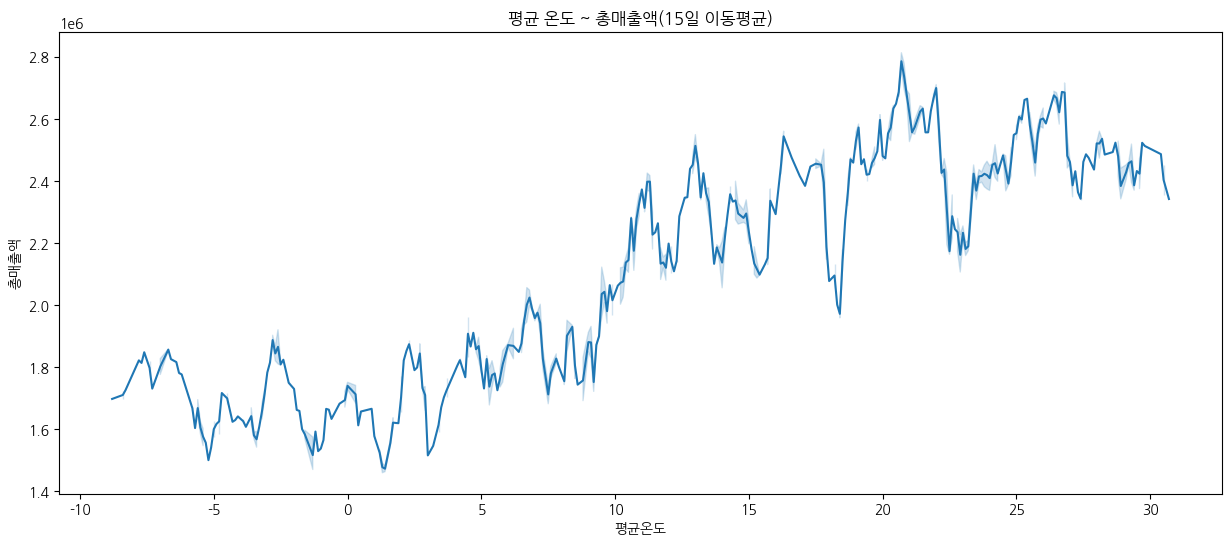

In [47]:
# 이동평균 계산 (window size를 조절하여 원하는 기간으로 설정 가능)
window_size = 15
moving_average = grouped_sales.rolling(window=window_size, center=True).mean()

fig, ax = plt.subplots(figsize=(15, 6))
# sns.lineplot(data=grouped_sales.reset_index(), x='TempAvg', y='Price', estimator='mean', ci=None, label='Daily Sales')
sns.lineplot(data=moving_average.reset_index(), x='TempAvg', y='Price')

plt.title('일평균 기온에 따른 총매출액({}일 이동평균)'.format(window_size))
plt.xlabel('평균온도')
plt.ylabel('총매출액')
# plt.legend()

plt.show()

In [56]:
df_sales_weather[(df_sales_weather['ItemName'].str.contains("컵얼음"))]

,idUser,idPOS,SalesDate,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Price,TempAvg,classRainfall,discomfortIndex
796,U100979,U100979-Y2021M5D31-P10120,2021-05-31,2021,5,31,0,12:52:00,남성,30대,I-8809197840282,L6,음료,M2,아이스,del)빅볼컵얼음160g,1200,19.9,보통비,전원쾌적
1501,U100599,U100599-Y2021M9D2-P10296,2021-09-02,2021,9,2,3,11:10:08,남성,30대,I-8809197840107,L6,음료,M2,아이스,del)빅컵얼음230g,800,23.5,무강수,10%불쾌
2999,U100838,U100838-Y2021M4D16-P10108,2021-04-16,2021,4,16,4,16:24:00,여성,30대,I-8809197840336,L6,음료,M2,아이스,del)벤티컵얼음400g,1200,11.3,약한비,전원쾌적
4503,U100598,U100598-Y2021M8D23-P10080,2021-08-23,2021,8,23,0,07:36:00,남성,20대,I-8809197840107,L6,음료,M2,아이스,del)빅컵얼음230g,800,22.4,보통비,10%불쾌
6240,U100594,U100594-Y2021M3D19-P10154,2021-03-19,2021,3,19,4,09:23:56,여성,30대,I-8809197840107,L6,음료,M2,아이스,del)빅컵얼음230g,800,15.3,무강수,전원쾌적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496688,U100735,U100735-Y2022M8D11-P10342,2022-08-11,2022,8,11,3,08:21:42,남성,20대,I-8809197840282,L6,음료,M2,아이스,del)빅볼컵얼음160g,1200,25.0,매우강한비,50%불쾌
497842,U101089,U101089-Y2022M9D18-P10182,2022-09-18,2022,9,18,6,15:45:26,남성,20대,I-8809197840107,L6,음료,M2,아이스,del)빅컵얼음230g,800,27.1,무강수,50%불쾌
500808,U100927,U100927-Y2022M4D12-P10060,2022-04-12,2022,4,12,1,15:35:44,여성,50대,I-8809197840282,L6,음료,M2,아이스,del)빅볼컵얼음160g,1200,19.3,약한비,전원쾌적
501491,U100552,U100552-Y2022M6D25-P10155,2022-06-25,2022,6,25,5,17:04:26,남성,30대,I-8809197840336,L6,음료,M2,아이스,del)벤티컵얼음400g,1200,26.0,무강수,50%불쾌


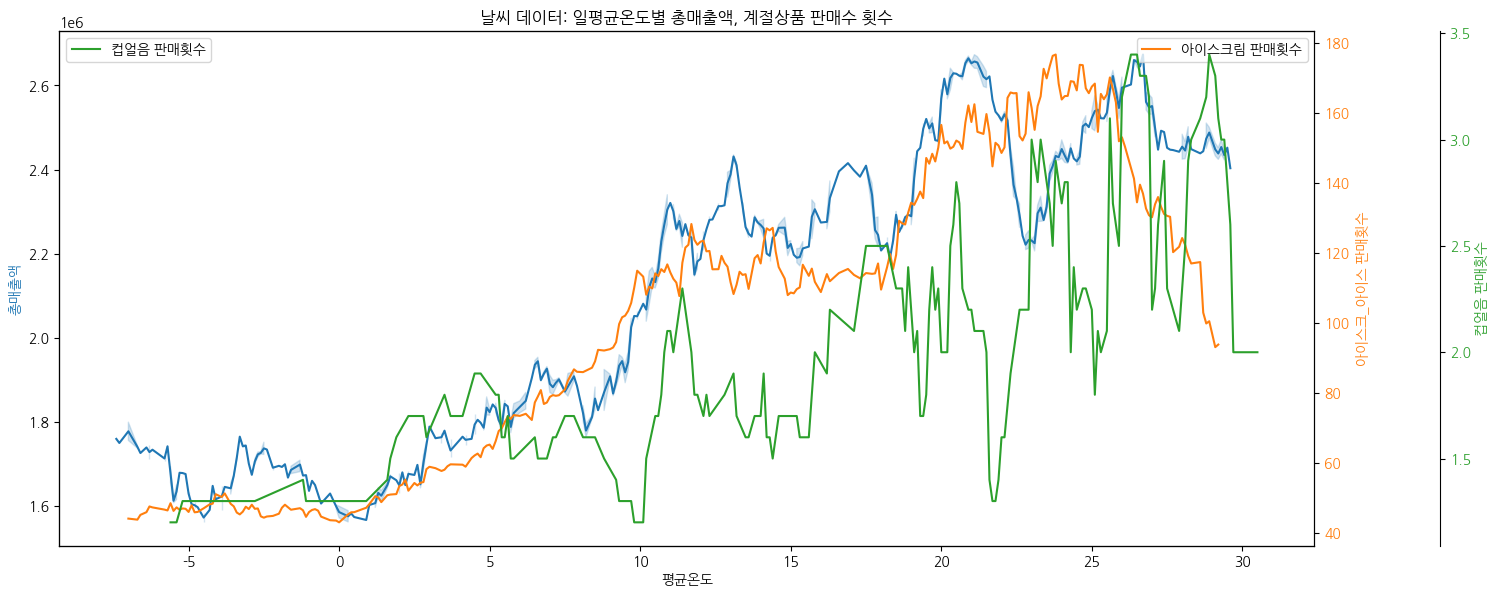

In [70]:
# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
df_tempAvg = df_sales_weather[(df_sales_weather['ItemNameLarge']=='아이스크') & (df_sales_weather['ItemNameMiddle']=='아이스')].loc[:,'Price':'TempAvg'].groupby('TempAvg')['TempAvg'].agg(['count'])
grouped_sales_ice = df_tempAvg.sort_index().iloc[:,-1].to_frame()
grouped_sales_ice.columns=['Price']

df_tempAvg = df_sales_weather[(df_sales_weather['ItemName'].str.contains("컵얼음"))].loc[:,'Price':'TempAvg'].groupby('TempAvg')['TempAvg'].agg(['count'])
grouped_sales_cupice = df_tempAvg.sort_index().iloc[:,-1].to_frame()
grouped_sales_cupice.columns=['Price']

# 이동평균 계산 (window size를 조절하여 원하는 기간으로 설정 가능)
window_size = 30
moving_average = grouped_sales.rolling(window=window_size, center=True).mean()
moving_average_ice = grouped_sales_ice.rolling(window=window_size, center=True).mean()
moving_average_cupice = grouped_sales_cupice.rolling(window=10, center=True).mean()


fig, ax = plt.subplots(figsize=(15, 6))
# sns.lineplot(data=grouped_sales.reset_index(), x='TempAvg', y='Price', estimator='mean', ci=None, label='Daily Sales')
sns.lineplot(data=moving_average.reset_index(), x='TempAvg', y='Price', ax=ax)

# plt.title('평균 온도 ~ 총매출액({}일 이동평균)'.format(window_size))
ax.set_xlabel('평균온도')
ax.set_ylabel('총매출액', color='tab:blue')


# 아이스크림 데이터 (오른쪽 Y 축)
ax2 = ax.twinx()
sns.lineplot(data=moving_average_ice.reset_index(), x='TempAvg', y='Price', ax=ax2, color='tab:orange', label='아이스크림 판매횟수')

# plt.title('평균 온도 ~ 아이스크_아이스 매출액({}일 이동평균)'.format(window_size))
plt.xlabel('평균온도')
ax2.set_ylabel('아이스크_아이스 판매횟수', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 컵얼음 데이터 (오른쪽 Y 축)
ax3 = ax.twinx()
sns.lineplot(data=moving_average_cupice.reset_index(), x='TempAvg', y='Price', ax=ax3, color='tab:green', label='컵얼음 판매횟수')

# plt.title('평균 온도 ~ 아이스크_아이스 매출액({}일 이동평균)'.format(window_size))
plt.xlabel('평균온도')
ax3.set_ylabel('컵얼음 판매횟수', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가

plt.legend(loc='upper left')

fig.tight_layout()
plt.title('날씨 데이터: 일평균온도별 총매출액, 계절상품 판매수 횟수')
plt.show()

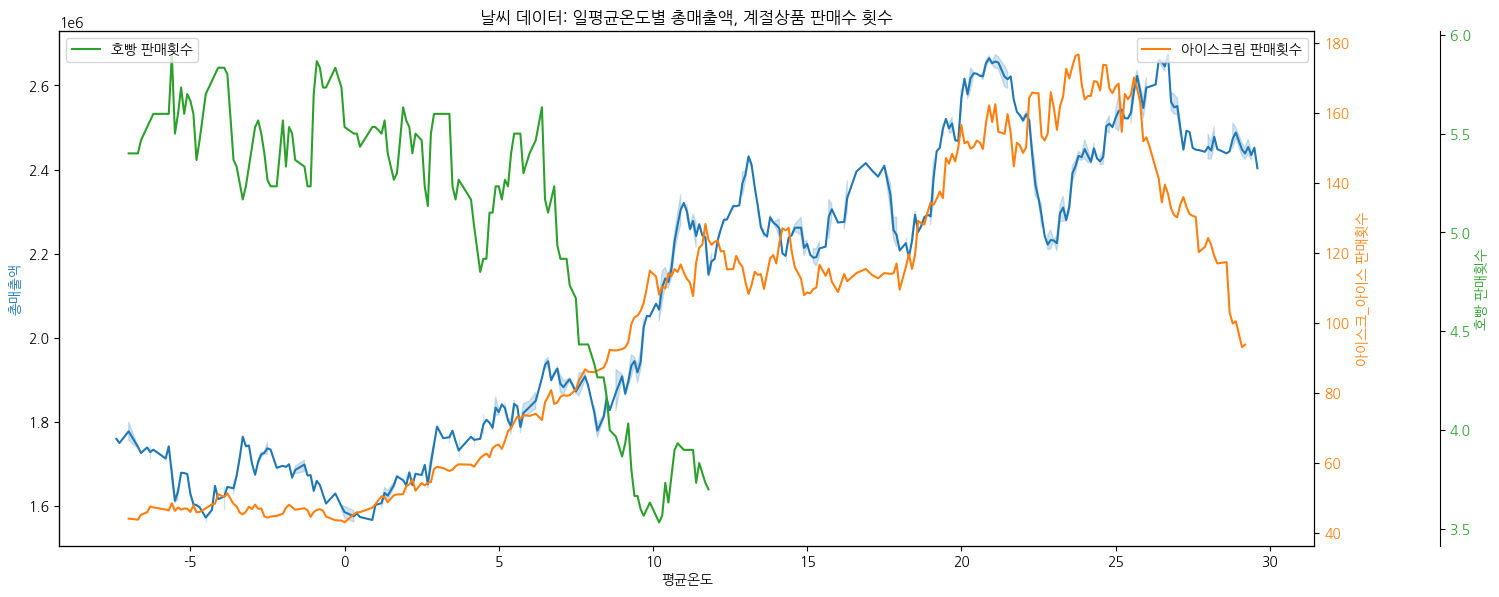

In [73]:
# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
df_tempAvg = df_sales_weather[(df_sales_weather['ItemNameLarge']=='아이스크') & (df_sales_weather['ItemNameMiddle']=='아이스')].loc[:,'Price':'TempAvg'].groupby('TempAvg')['TempAvg'].agg(['count'])
grouped_sales_ice = df_tempAvg.sort_index().iloc[:,-1].to_frame()
grouped_sales_ice.columns=['Price']

df_tempAvg = df_sales_weather[(df_sales_weather['ItemName'].str.contains("호빵"))].loc[:,'Price':'TempAvg'].groupby('TempAvg')['TempAvg'].agg(['count'])
grouped_sales_cupice = df_tempAvg.sort_index().iloc[:,-1].to_frame()
grouped_sales_cupice.columns=['Price']

# 이동평균 계산 (window size를 조절하여 원하는 기간으로 설정 가능)
window_size = 30
moving_average = grouped_sales.rolling(window=window_size, center=True).mean()
moving_average_ice = grouped_sales_ice.rolling(window=window_size, center=True).mean()
moving_average_cupice = grouped_sales_cupice.rolling(window=window_size, center=True).mean()


fig, ax = plt.subplots(figsize=(15, 6))
# sns.lineplot(data=grouped_sales.reset_index(), x='TempAvg', y='Price', estimator='mean', ci=None, label='Daily Sales')
sns.lineplot(data=moving_average.reset_index(), x='TempAvg', y='Price', ax=ax)

# plt.title('평균 온도 ~ 총매출액({}일 이동평균)'.format(window_size))
ax.set_xlabel('평균온도')
ax.set_ylabel('총매출액', color='tab:blue')


# 아이스크림 데이터 (오른쪽 Y 축)
ax2 = ax.twinx()
sns.lineplot(data=moving_average_ice.reset_index(), x='TempAvg', y='Price', ax=ax2, color='tab:orange', label='아이스크림 판매횟수')

# plt.title('평균 온도 ~ 아이스크_아이스 매출액({}일 이동평균)'.format(window_size))
plt.xlabel('평균온도')
ax2.set_ylabel('아이스크_아이스 판매횟수', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 컵얼음 데이터 (오른쪽 Y 축)
ax3 = ax.twinx()
sns.lineplot(data=moving_average_cupice.reset_index(), x='TempAvg', y='Price', ax=ax3, color='tab:green', label='호빵 판매횟수')

# plt.title('평균 온도 ~ 아이스크_아이스 매출액({}일 이동평균)'.format(window_size))
plt.xlabel('평균온도')
ax3.set_ylabel('호빵 판매횟수', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가

plt.legend(loc='upper left')

fig.tight_layout()
plt.title('날씨 데이터: 일평균온도별 총매출액, 계절상품 판매수 횟수')
plt.show()

In [8]:
df_sales_weather

,idUser,idPOS,SalesDate,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup,...,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Price,TempAvg,classRainfall,discomfortIndex,Season
0,U101066,U101066-Y2021M5D31-P10337,2021-05-31,2021,5,31,0,17:19:59,남성,10대,...,L1,간편식사,M1,도시락,샐)허닭케이준닭가슴살,3800,19.9,보통비,전원쾌적,봄
1,U101094,U101094-Y2021M5D31-P10248,2021-05-31,2021,5,31,0,06:19:36,남성,10대,...,L1,간편식사,M2,샌드위치,햄)허니크림치즈상하이,3300,19.9,보통비,전원쾌적,봄
2,U101077,U101077-Y2021M5D31-P10244,2021-05-31,2021,5,31,0,15:47:12,남성,30대,...,L1,간편식사,M2,샌드위치,햄)중화풍유린기버거,3100,19.9,보통비,전원쾌적,봄
3,U101084,U101084-Y2021M5D31-P10233,2021-05-31,2021,5,31,0,20:05:19,남성,30대,...,L1,간편식사,M3,주먹밥,김)두껍다떡갈비김밥,2700,19.9,보통비,전원쾌적,봄
4,U101054,U101054-Y2021M5D31-P10131,2021-05-31,2021,5,31,0,14:06:37,여성,40대,...,L1,간편식사,M2,샌드위치,샌)더블에그파니니,4000,19.9,보통비,전원쾌적,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509295,U100982,U100982-Y2022M2D27-P10035,2022-02-27,2022,2,27,6,19:06:40,남성,40대,...,L6,음료,M3,유제품,서울)딸기꿀딴지180ml,1100,3.7,무강수,전원쾌적,겨울
509296,U100989,U100989-Y2022M2D27-P10039,2022-02-27,2022,2,27,6,09:03:30,남성,60대이상,...,L6,음료,M2,아이스,22del)스윗아메리카노230,900,3.7,무강수,전원쾌적,겨울
509297,U100977,U100977-Y2022M2D27-P10115,2022-02-27,2022,2,27,6,10:08:15,남성,20대,...,L6,음료,M1,음료,코카)크래프트아메P470ml,2500,3.7,무강수,전원쾌적,겨울
509298,U101098,U101098-Y2022M2D27-P10023,2022-02-27,2022,2,27,6,16:55:10,남성,30대,...,L6,음료,M1,음료,코카)조지아맥스캔,1200,3.7,무강수,전원쾌적,겨울


In [11]:
'|'.join(example_list)

'del)|21델)|20델)|GET'

In [13]:
# 포함하고자 하는 문자열 리스트 생성
example_list = ['del)', '21델)', '20델)', 'GET']

# 데이터프레임 생성
# df = pd.DataFrame(data)

# join함수를 이용하여 이어주고 contains 함수에 넣기
test = '|'.join(example_list)
result = df_sales_weather[df_sales_weather['ItemName'].str.contains('del|21델|20델|GET')]
result

,idUser,idPOS,SalesDate,SalesYear,SalesMonth,SalesDay,SalesWeekday,SalesTime,Gender,AgeGroup,...,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Price,TempAvg,classRainfall,discomfortIndex,Season
88,U100537,U100537-Y2021M5D31-P10176,2021-05-31,2021,5,31,0,14:13:04,남성,50대,...,L2,즉석조리,M3,즉석커,GET헤이즐넛향시럽,400,19.9,보통비,전원쾌적,봄
676,U100358,U100358-Y2021M5D31-P10132,2021-05-31,2021,5,31,0,17:30:00,여성,40대,...,L6,음료,M2,아이스,22del)타트체리에이드230,900,19.9,보통비,전원쾌적,봄
688,U100413,U100413-Y2021M5D31-P10139,2021-05-31,2021,5,31,0,10:15:42,남성,30대,...,L6,음료,M2,아이스,21델)아메리카노스위트,800,19.9,보통비,전원쾌적,봄
717,U100542,U100542-Y2021M5D31-P10240,2021-05-31,2021,5,31,0,00:16:00,남성,30대,...,L6,음료,M2,아이스,22del)스윗아메리카노500,1800,19.9,보통비,전원쾌적,봄
730,U100571,U100571-Y2021M5D31-P10161,2021-05-31,2021,5,31,0,14:04:40,남성,20대,...,L6,음료,M2,아이스,21델)아메리카노스위트,800,19.9,보통비,전원쾌적,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509054,U101031,U101031-Y2022M9D11-P10277,2022-09-11,2022,9,11,6,19:21:51,여성,30대,...,L6,음료,M2,아이스,20델)수박에이드,700,23.3,약한비,10%불쾌,가을
509082,U100313,U100313-Y2022M2D27-P10021,2022-02-27,2022,2,27,6,13:25:24,여성,50대,...,L2,즉석조리,M3,즉석커,GET허쉬초코카페모카30g,600,3.7,무강수,전원쾌적,겨울
509084,U100758,U100758-Y2022M2D27-P10019,2022-02-27,2022,2,27,6,08:02:15,여성,20대,...,L2,즉석조리,M3,즉석커,GET토피넛라떼파우더,500,3.7,무강수,전원쾌적,겨울
509288,U100823,U100823-Y2022M2D27-P10032,2022-02-27,2022,2,27,6,17:01:58,여성,40대,...,L6,음료,M2,아이스,21델)빅헤이즐넛향,1100,3.7,무강수,전원쾌적,겨울


In [40]:
df_tempAvg = df_sales_weather[(df_sales_weather['ItemName'].str.contains("호빵"))]\
                .loc[:,'Price':'TempAvg'].groupby('TempAvg')['TempAvg'].agg(['count'])
df_tempAvg

,count
TempAvg,
-14.9,4
-14.5,1
-12.2,2
-12.1,7
-11.8,2
...,...
13.7,1
14.9,3
15.3,4


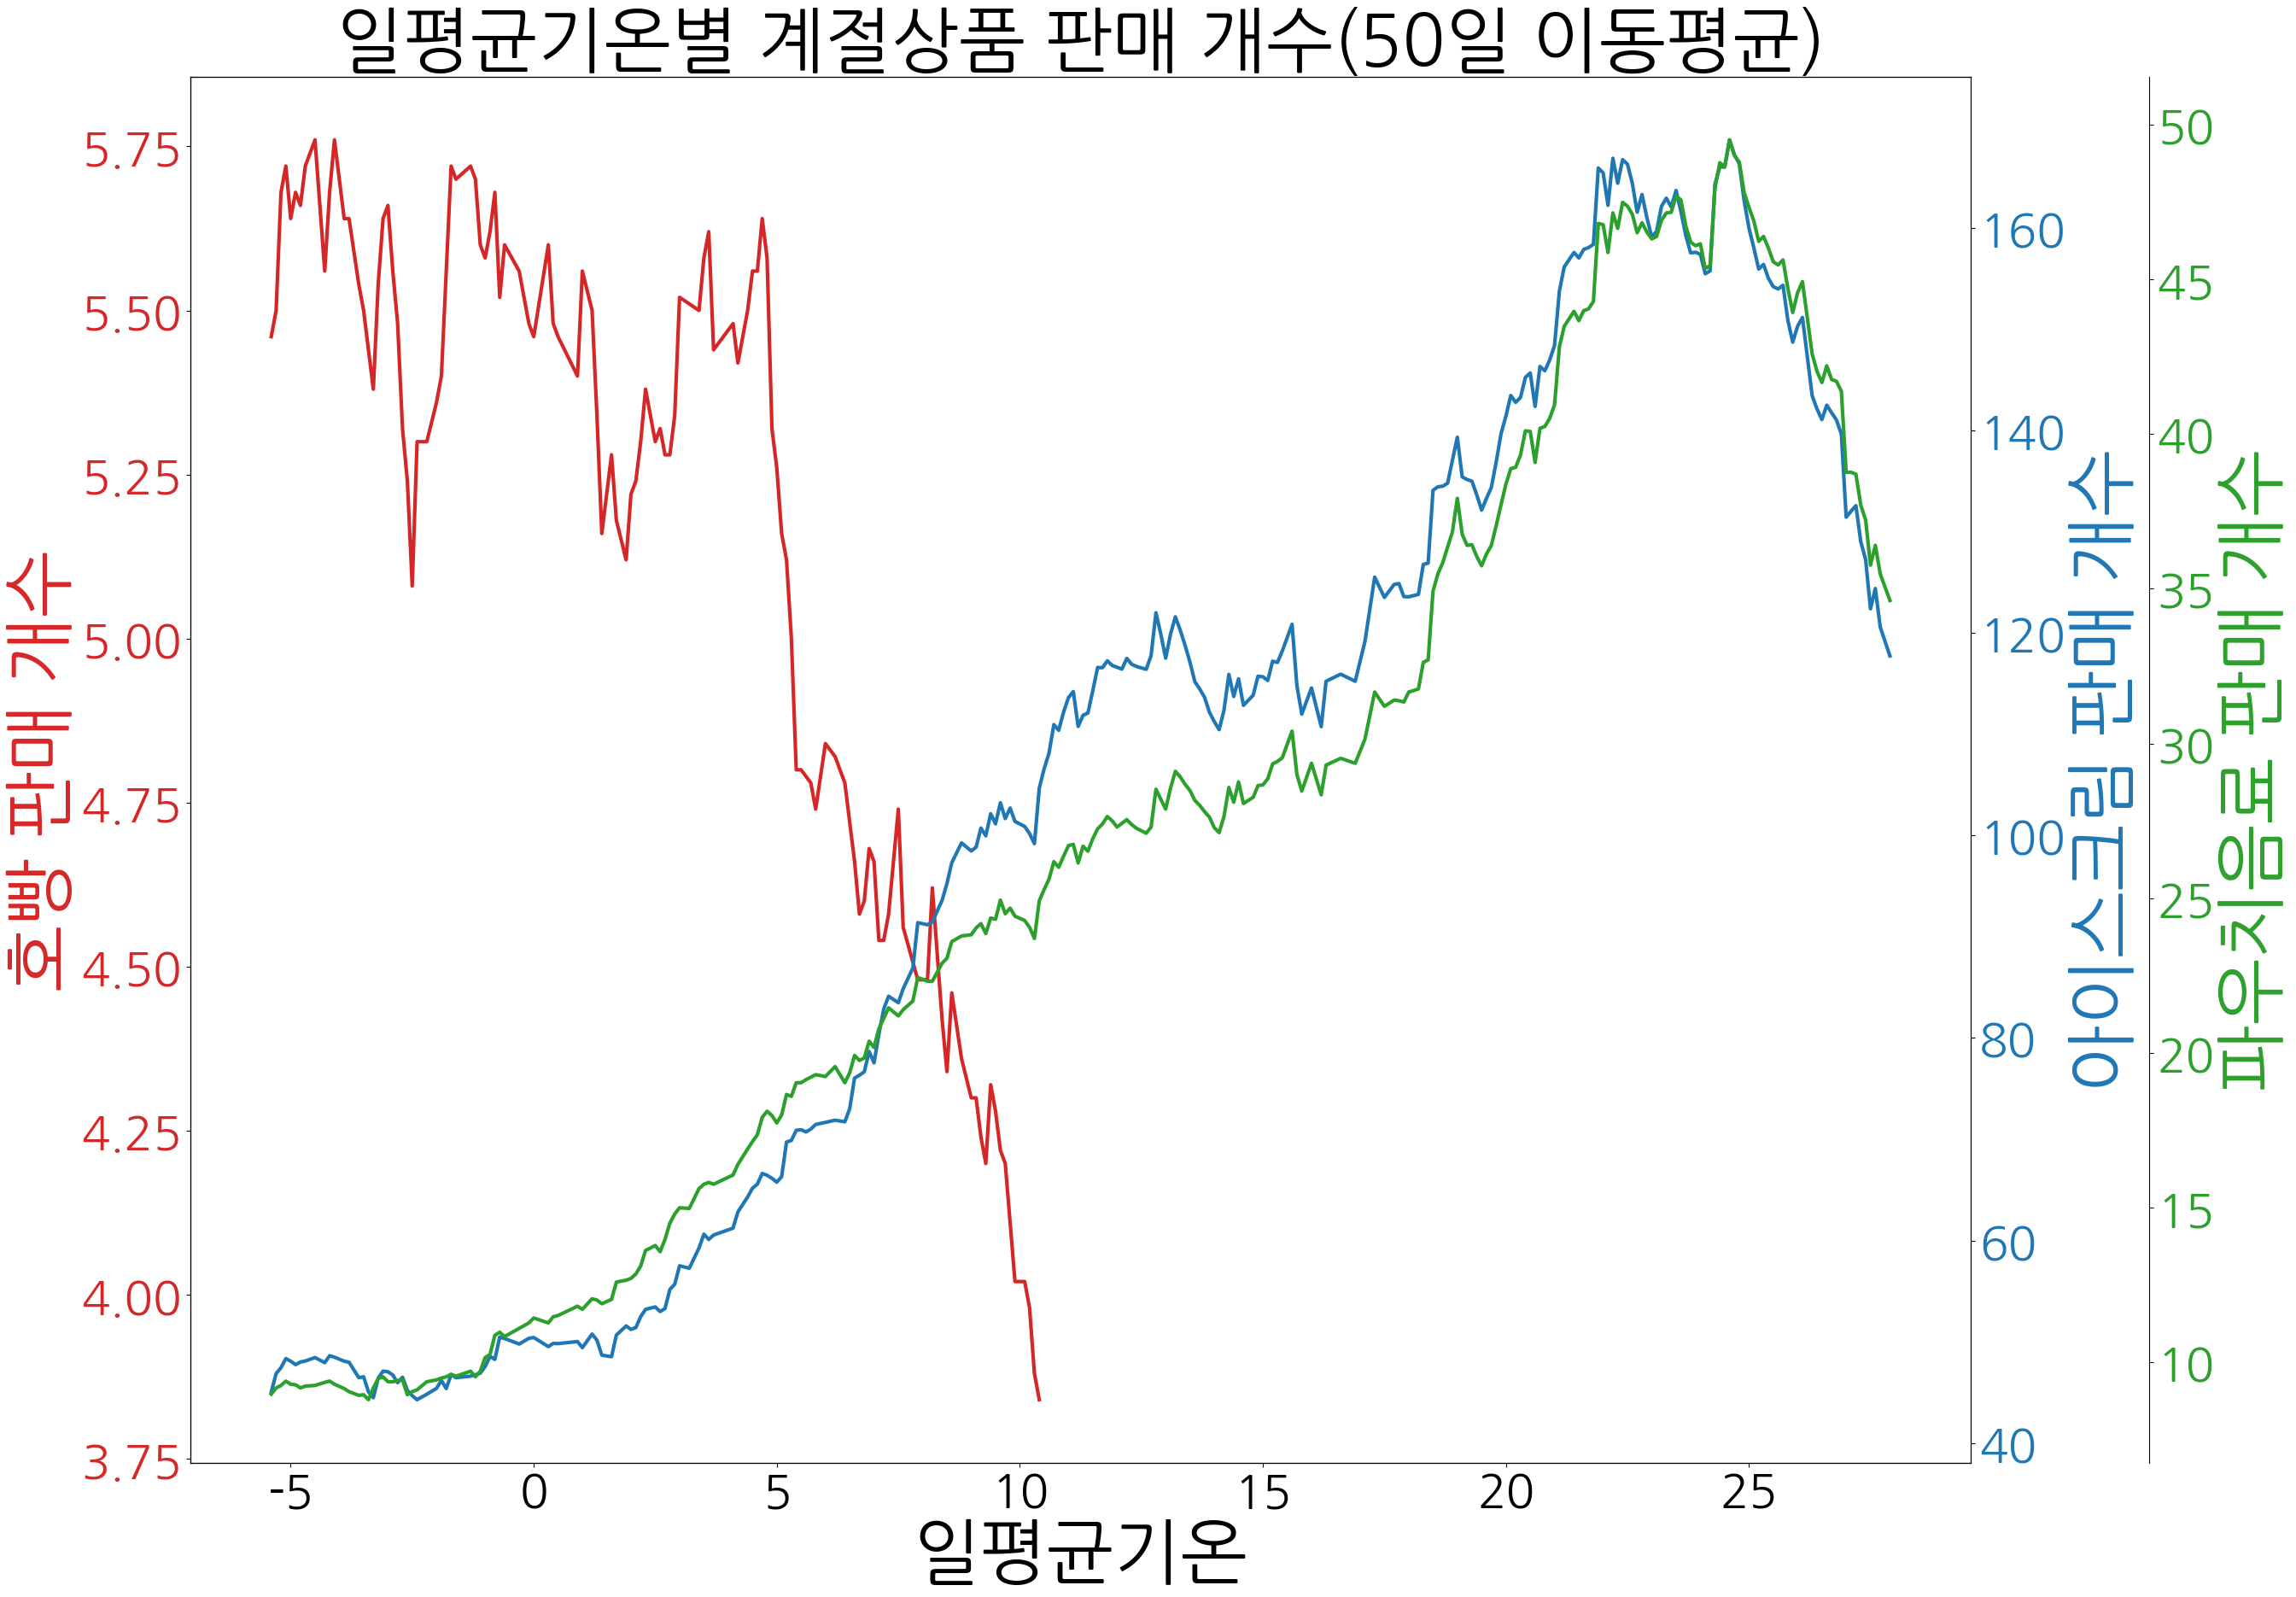

In [55]:
df_tempAvg = df_sales_weather[(df_sales_weather['ItemName'].str.contains("호빵"))]\
                .loc[:,'Price':'TempAvg'].groupby('TempAvg')['TempAvg'].agg(['count'])
grouped_sales_ho = df_tempAvg.sort_index().iloc[:,-1].to_frame()
grouped_sales_ho.columns=['Price']

# 기온, classRainfall, discomfortIndex를 기준으로 그룹화하여 총매출액 계산
df_tempAvg = df_sales_weather[(df_sales_weather['ItemNameLarge']=='아이스크') & (df_sales_weather['ItemNameMiddle']=='아이스')].loc[:,'Price':'TempAvg'].groupby('TempAvg')['TempAvg'].agg(['count'])
grouped_sales_ice = df_tempAvg.sort_index().iloc[:,-1].to_frame()
grouped_sales_ice.columns=['Price']

# 포함하고자 하는 문자열 리스트 생성
example_list = ['del)', '21델)', '20델)', 'GET']

# 데이터프레임 생성
# df = pd.DataFrame(data)

# join함수를 이용하여 이어주고 contains 함수에 넣기
test = '|'.join(example_list)
result = df_sales_weather[df_sales_weather['ItemName'].str.contains('del|21델|20델|GET')]

df_tempAvg = result.loc[:,'Price':'TempAvg'].groupby('TempAvg')['TempAvg'].agg(['count'])
grouped_sales_cupice = df_tempAvg.sort_index().iloc[:,-1].to_frame()
grouped_sales_cupice.columns=['Price']

# 이동평균 계산 (window size를 조절하여 원하는 기간으로 설정 가능)
window_size = 50
moving_average_ho = grouped_sales_ho.rolling(window=window_size, center=True).mean()
moving_average_ice = grouped_sales_ice.rolling(window=window_size, center=True).mean()
moving_average_cupice = grouped_sales_cupice.rolling(window=window_size, center=True).mean()


fig, ax = plt.subplots(figsize=(27, 18))
sns.lineplot(data=moving_average_ho.reset_index(), x='TempAvg', y='Price', ax=ax, color='tab:red', linewidth=3)
ax.set_xlabel('일평균기온', fontsize=60)
ax.set_ylabel('호빵 판매 개수', color='tab:red', fontsize=60)
ax.tick_params(axis='y', labelcolor='tab:red', labelsize=40 )

# 아이스크림 데이터 (오른쪽 Y 축)
ax2 = ax.twinx()
sns.lineplot(data=moving_average_ice.reset_index(), x='TempAvg', y='Price', ax=ax2, color='tab:blue', linewidth=3)
# plt.xlabel('일평균기온')
ax2.set_ylabel('아이스크림 판매 개수', color='tab:blue', fontsize=60)
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=40 ) 

# 컵얼음 데이터 (오른쪽 Y 축)
ax3 = ax.twinx()
sns.lineplot(data=moving_average_cupice.reset_index(), x='TempAvg', y='Price', ax=ax3, color='tab:green', linewidth=3)
# plt.xlabel('일평균기온', fontsize=60)
ax3.set_ylabel('파우치음료 판매 개수', color='tab:green', fontsize=60)
ax3.tick_params(axis='y', labelcolor='tab:green', labelsize=40 )
ax3.spines.right.set_position(("axes", 1.1)) ## 오른쪽 옆에 y축 추가

# plt.legend(loc='upper left')
ax.tick_params(axis='x', labelsize=40 )
fig.tight_layout()
# plt.xlabel('일평균기온', fontsize=60)
plt.title('일평균기온별 계절상품 판매 개수({}일 이동평균)'.format(window_size), fontsize=60 )
plt.show()

In [ ]:
축 5050
ticks 4040
figure
title 60-80